In [1]:
from collections import Counter
from matplotlib import pyplot as plt


class PredicitionHolder():

    def __init__(self, persona_list, slot_number, inherit_type, possible_skills):
        # open file to data variable
        with open("/home/eduardo/Documents/Persona3/AutoTelos/kikuriHime/predictions_{}/predictions_{}.log".format(inherit_type,slot_number), "r") as f:
            log_file_content = f.readlines()

        self.persona_list = persona_list

        self.predictions = exclude_lines_with_duplicates(log_file_content)

        self.possible_skills = possible_skills

        # Initialize a counter with all possible values set to 0
        value_counts_with_all_possible = Counter({value: 0 for value in possible_skills})

        # Flatten the list of lists
        all_values = [item for sublist in self.predictions for item in sublist]

        # Update this counter with the actual occurrences
        value_counts_with_all_possible.update(all_values)
        self.value_counts_with_all_possible =  value_counts_with_all_possible


        # sum all values in the counter
        total = sum(value_counts_with_all_possible.values())

        # Create a dictionary with the percentage of each value
        percentage = {key: value/total for key, value in value_counts_with_all_possible.items()}

        self.percentage = percentage

    def show(self):

        print("Persona List: ", self.persona_list)

        # Now to visualize these counts as a histogram, ensuring all possible values are included
        plt.figure(figsize=(12, 8))
        plt.bar(self.value_counts_with_all_possible.keys(), self.value_counts_with_all_possible.values())
        plt.xlabel('Skill Names')
        plt.ylabel('Counts')
        plt.title('Histogram of Skill Occurrences Including All Possible Values')
        plt.xticks(rotation=90, ha="right")
        plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
        plt.show()




# Function to parse each line as a list and check for duplicates
def exclude_lines_with_duplicates(log_lines):
    unique_lines = []  # This will hold only the lines without any duplicates
    for line_str in log_lines:
        try:
            # Parsing the string to a list
            line_list = eval(line_str)
            # Check for duplicates: Add to unique_lines only if there are no duplicates
            if len(line_list) == len(set(line_list)):
                unique_lines.append(line_list)
        except Exception as e:
            # In case of an error in parsing, you can decide how to handle it,
            # for example, by logging the error or skipping the line.
            # This example will skip the line.
            pass
    return unique_lines



In [2]:
import re

class InheritanceTypeHolder():


    def __init__(self, inherit_type):
        #open the file
        #'C:\\Users\\Eduardo\\Documents\\Projects\\AutoTelos\\Persona3FES-FusionHelper\\fusion_navigator\\logs_optimal_solutions\\logs-{}-optimal_recipes.txt'
        with open('/home/eduardo/Documents/Persona3/AutoTelos/fusion_navigator/logs_optimal_solutions/logs-{}-optimal_recipesOLD.txt'.format(inherit_type), 'r') as file:
            file_content = file.read()
            predictionHolders = parse_file(file_content,inherit_type)
        
        self.predictionHolders = predictionHolders

    def create_percentage_dict(self):
        # Create a dictionary to store the percentages
        percentages = {}

        for holder in self.predictionHolders:
            # Get the "percentage" dictionary from the holder
            percentage_dict = holder.percentage  # Assuming 'percentage' is an attribute of holder

            # Iterate over the items in the percentage dictionary
            for key, value in percentage_dict.items():
                # If the key is already in the percentages dictionary, append the value to the list
                if key in percentages:
                    percentages[key].append(value)
                # Otherwise, add a new list with the value to the percentages dictionary
                else:
                    percentages[key] = [value]
        return percentages

def parse_personas(persona_string):
    return re.findall(r"\('([\w\s-]+)', \d+, '([\w\s]+)'\)", persona_string)


def parse_skills(skill_string):
    return [skill.strip().strip("'").strip('"') for skill in skill_string.strip('[]').split(',')]

def parse_file(file_content,inherit_type):
    predictionHolders = []
    sections = file_content.split('------------------------\n')

    for section in sections:
        if section.strip() == '':
            continue

        personas = re.findall(r"Personas: \[([^\]]+)\]", section)
        skills = re.findall(r"Skills: \[([^\]]+)\]", section)
        result_persona = re.search(r"Resulting Persona: ([\w\s]+?)\s*$", section, re.MULTILINE)
        base_skills_amount = re.search(r"Base Skills Ammount: (\d+)", section)
        inherit_slots_amount = re.search(r"Inherited Skills Ammount: (\d+)", section)
        save_state_slot = re.search(r"key f(\d+)", section)

        if personas and skills and result_persona and base_skills_amount and inherit_slots_amount and save_state_slot:
            persona_list = parse_personas(personas[0])
            #print(persona_list)
            skill_set = parse_skills(skills[0])
            #TODO maybe i should plot the coverage
            save_state_slot = int(save_state_slot.group(1))
            

            ph = PredicitionHolder(persona_list,save_state_slot, inherit_type, skill_set)

            #recipe = RecipeController(skill_set, base_skills_amount, inherit_slots_amount, result_persona_name, fusion_spread_type, save_state_slot)
            predictionHolders.append(ph)

    return predictionHolders



Persona List:  [('alice', 'Death'), ('throne', 'Justice'), ('berith', 'Hierophant')]


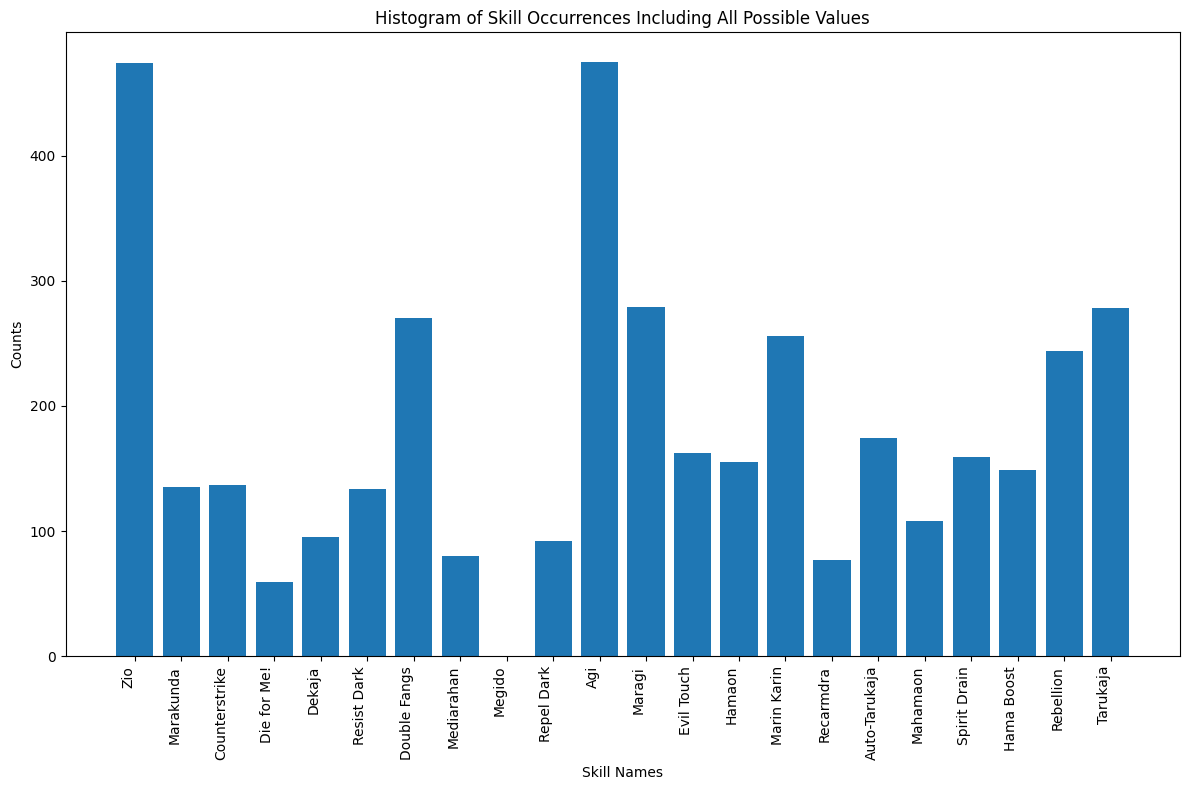

Persona List:  [('kali', 'Strength'), ('daisoujou', 'Hierophant'), ('cu chulainn', 'Tower')]


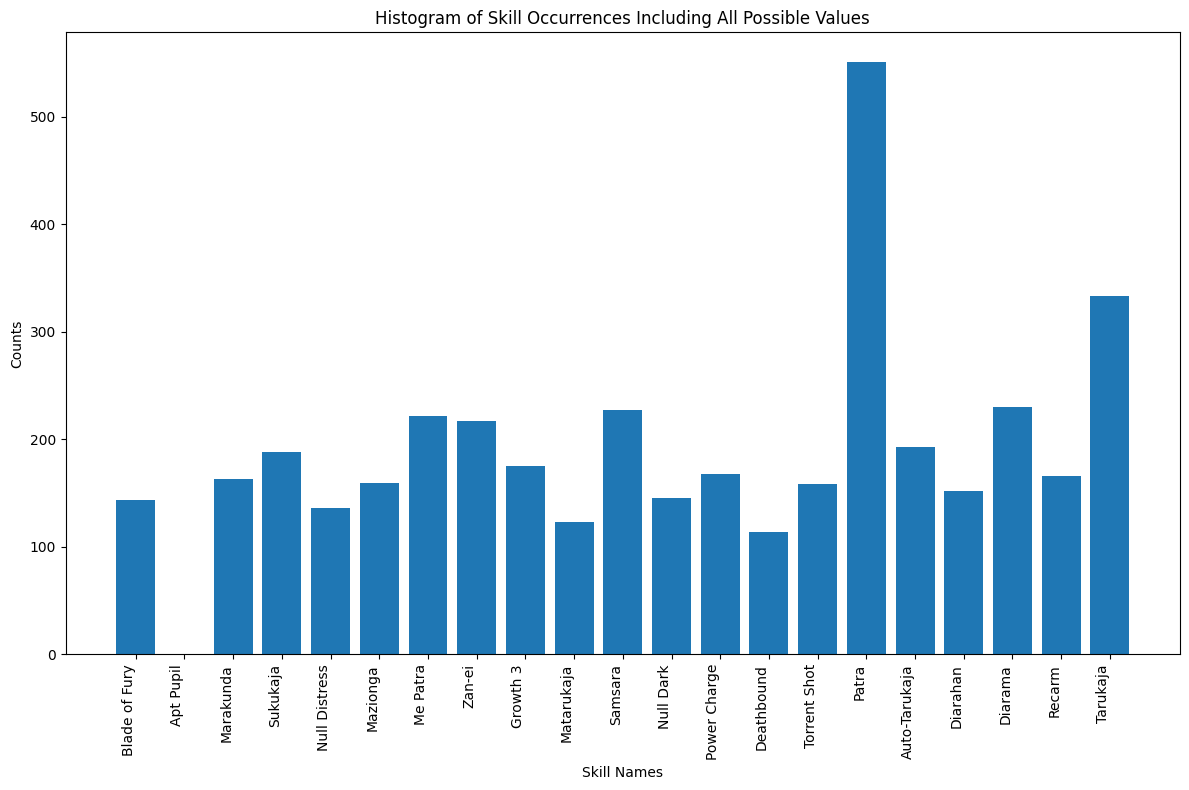

Persona List:  [('laksmi', 'Empress'), ('barong', 'Emperor'), ('take-mikazuchi', 'Emperor')]


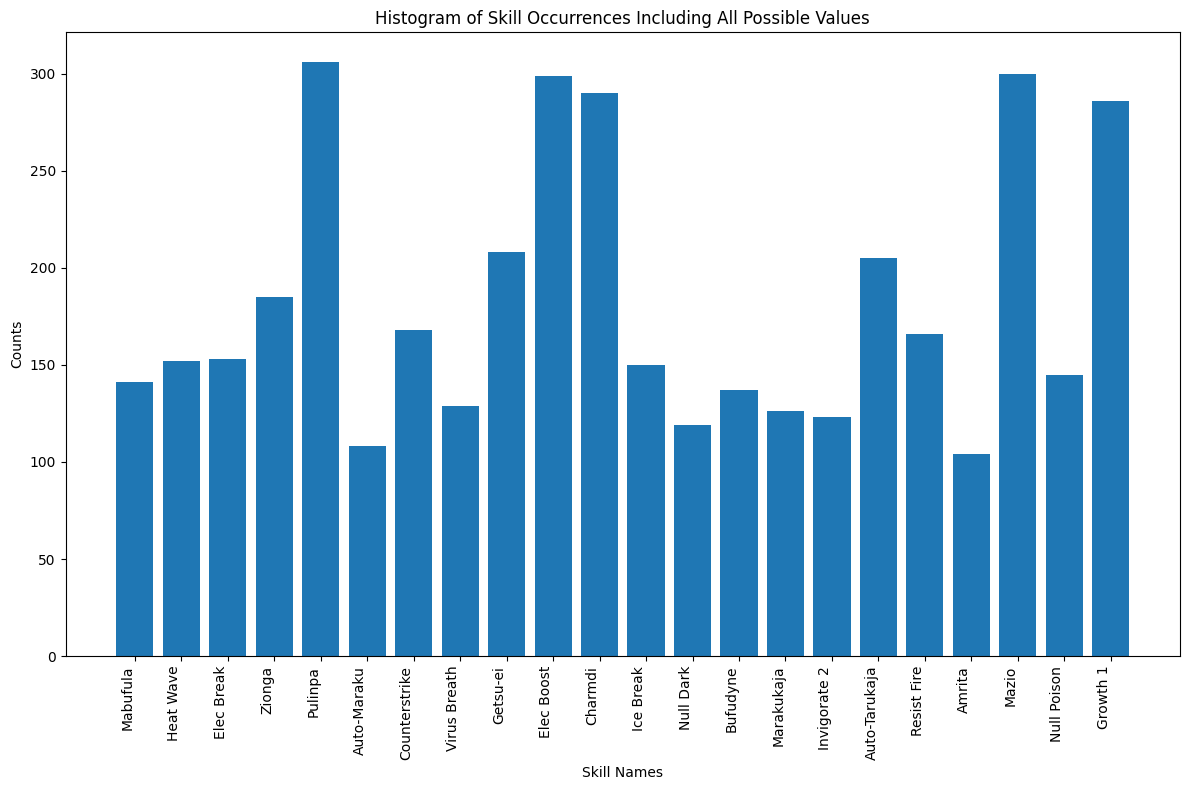

Persona List:  [('lucifer', 'Judgment'), ('okuninushi', 'Temperance'), ('vetala', 'Devil')]


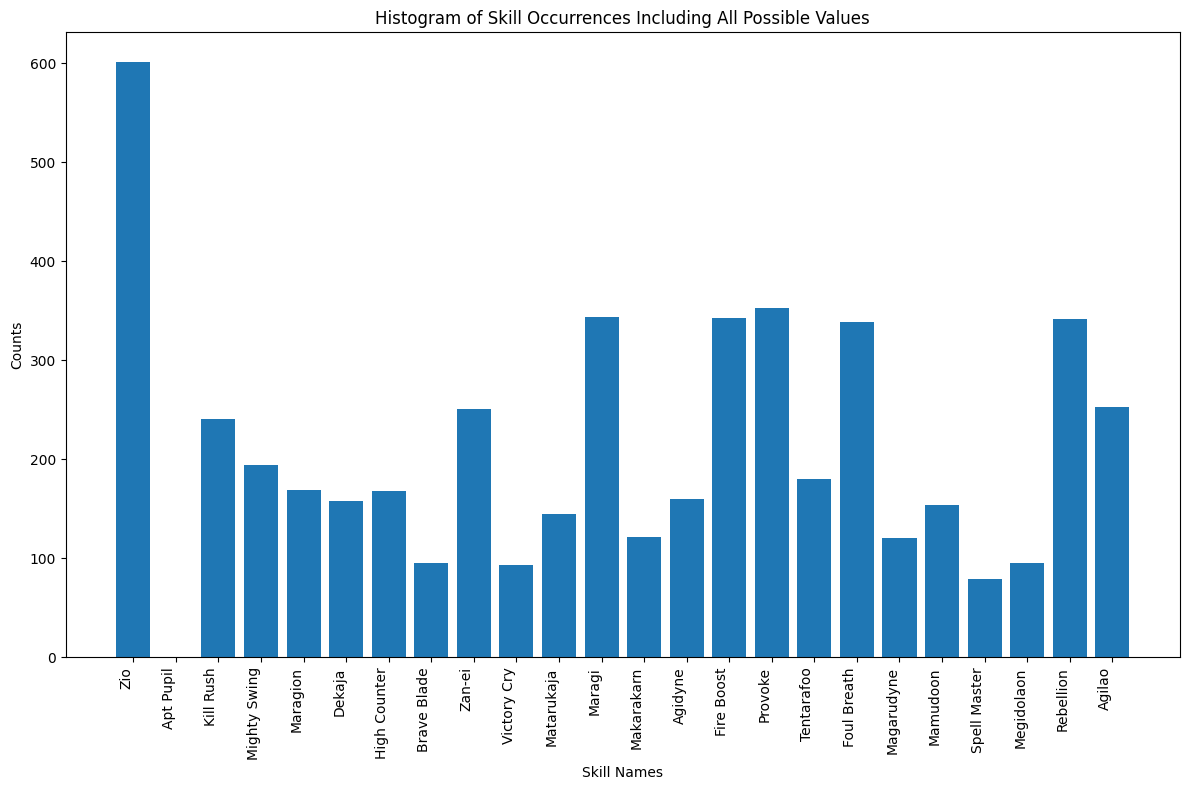

Persona List:  [('messiah', 'Judgment'), ('helel', 'Star'), ('metatron', 'Aeon'), ('chi you', 'Tower'), ('asura', 'Sun'), ('thanatos', 'Death')]


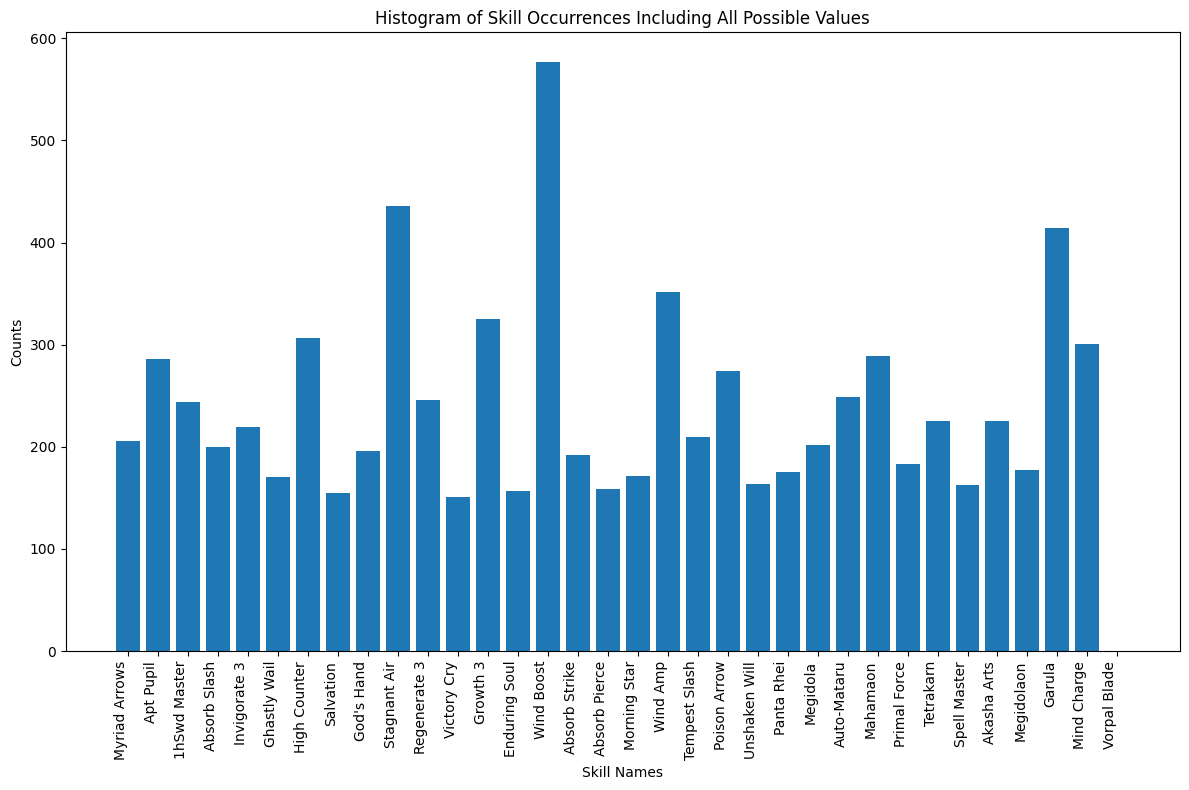

Persona List:  [('mot', 'Death'), ('power', 'Justice'), ('fortuna', 'Fortune')]


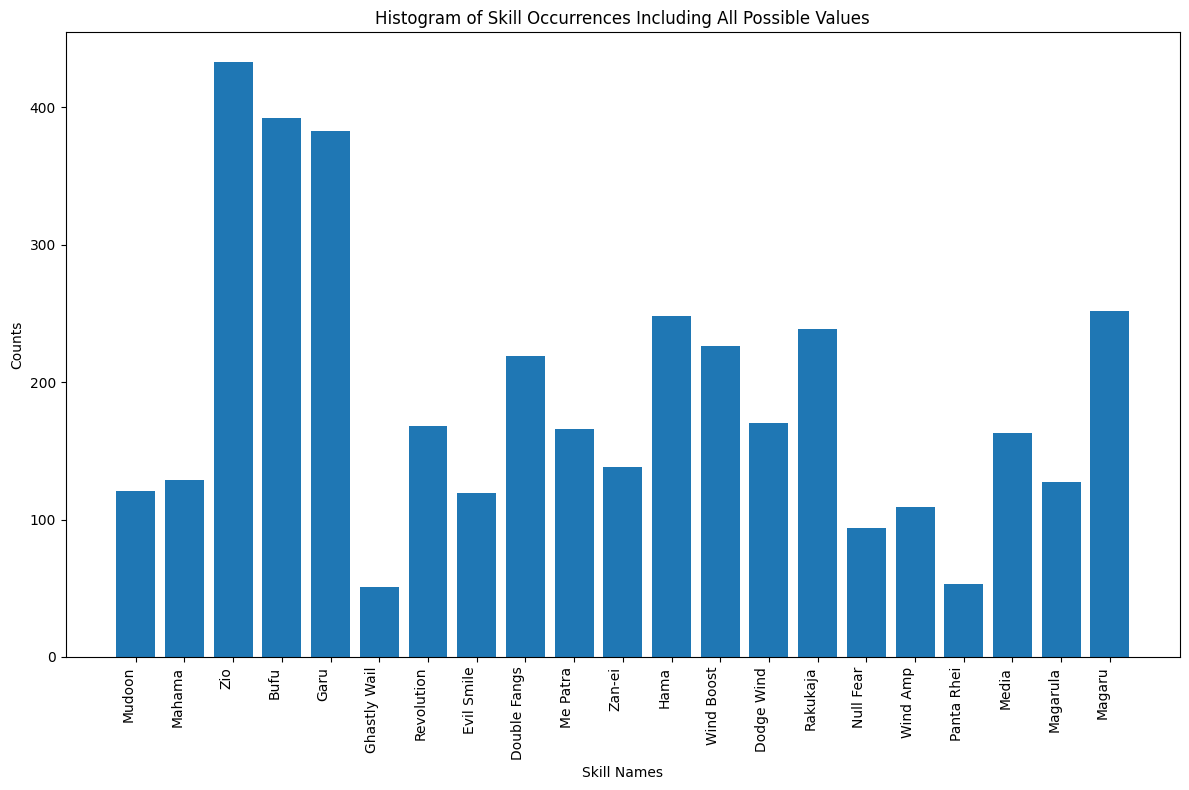

Persona List:  [('odin', 'Emperor'), ('ubelluris', 'Hanged Man'), ('gurr', 'Moon')]


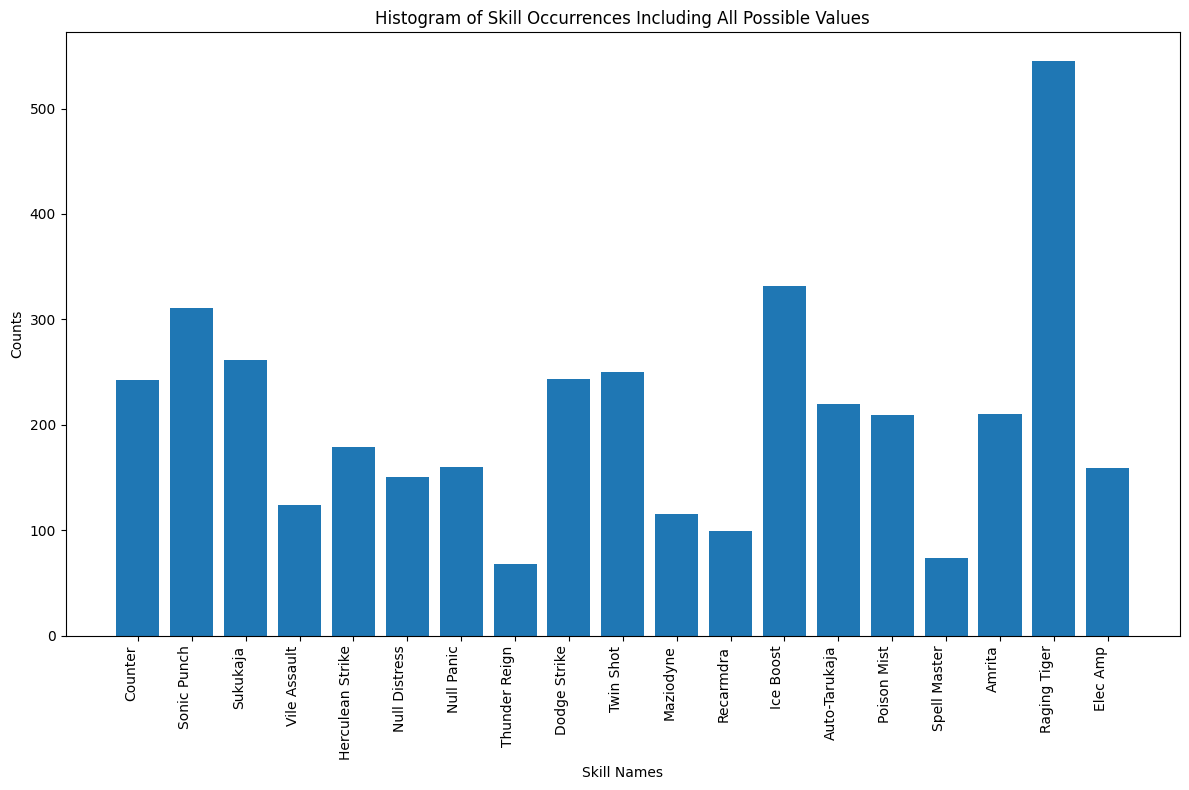

Persona List:  [('pazuzu', 'Devil'), ('genbu', 'Temperance'), ('inugami', 'Hanged Man')]


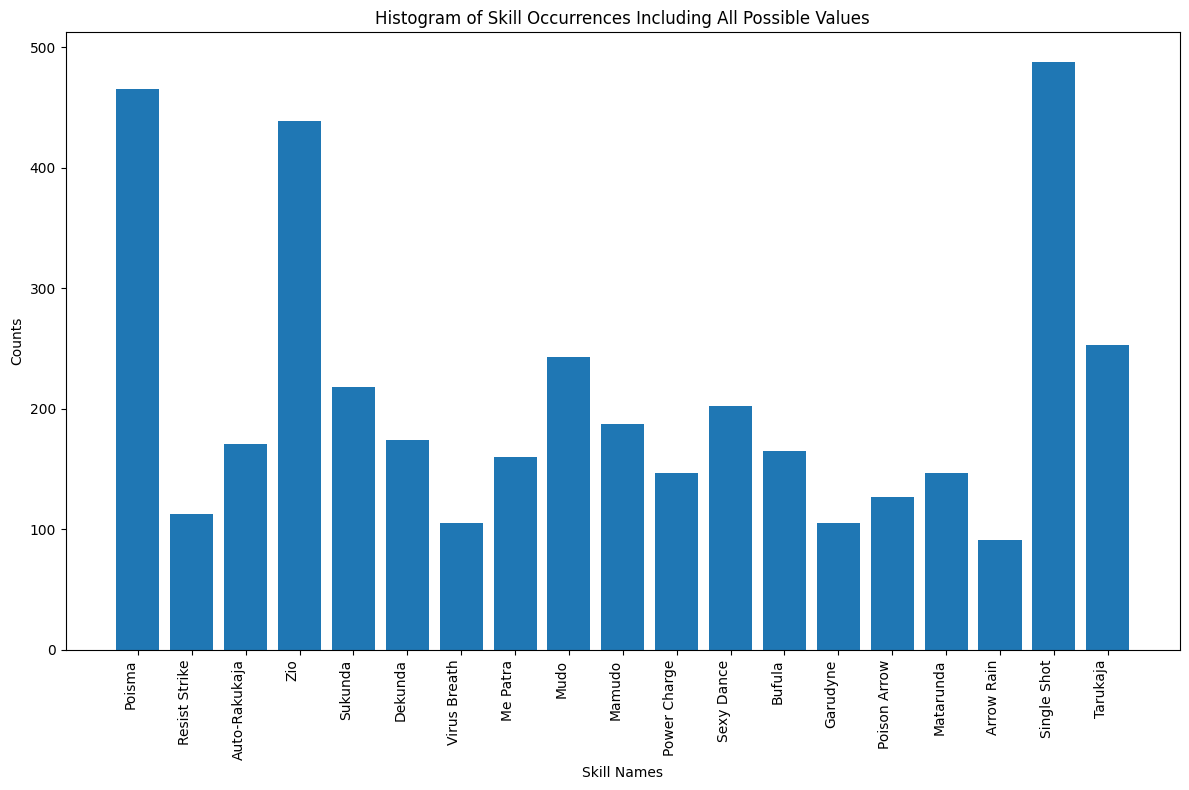

Persona List:  [('satan', 'Judgment'), ('okuninushi', 'Temperance'), ('orobas', 'Magician')]


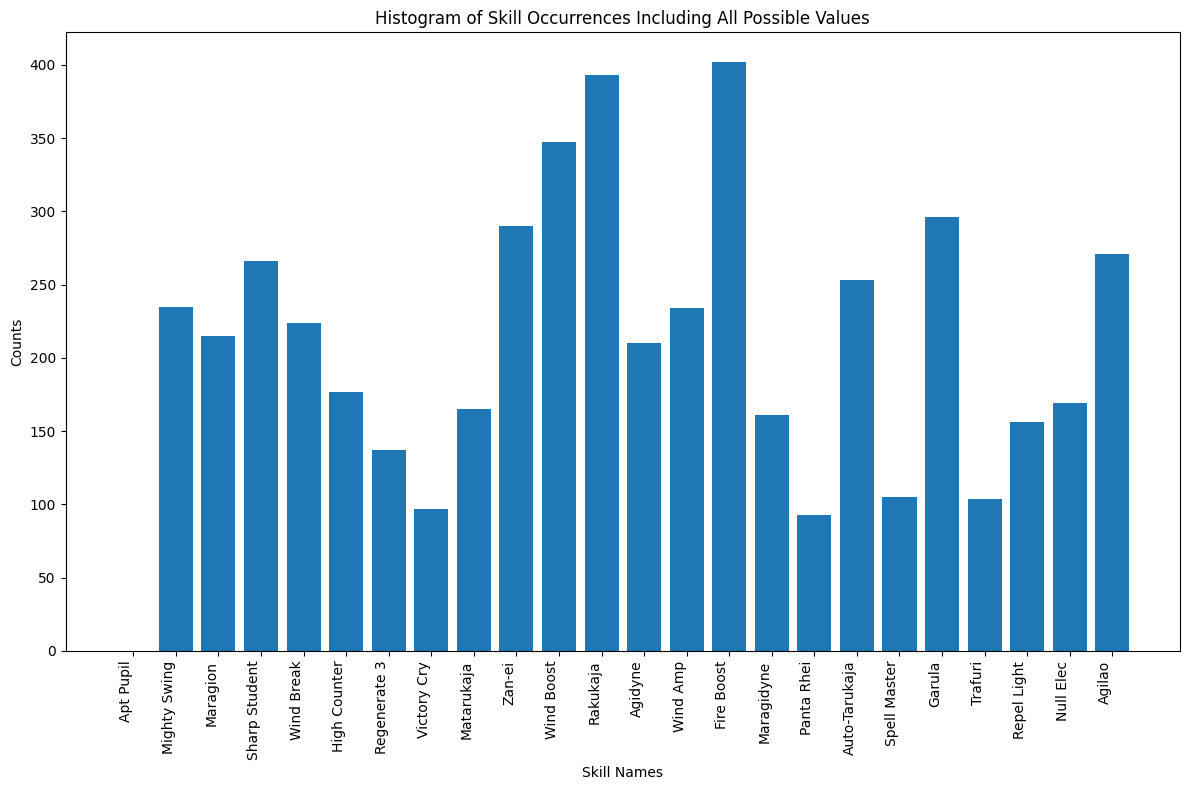

Persona List:  [('skadi', 'Empress'), ('suparna', 'Sun'), ('angel', 'Justice')]


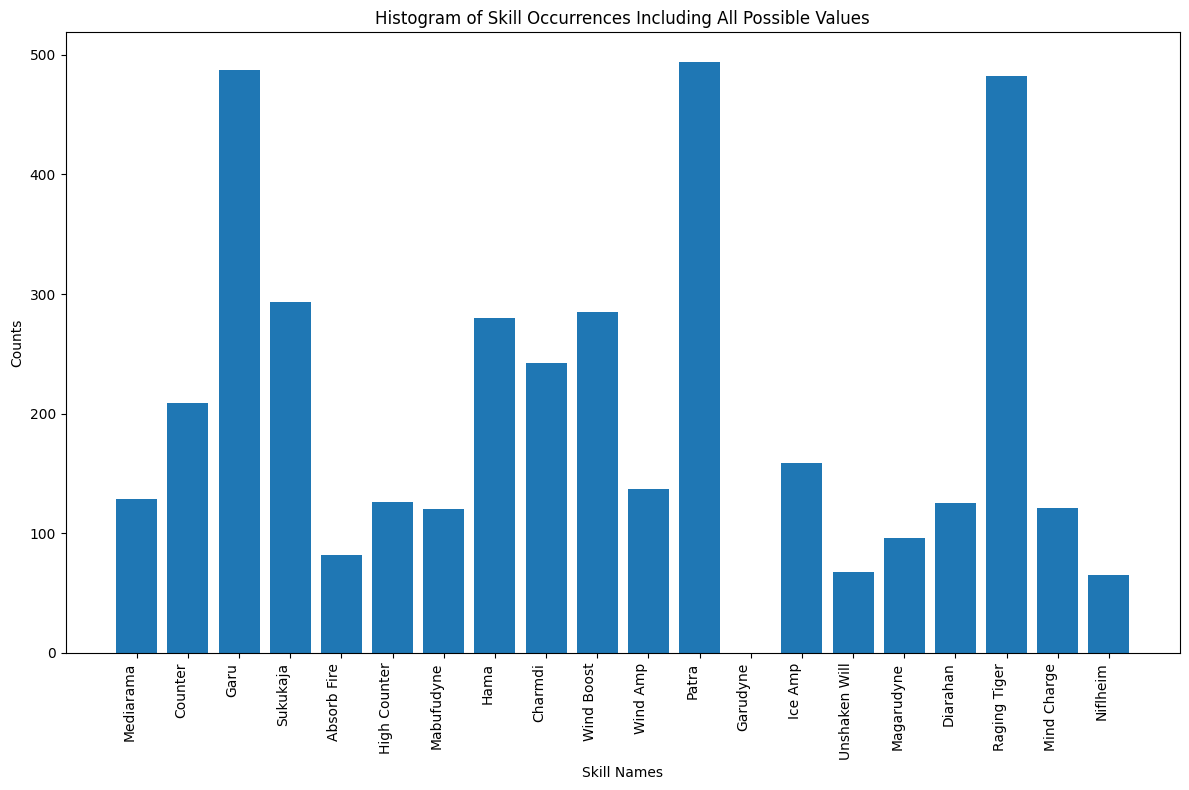

In [3]:
all_holder = InheritanceTypeHolder("ALL")

for holder in all_holder.predictionHolders:
    holder.show()

In [4]:
all_holder = InheritanceTypeHolder("ALL")


percentages = all_holder.create_percentage_dict()

# Now, percentages is a dictionary where the keys are the keys from the percentage dictionaries,
# and the values are lists of values for each key from all percentage dictionaries

# Print the keys and their corresponding lists of values
for key, val in percentages.items():
    print(f"{key}: {val}")

Zio: [0.1187374749498998, 0.1202, 0.10825, 0.10975]
Marakunda: [0.03381763527054108, 0.041120080726538846]
Counterstrike: [0.0343186372745491, 0.042]
Die for Me!: [0.014779559118236472]
Dekaja: [0.02379759519038076, 0.0316]
Resist Dark: [0.03356713426853707]
Double Fangs: [0.06763527054108216, 0.05475]
Mediarahan: [0.02004008016032064]
Megido: [0.0]
Repel Dark: [0.023046092184368736]
Agi: [0.1189879759519038]
Maragi: [0.06988977955911824, 0.0688]
Evil Touch: [0.0405811623246493]
Hamaon: [0.03882765531062124]
Marin Karin: [0.06412825651302605]
Recarmdra: [0.019288577154308616, 0.025025278058645097]
Auto-Tarukaja: [0.0435871743486974, 0.04868819374369324, 0.05125, 0.055611729019211326, 0.0506]
Mahamaon: [0.027054108216432865, 0.036125]
Spirit Drain: [0.03982965931863727]
Hama Boost: [0.0373246492985972]
Rebellion: [0.061122244488977955, 0.0684]
Tarukaja: [0.06963927855711423, 0.08400605449041372, 0.06325]
Blade of Fury: [0.03632694248234107]
Apt Pupil: [0.0, 0.0, 0.03575, 0.0]
Sukukaja: 

In [5]:
import sys
sys.path.append('/home/eduardo/Documents/Persona3/AutoTelos/skills_list')


import pandas as pd

from skills_data_frame import SkillDataFrame


skill_data_frame = SkillDataFrame()

skill_type_dict = skill_data_frame.get_skill_type_dict()

skill_rank_dict = skill_data_frame.get_skill_rank_dict()


             skill     type  rank  \
0           Cleave    Slash     1   
1      Power Slash    Slash     2   
2         Getsu-ei    Slash     3   
3           Zan-ei    Slash     3   
4       Gale Slash    Slash     3   
..             ...      ...   ...   
275  Full Analysis  Passive    99   
276   Healing Wave  Passive    99   
277         Oracle  Passive    99   
278   Support Scan  Passive    99   
279      Third Eye  Passive    99   

                                                learns  
0       Hermes, Nekomata, Chimera, Archangel, Valkyrie  
1                             Valkyrie, Gurr, Rakshasa  
2    Rakshasa, Ares, Take-Mikazuchi, Orthrus, Hanum...  
3    Oberon, Ares, Titan, Pale Rider, Power, Jikoku...  
4               Rakshasa, Ghoul, Shiisaa, Flauros, Ose  
..                                                 ...  
275                                              Lucia  
276                                              Lucia  
277                                       

In [6]:
import os

current_path = os.getcwd()
print("Current working directory:", current_path)

Current working directory: /home/eduardo/Documents/Persona3/AutoTelos/kikuriHime/histograms


In [7]:
# Create a dictionary to store the skills by type and rank
skills_by_type_and_rank = {}

for key, val in percentages.items():
    # Get the skill type and rank from the dictionaries
    skill_type = skill_type_dict[key]
    skill_rank = skill_rank_dict[key]

    # Create a tuple of skill type and rank
    type_and_rank = (skill_type, skill_rank)

    # If the type and rank is already in the dictionary, append the skill to the list
    if type_and_rank in skills_by_type_and_rank:
        skills_by_type_and_rank[type_and_rank].append(key)
    # Otherwise, add a new list with the skill to the dictionary
    else:
        skills_by_type_and_rank[type_and_rank] = [key]

# Now, skills_by_type_and_rank is a dictionary where the keys are tuples of skill type and rank,
# and the values are lists of skills with that type and rank

# Print the type and rank and their corresponding lists of skills
for type_and_rank, skills in skills_by_type_and_rank.items():
    print(f"{type_and_rank}: {skills}")

('Elec', 1): ['Zio']
('Enhance', 4): ['Marakunda', 'Power Charge', 'Elec Break', 'Ice Break', 'Matarunda', 'Wind Break']
('Passive', 4): ['Counterstrike', 'Resist Dark', 'Hama Boost', 'Growth 3', 'Resist Fire', 'Wind Amp', 'Elec Amp', 'Ice Amp']
('Dark', 9): ['Die for Me!']
('Enhance', 5): ['Dekaja', 'Matarukaja', 'Marakukaja', 'Mind Charge']
('Pierce', 2): ['Double Fangs']
('Recovery', 7): ['Mediarahan']
('Almighty', 6): ['Megido']
('Passive', 6): ['Repel Dark', 'Auto-Maraku', '1hSwd Master', 'Invigorate 3', 'Regenerate 3', 'Auto-Mataru', 'Repel Light']
('Fire', 1): ['Agi']
('Fire', 2): ['Maragi']
('Bad Status', 3): ['Evil Touch', 'Poison Mist', 'Sexy Dance']
('Light', 4): ['Hamaon']
('Bad Status', 2): ['Marin Karin', 'Pulinpa', 'Provoke']
('Special', 7): ['Recarmdra']
('Passive', 3): ['Auto-Tarukaja', 'Dodge Wind', 'Counter', 'Dodge Strike', 'Auto-Rakukaja']
('Light', 5): ['Mahamaon']
('Almighty', 4): ['Spirit Drain']
('Enhance', 2): ['Rebellion', 'Tarukaja', 'Sukukaja', 'Rakukaja', 

In [8]:
avg_prob_per_skill_dict = {}
for skills, precents in percentages.items():
    summation = 0.0
    count = 0
    for skill in precents:
        if skill == 0:
            print(f"Skill {skills} has 0% coverage")
        else:
            summation += skill
            count += 1
    if count > 0:
        avg = summation / count
        print(f"{skills}: {avg}")
        avg_prob_per_skill_dict[skills] = avg
    else:
        print(f"No non-zero percentages for skill {skills}")

Zio: 0.11423436873747496
Marakunda: 0.03746885799853997
Counterstrike: 0.03815931863727455
Die for Me!: 0.014779559118236472
Dekaja: 0.02769879759519038
Resist Dark: 0.03356713426853707
Double Fangs: 0.061192635270541085
Mediarahan: 0.02004008016032064
Skill Megido has 0% coverage
No non-zero percentages for skill Megido
Repel Dark: 0.023046092184368736
Agi: 0.1189879759519038
Maragi: 0.06934488977955912
Evil Touch: 0.0405811623246493
Hamaon: 0.03882765531062124
Marin Karin: 0.06412825651302605
Recarmdra: 0.022156927606476855
Auto-Tarukaja: 0.049947419422320394
Mahamaon: 0.03158955410821643
Spirit Drain: 0.03982965931863727
Hama Boost: 0.0373246492985972
Rebellion: 0.06476112224448898
Tarukaja: 0.07229844434917598
Blade of Fury: 0.03632694248234107
Skill Apt Pupil has 0% coverage
Skill Apt Pupil has 0% coverage
Skill Apt Pupil has 0% coverage
Apt Pupil: 0.03575
Sukukaja: 0.062301785074773054
Null Distress: 0.03623932378259747
Mazionga: 0.040110998990918266
Me Patra: 0.0458346787756475


In [9]:
import pandas as pd


df = pd.read_csv("/home/eduardo/Documents/Persona3/AutoTelos/skills_list/skills.csv")


skill_type_dict = df.set_index('skill')['type'].to_dict()

skill_rank_dict = df.set_index('skill')['rank'].to_dict()

# given a skill name return the skill type
def get_skill_type(skill_name):
    return skill_type_dict[skill_name]

def get_skill_rank(skill_name):
    return skill_rank_dict[skill_name]

# load '/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/inheritance.csv' into a dataframe
inheritance_df = pd.read_csv('/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/inheritance.csv')
# load '/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/personas_inheritance.csv' into a dataframe
persona_inheritance_df = pd.read_csv('/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/personas_inheritance.csv')

def get_persona_inheritance_type(persona_name):
    return persona_inheritance_df.loc[persona_inheritance_df['Persona'] == persona_name, 'Type'].iloc[0]



# Convert the DataFrame to a dictionary where each key is an inheritance type
# and its value is another dictionary of skill types and their probabilities.
inheritance_dict = inheritance_df.set_index('Inheritance Type').T.to_dict('dict')



# given a skill type return the skill inheritance probability for a given persona type
def get_inheritance_probability(skill_type, persona_inheritance_type):
    # Access the nested dictionary directly for the value
    # Check if the persona_inheritance_type exists to avoid KeyErrors
    if persona_inheritance_type in inheritance_dict:
        # Return the probability value for the given skill_type and persona_inheritance_type
        return inheritance_dict[persona_inheritance_type].get(skill_type, 0)  # Returns 0 if skill_type is not found

In [10]:
skill_prob_list = list(avg_prob_per_skill_dict.keys())

ranks = []

dict_skill_to_rank = {}



for s in skill_prob_list:
    print(s, get_skill_rank(s))
    ranks.append(get_skill_rank(s))
    dict_skill_to_rank[s] = get_skill_rank(s)

ranks = list(set(ranks))

print(ranks)

print(dict_skill_to_rank)

Zio 1
Marakunda 4
Counterstrike 4
Die for Me! 9
Dekaja 5
Resist Dark 4
Double Fangs 2
Mediarahan 7
Repel Dark 6
Agi 1
Maragi 2
Evil Touch 3
Hamaon 4
Marin Karin 2
Recarmdra 7
Auto-Tarukaja 3
Mahamaon 5
Spirit Drain 4
Hama Boost 4
Rebellion 2
Tarukaja 2
Blade of Fury 5
Apt Pupil 5
Sukukaja 2
Null Distress 5
Mazionga 4
Me Patra 3
Zan-ei 3
Growth 3 4
Matarukaja 5
Samsara 9
Null Dark 5
Power Charge 4
Deathbound 6
Torrent Shot 4
Patra 1
Diarahan 5
Diarama 3
Recarm 4
Mabufula 4
Heat Wave 5
Elec Break 4
Zionga 3
Pulinpa 2
Auto-Maraku 6
Virus Breath 5
Getsu-ei 3
Elec Boost 2
Charmdi 2
Ice Break 4
Bufudyne 5
Marakukaja 5
Invigorate 2 5
Resist Fire 4
Amrita 6
Mazio 2
Null Poison 5
Growth 1 2
Kill Rush 3
Mighty Swing 4
Maragion 4
High Counter 5
Brave Blade 8
Victory Cry 9
Makarakarn 7
Agidyne 5
Fire Boost 2
Provoke 2
Tentarafoo 4
Foul Breath 2
Magarudyne 6
Mamudoon 5
Spell Master 9
Megidolaon 8
Agilao 3
Myriad Arrows 7
1hSwd Master 6
Absorb Slash 8
Invigorate 3 6
Ghastly Wail 8
Salvation 9
God's 

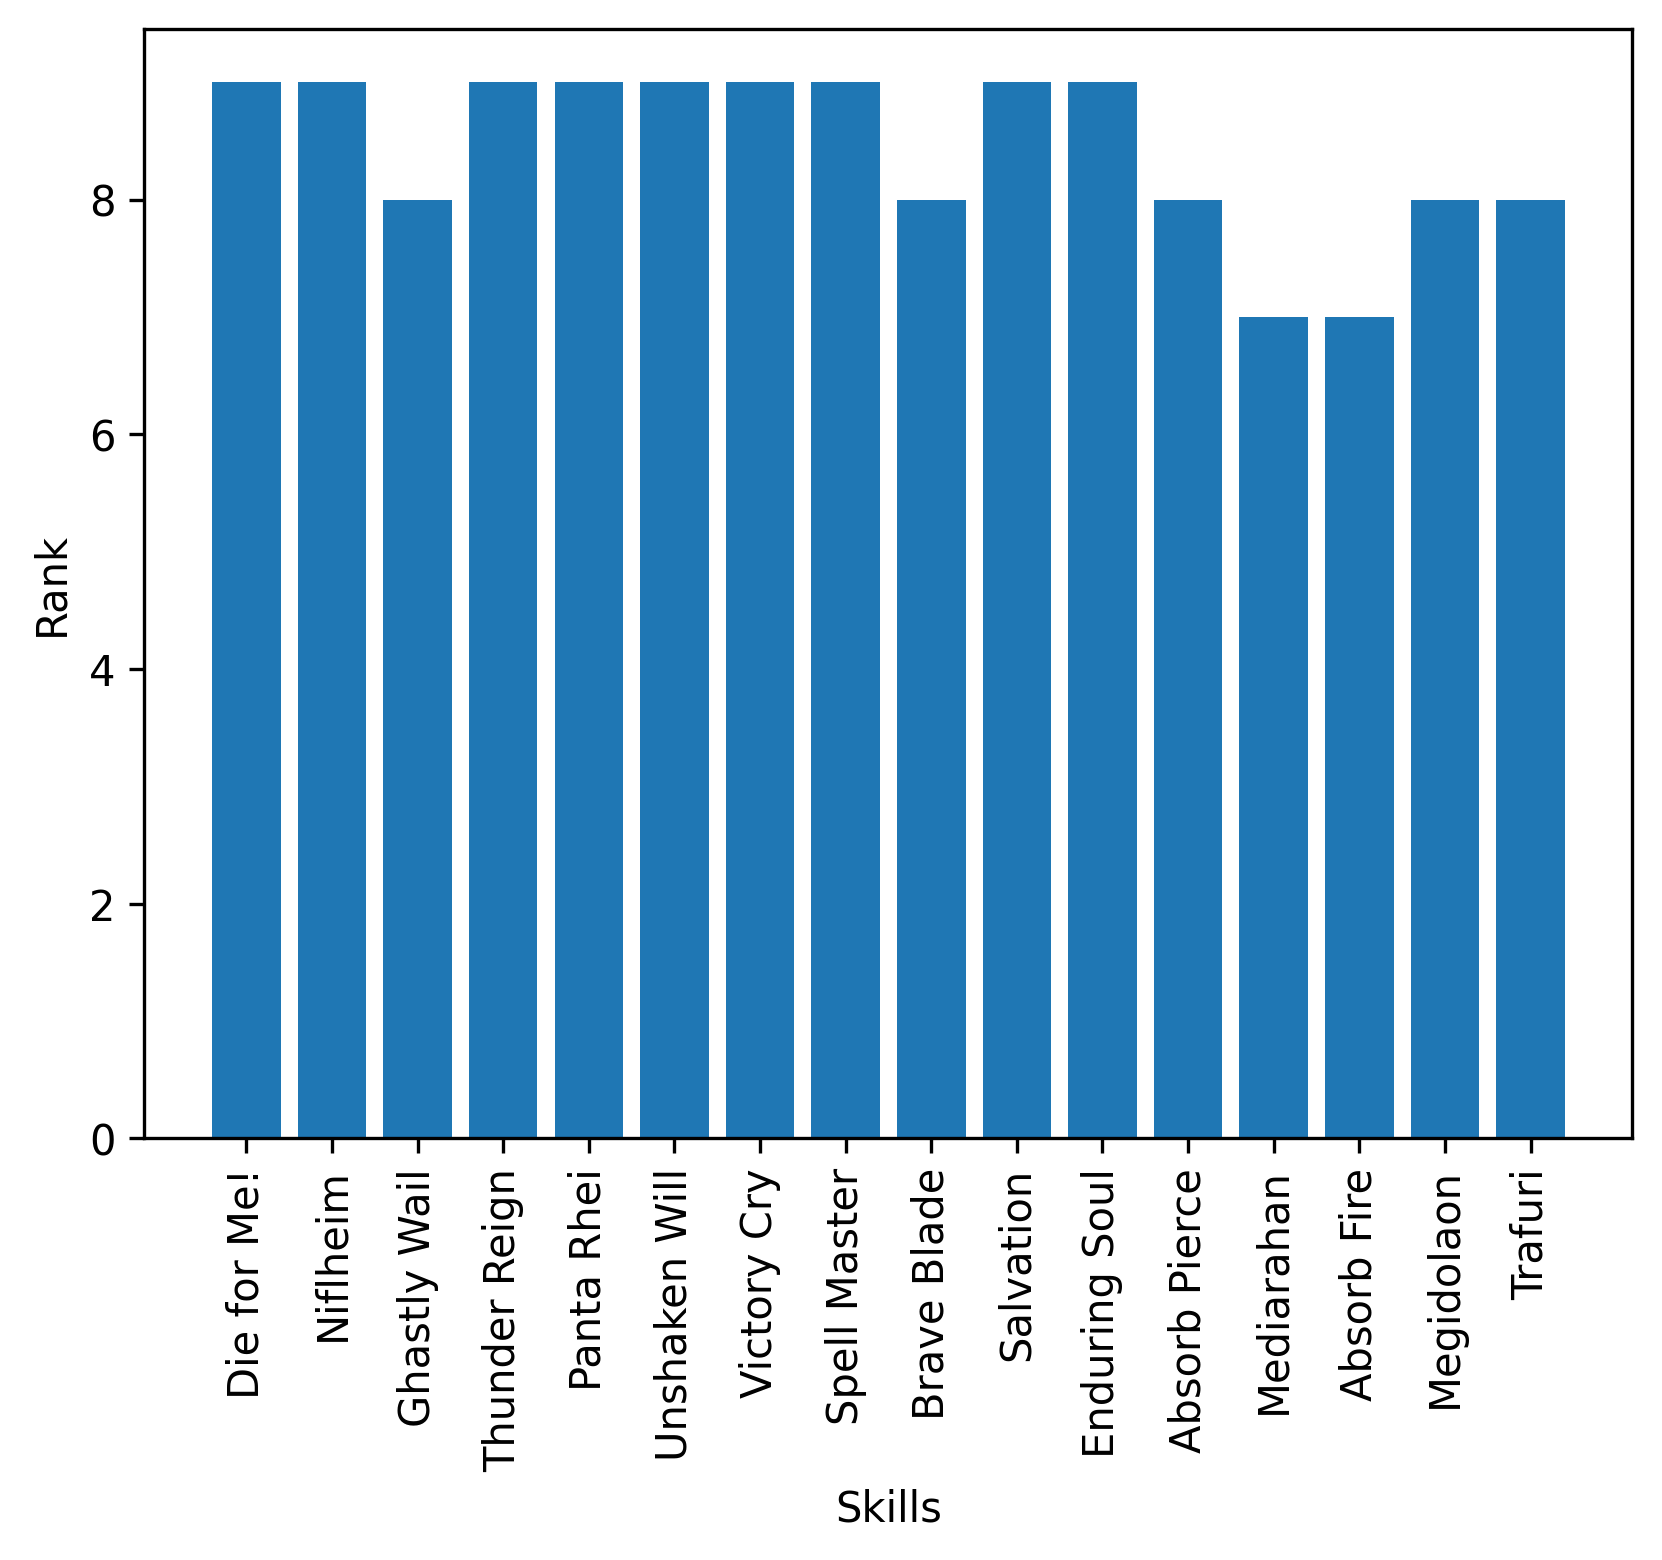

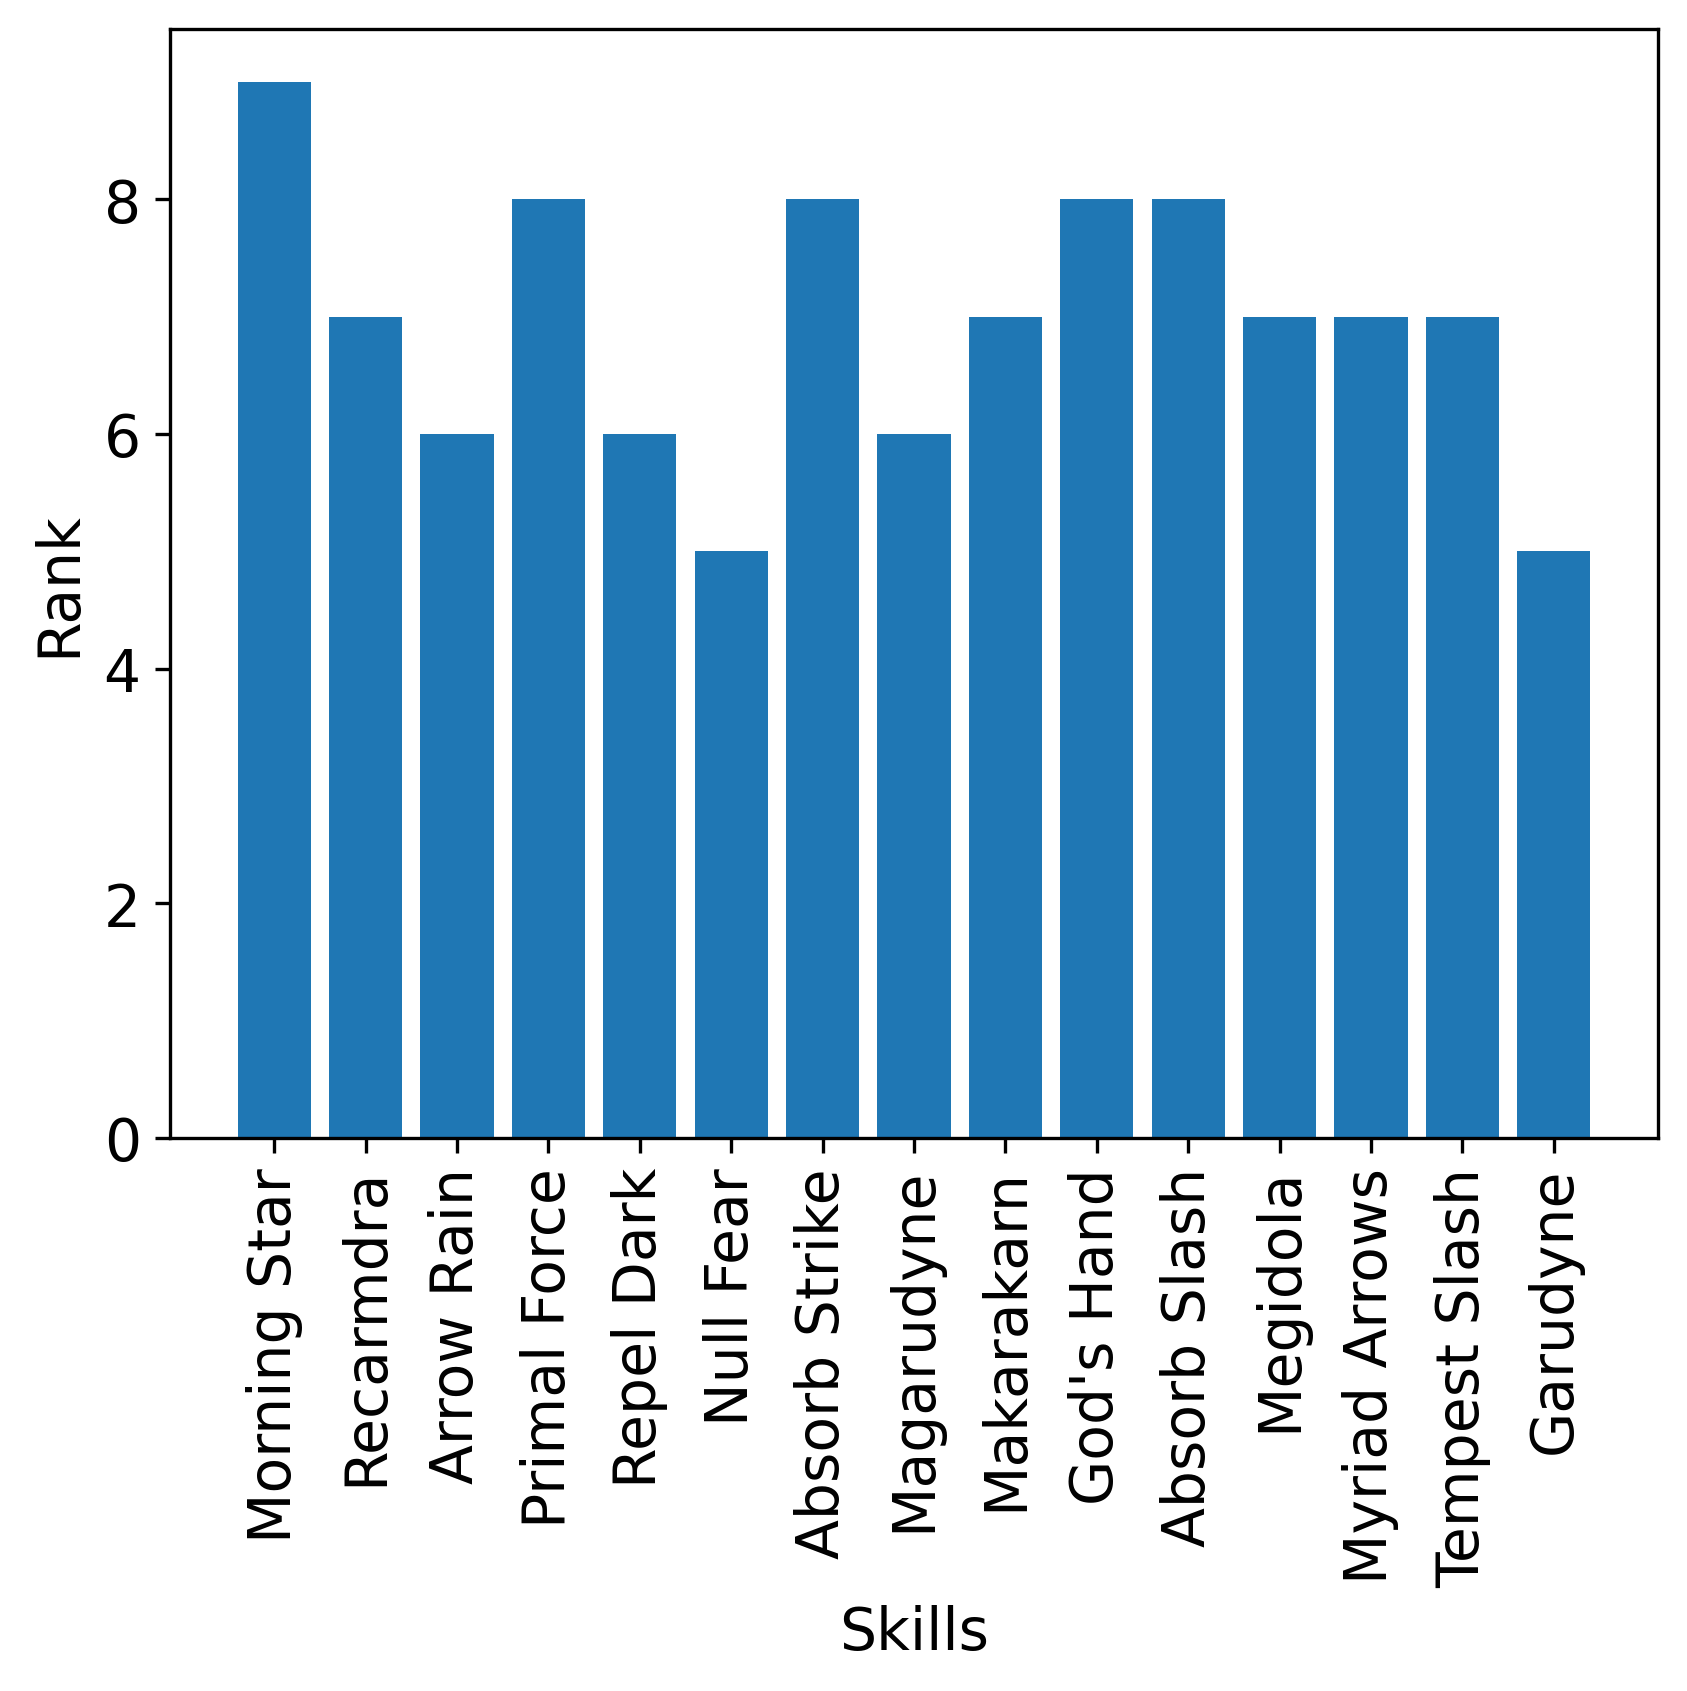

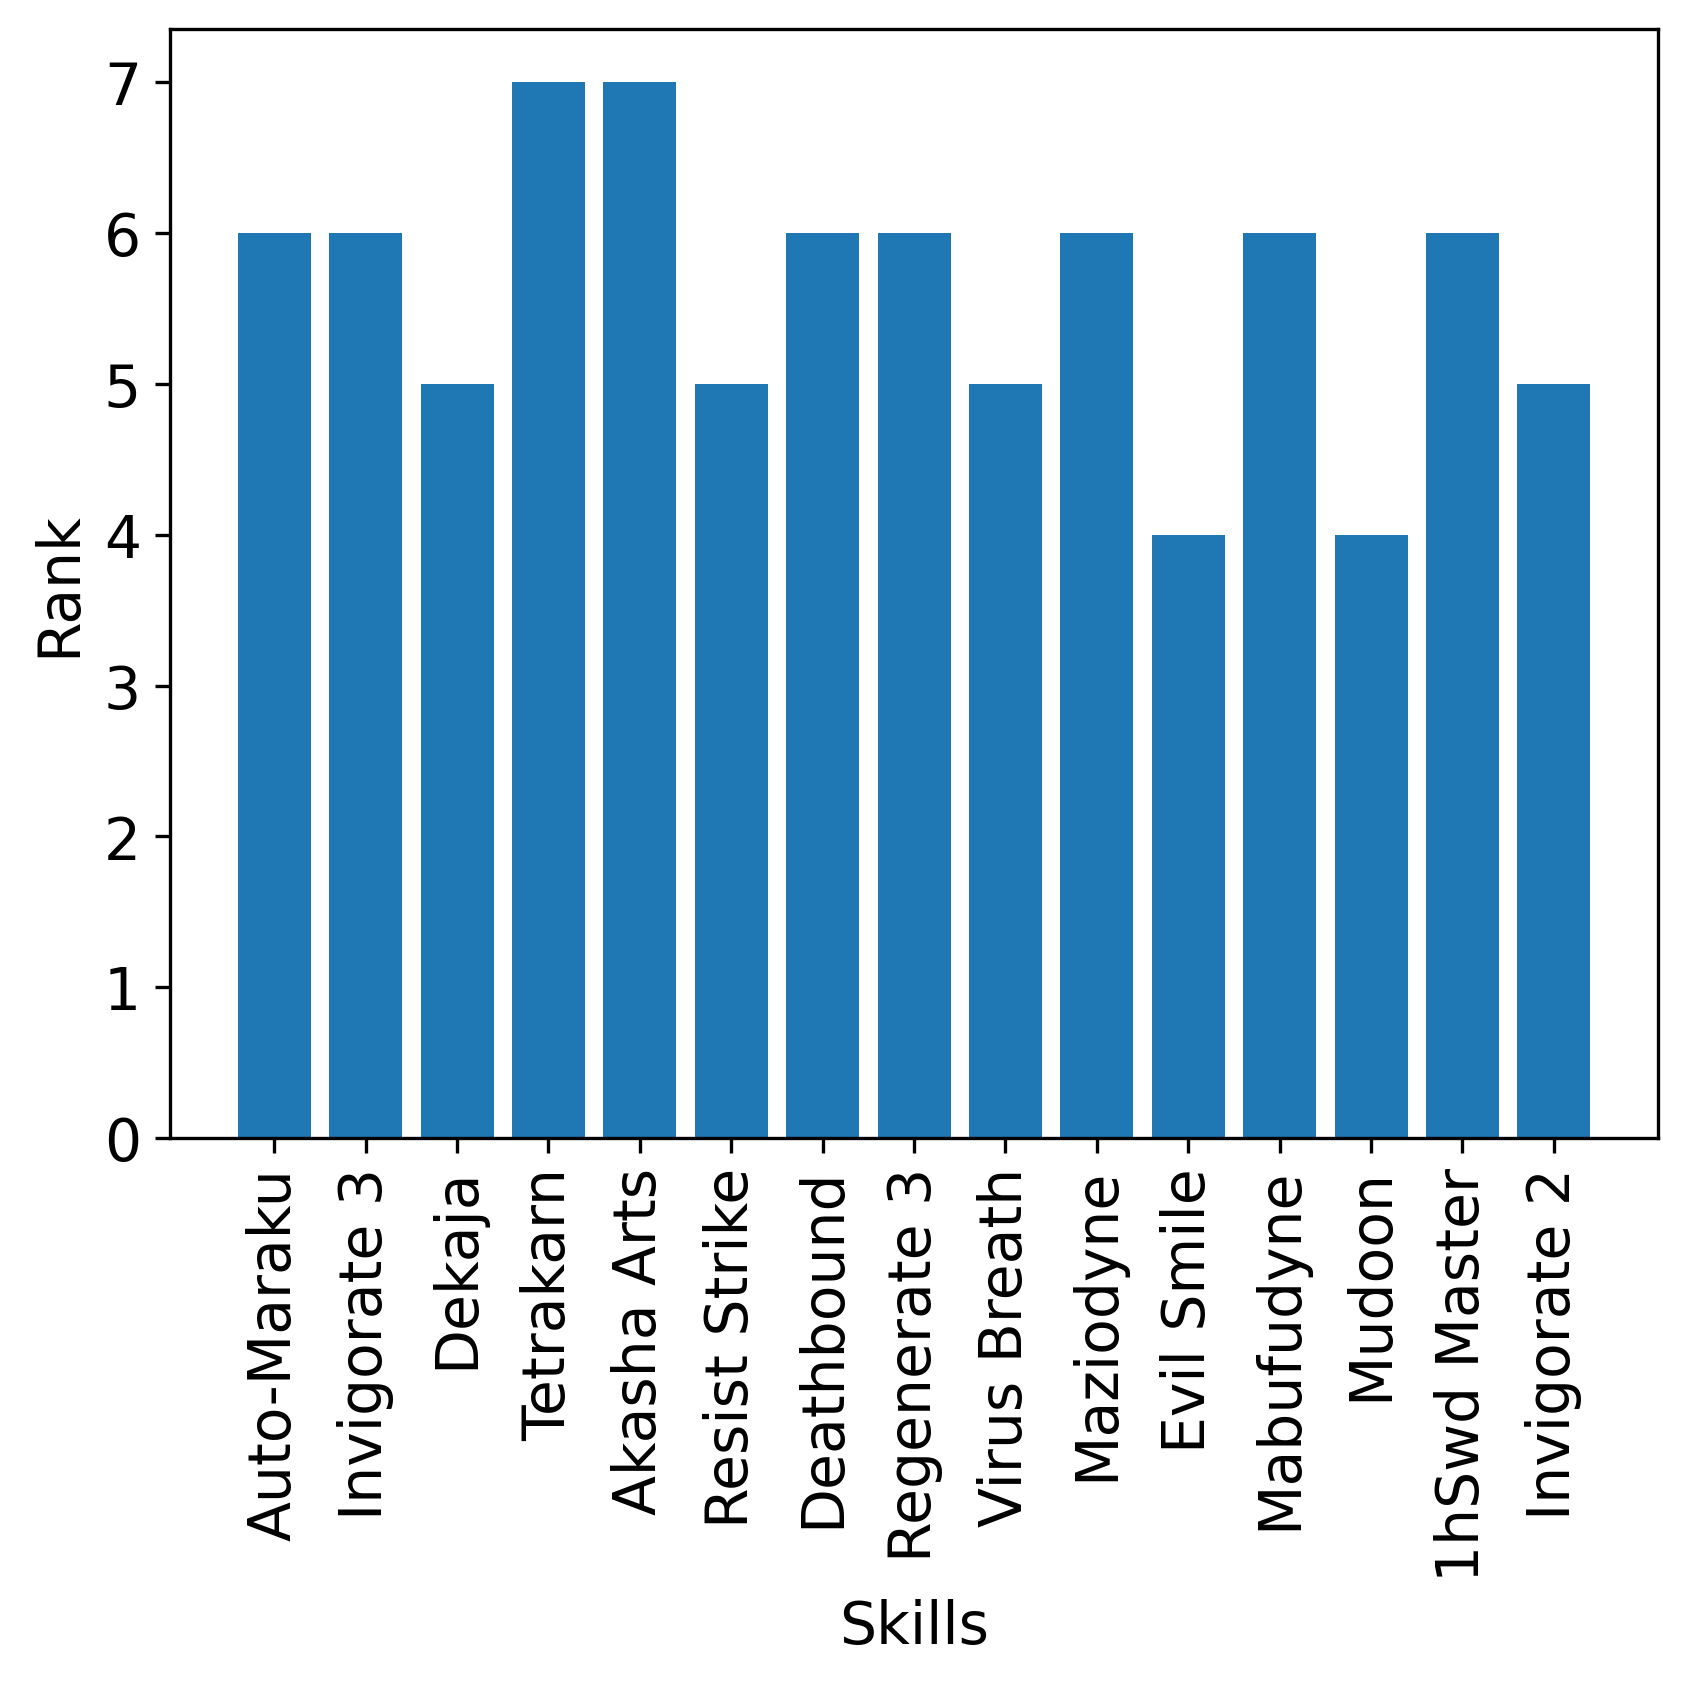

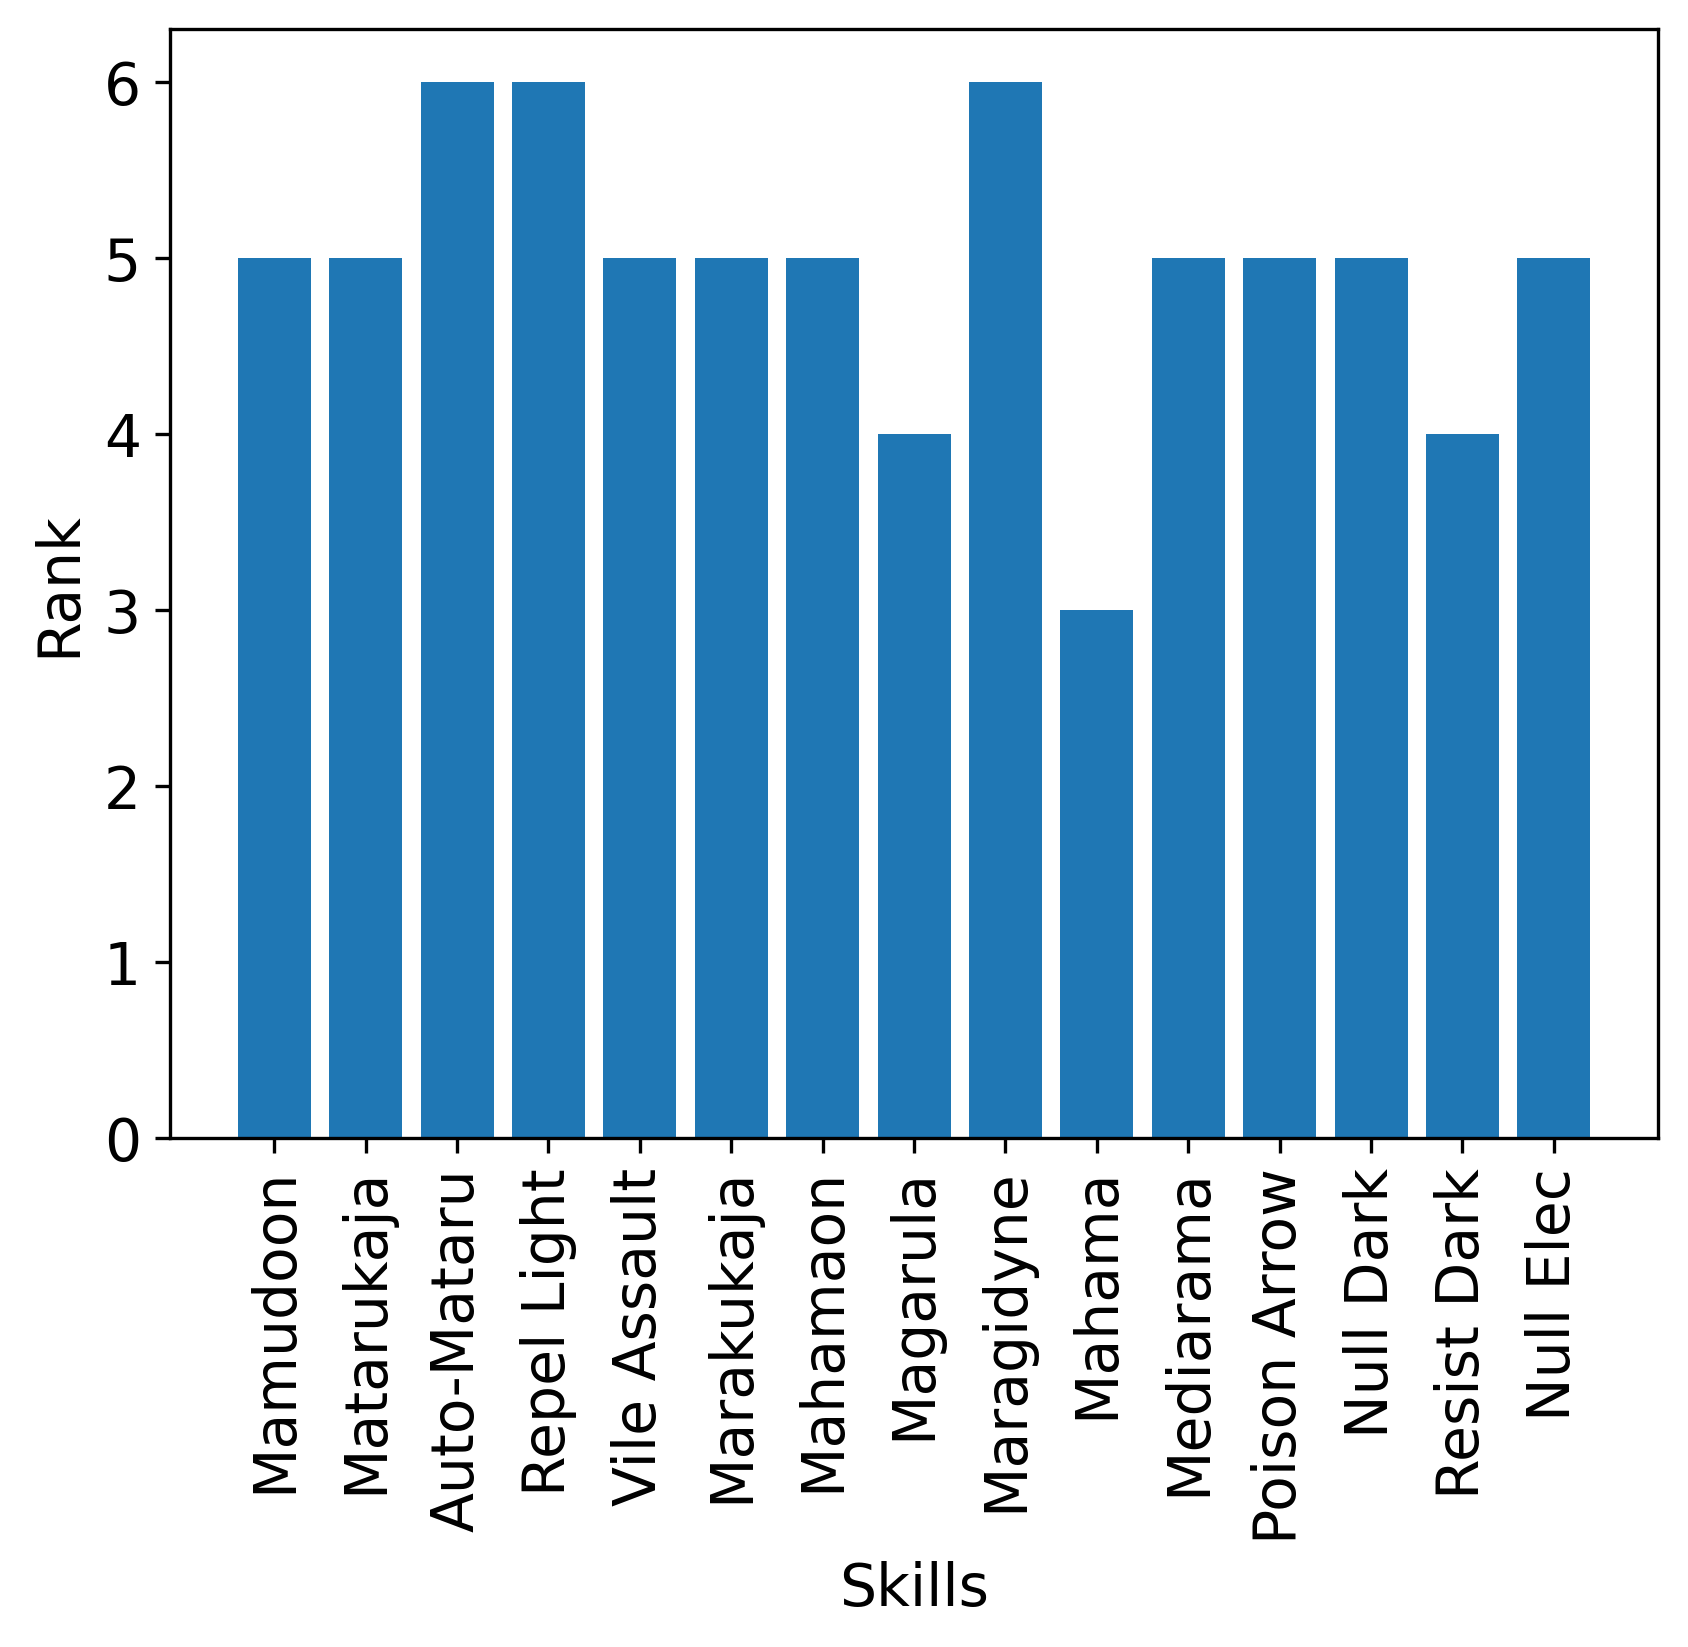

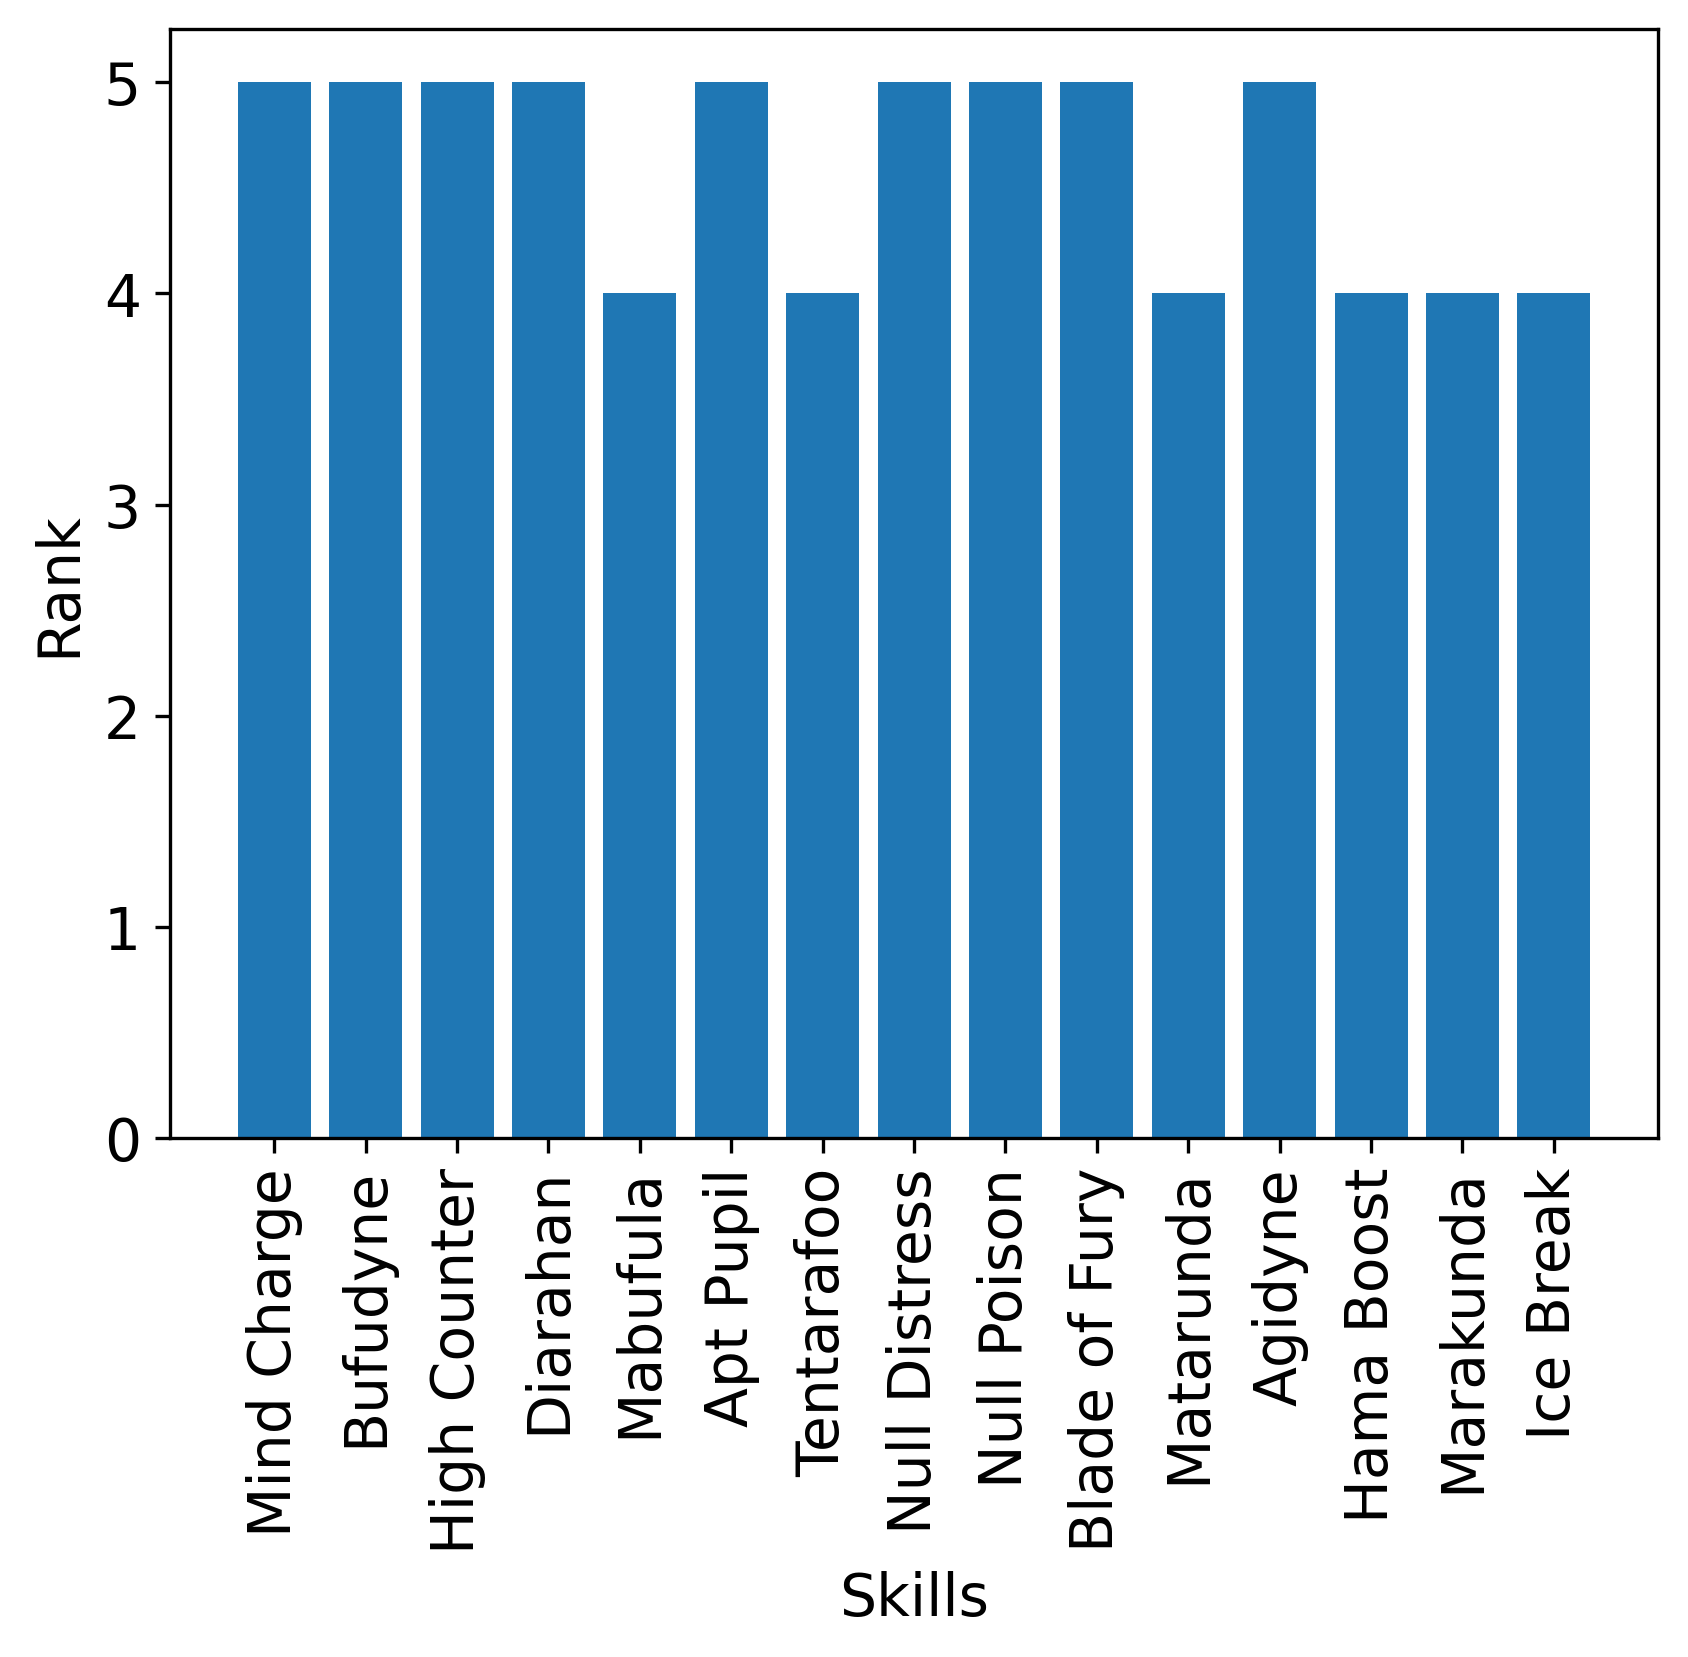

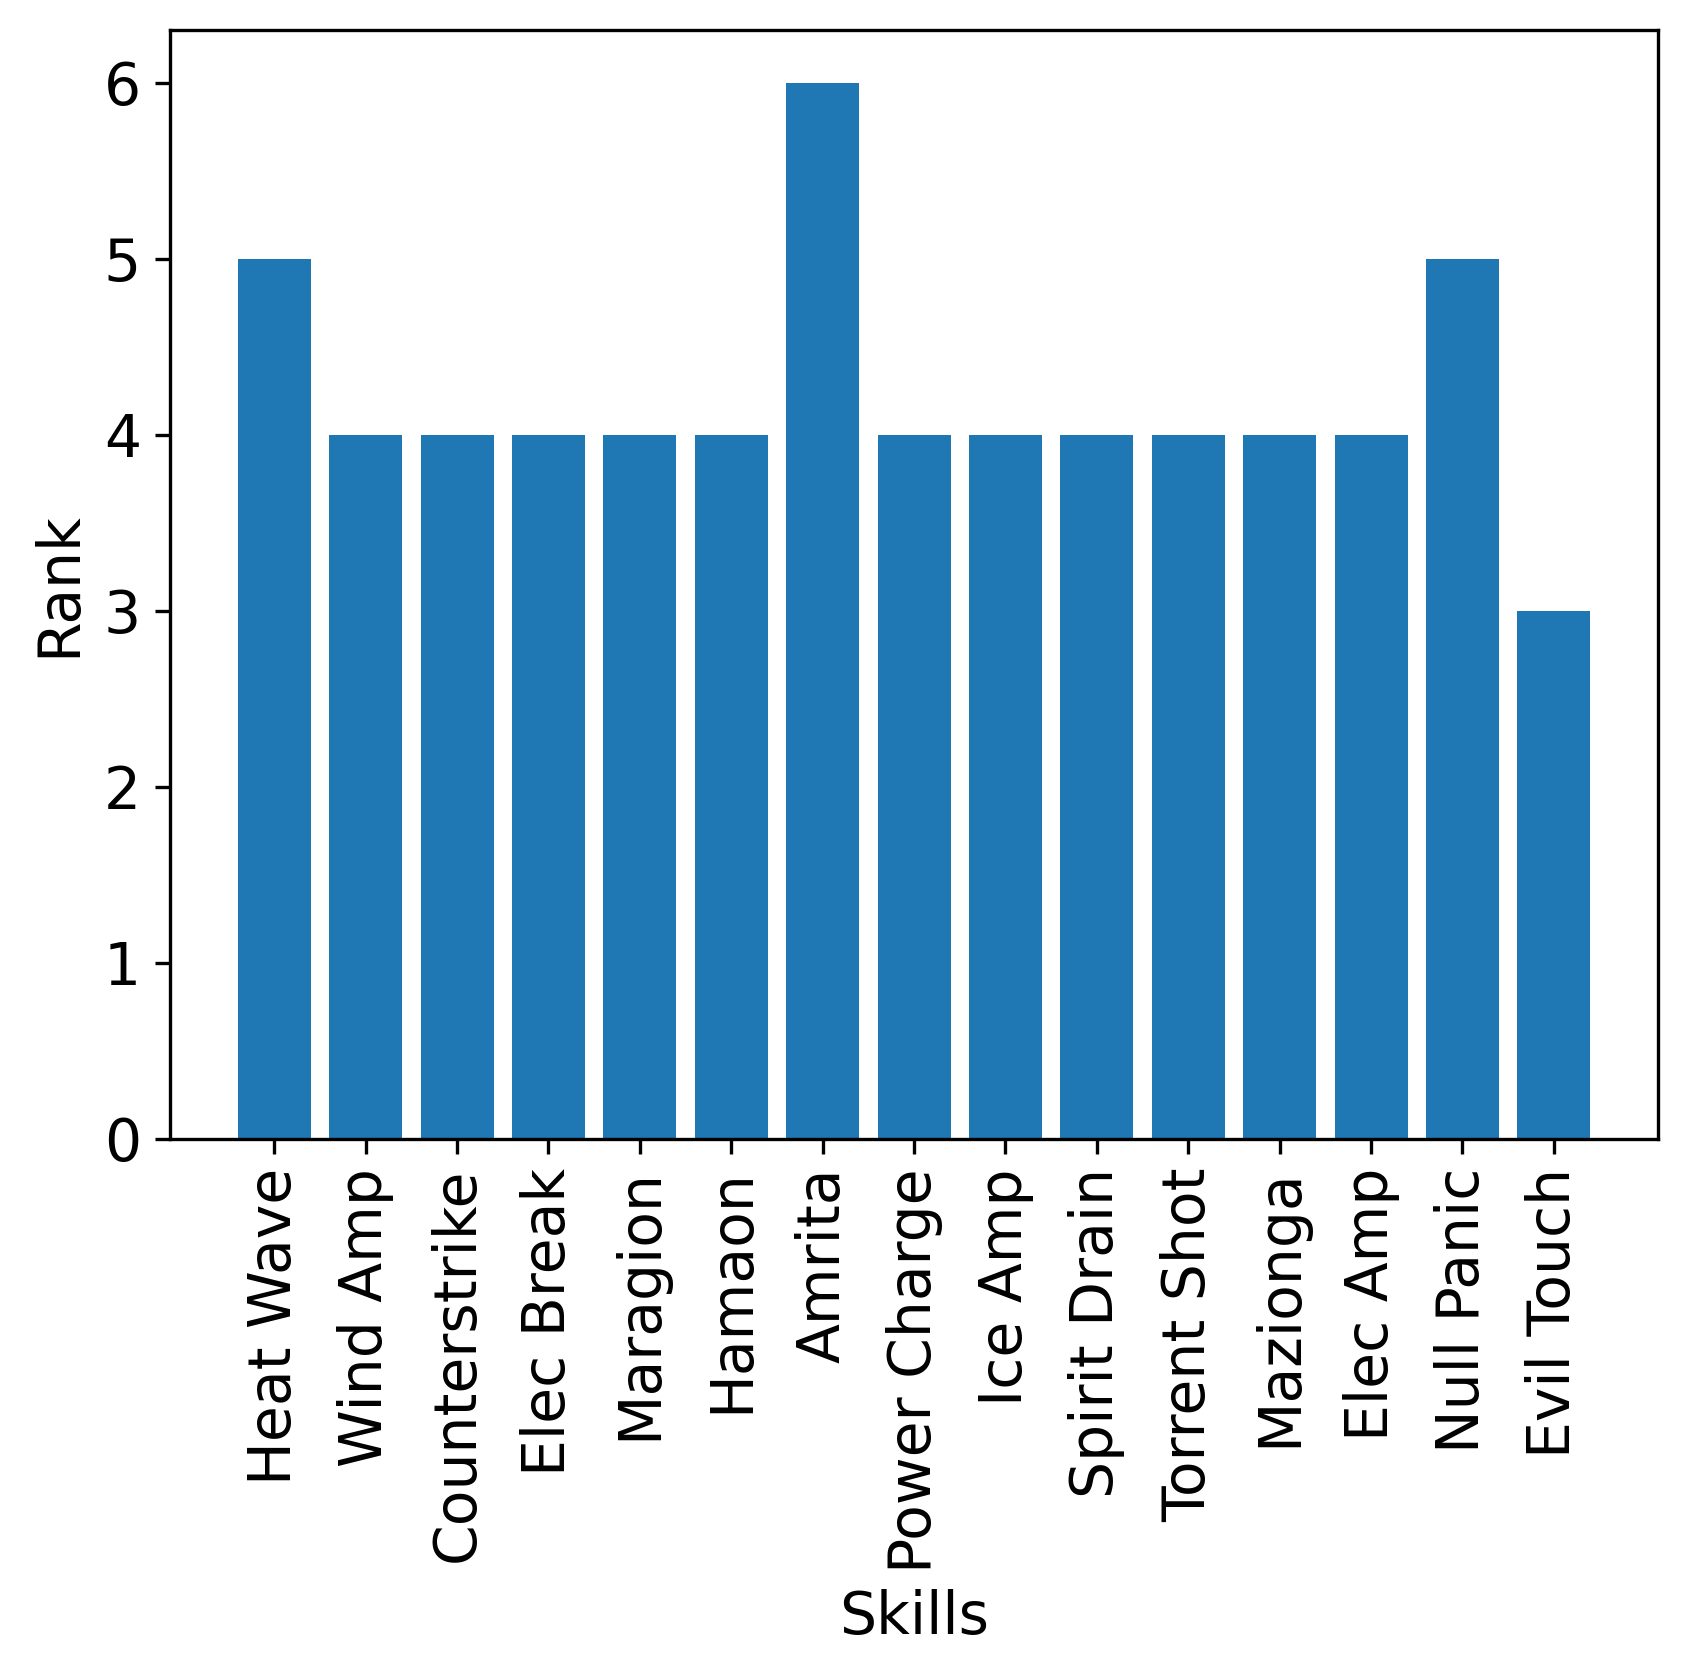

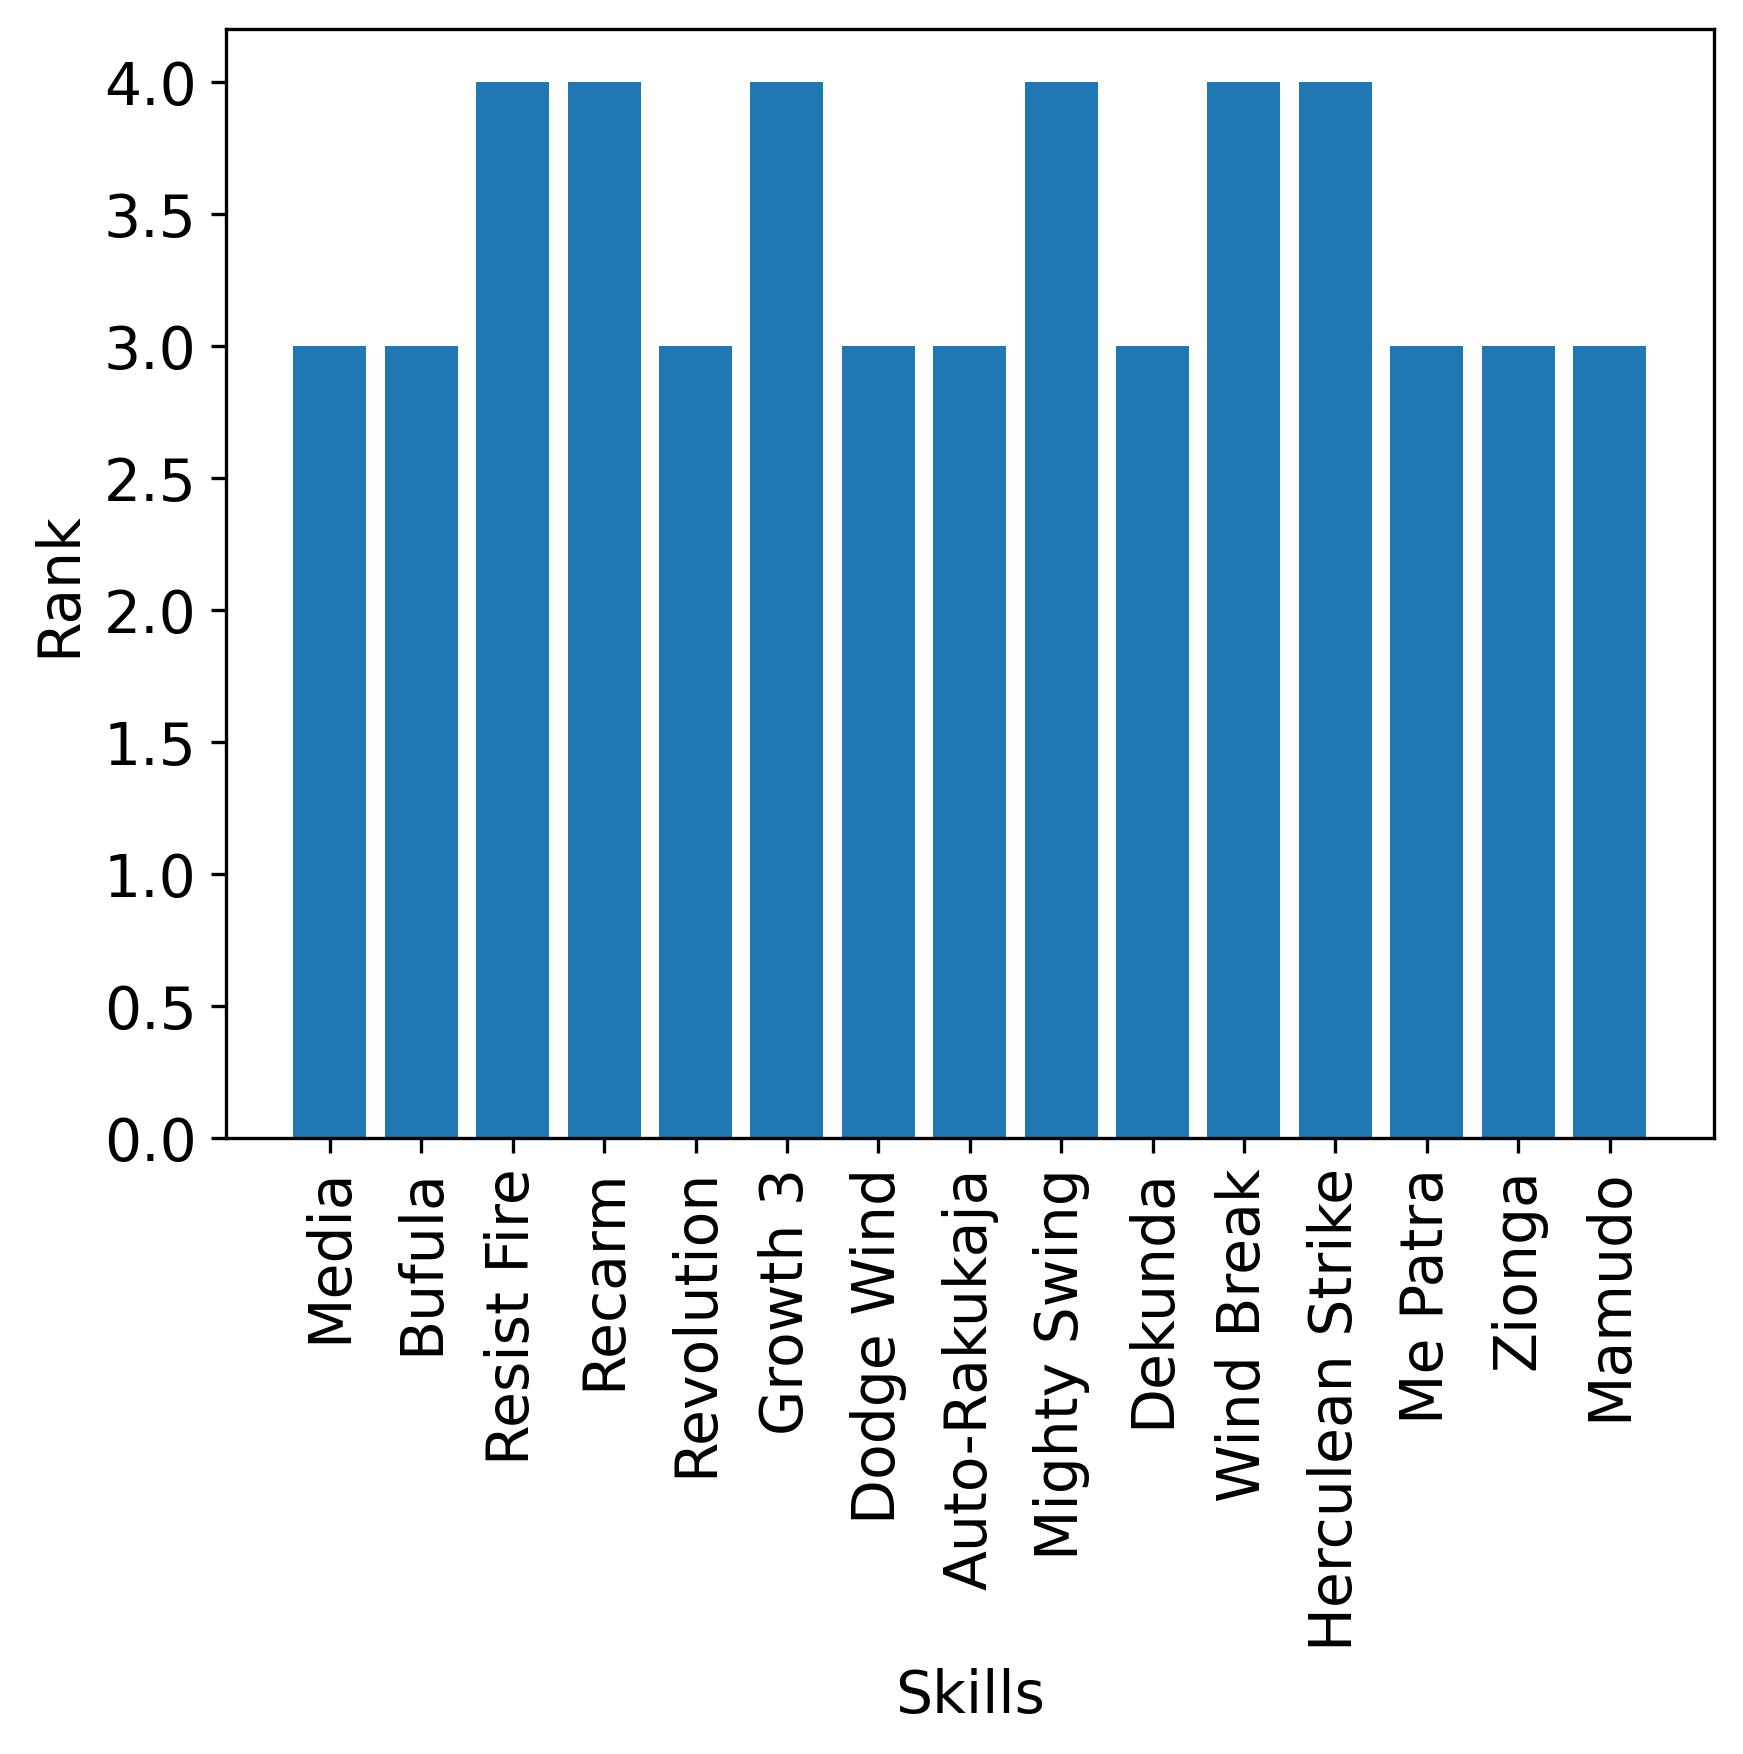

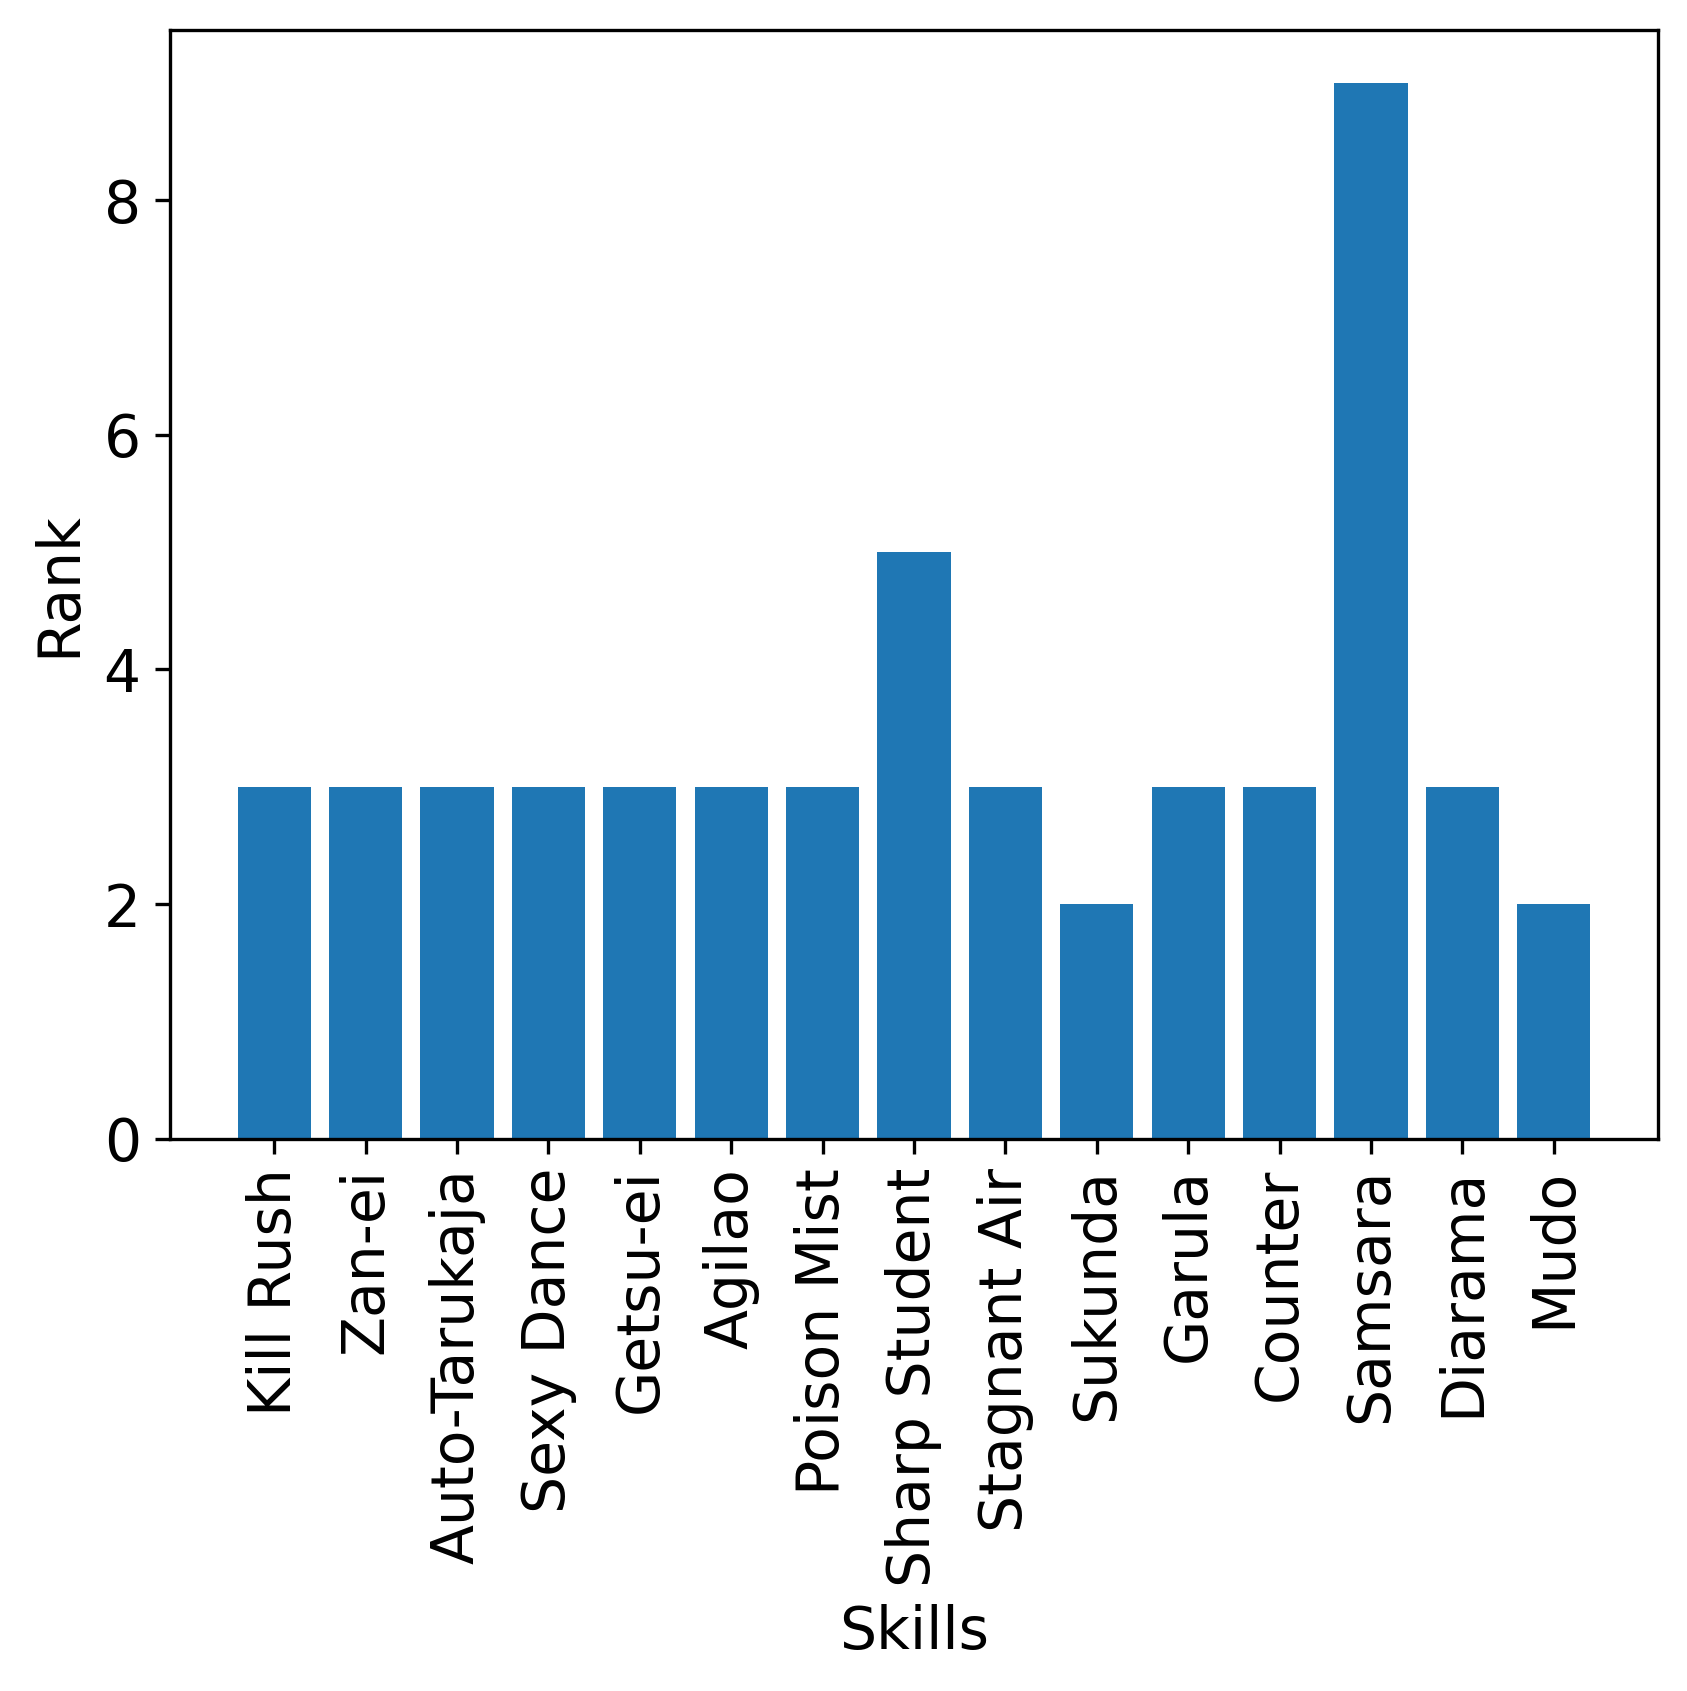

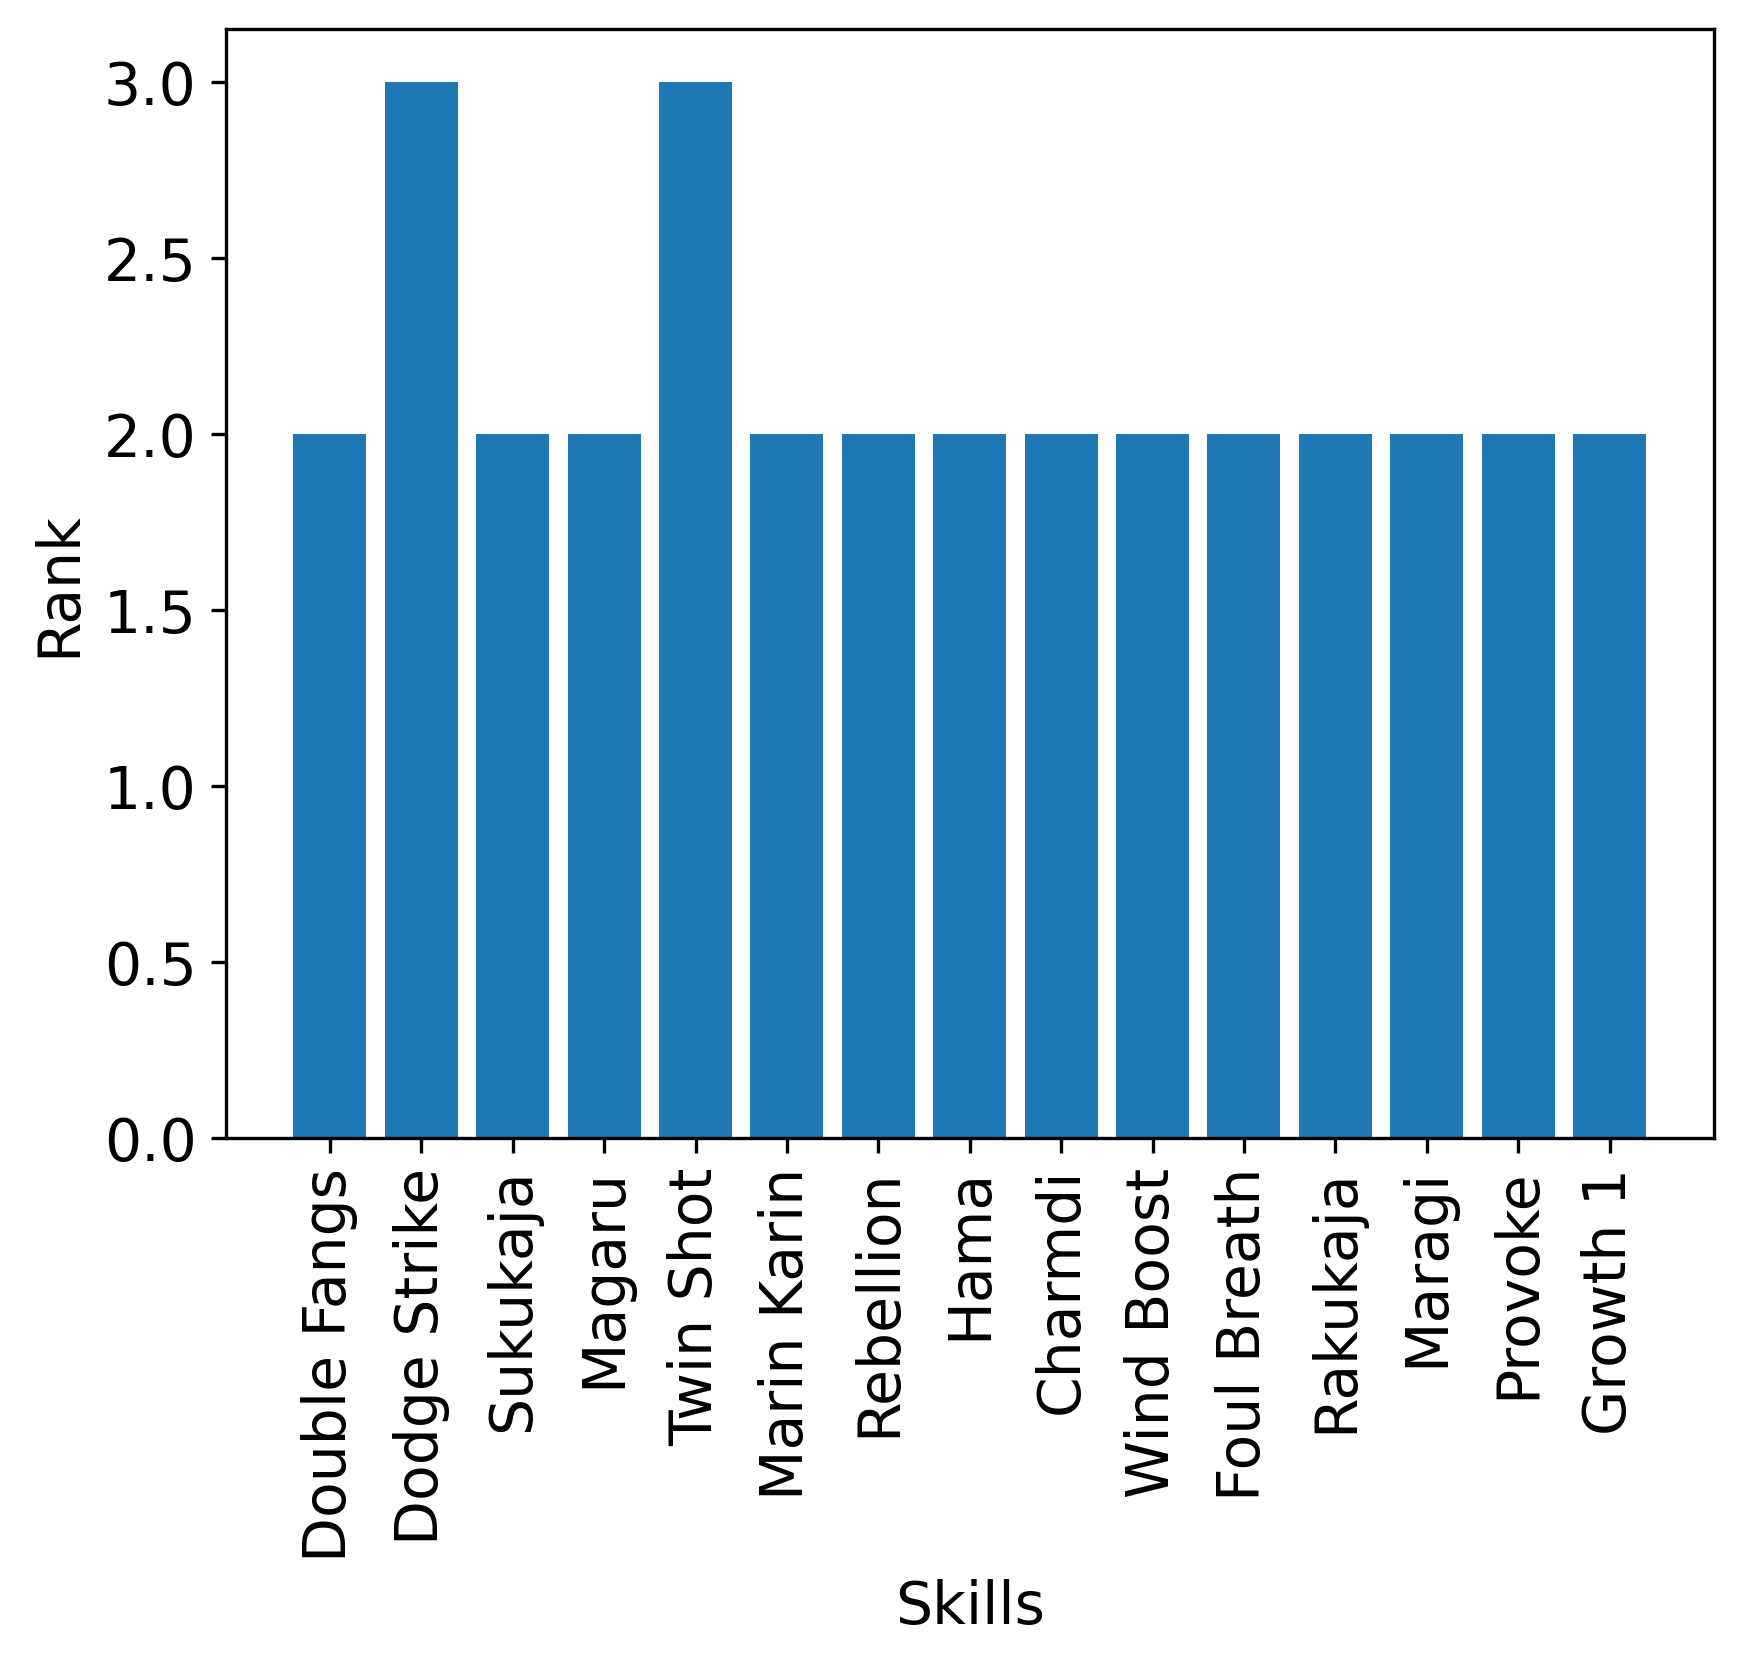

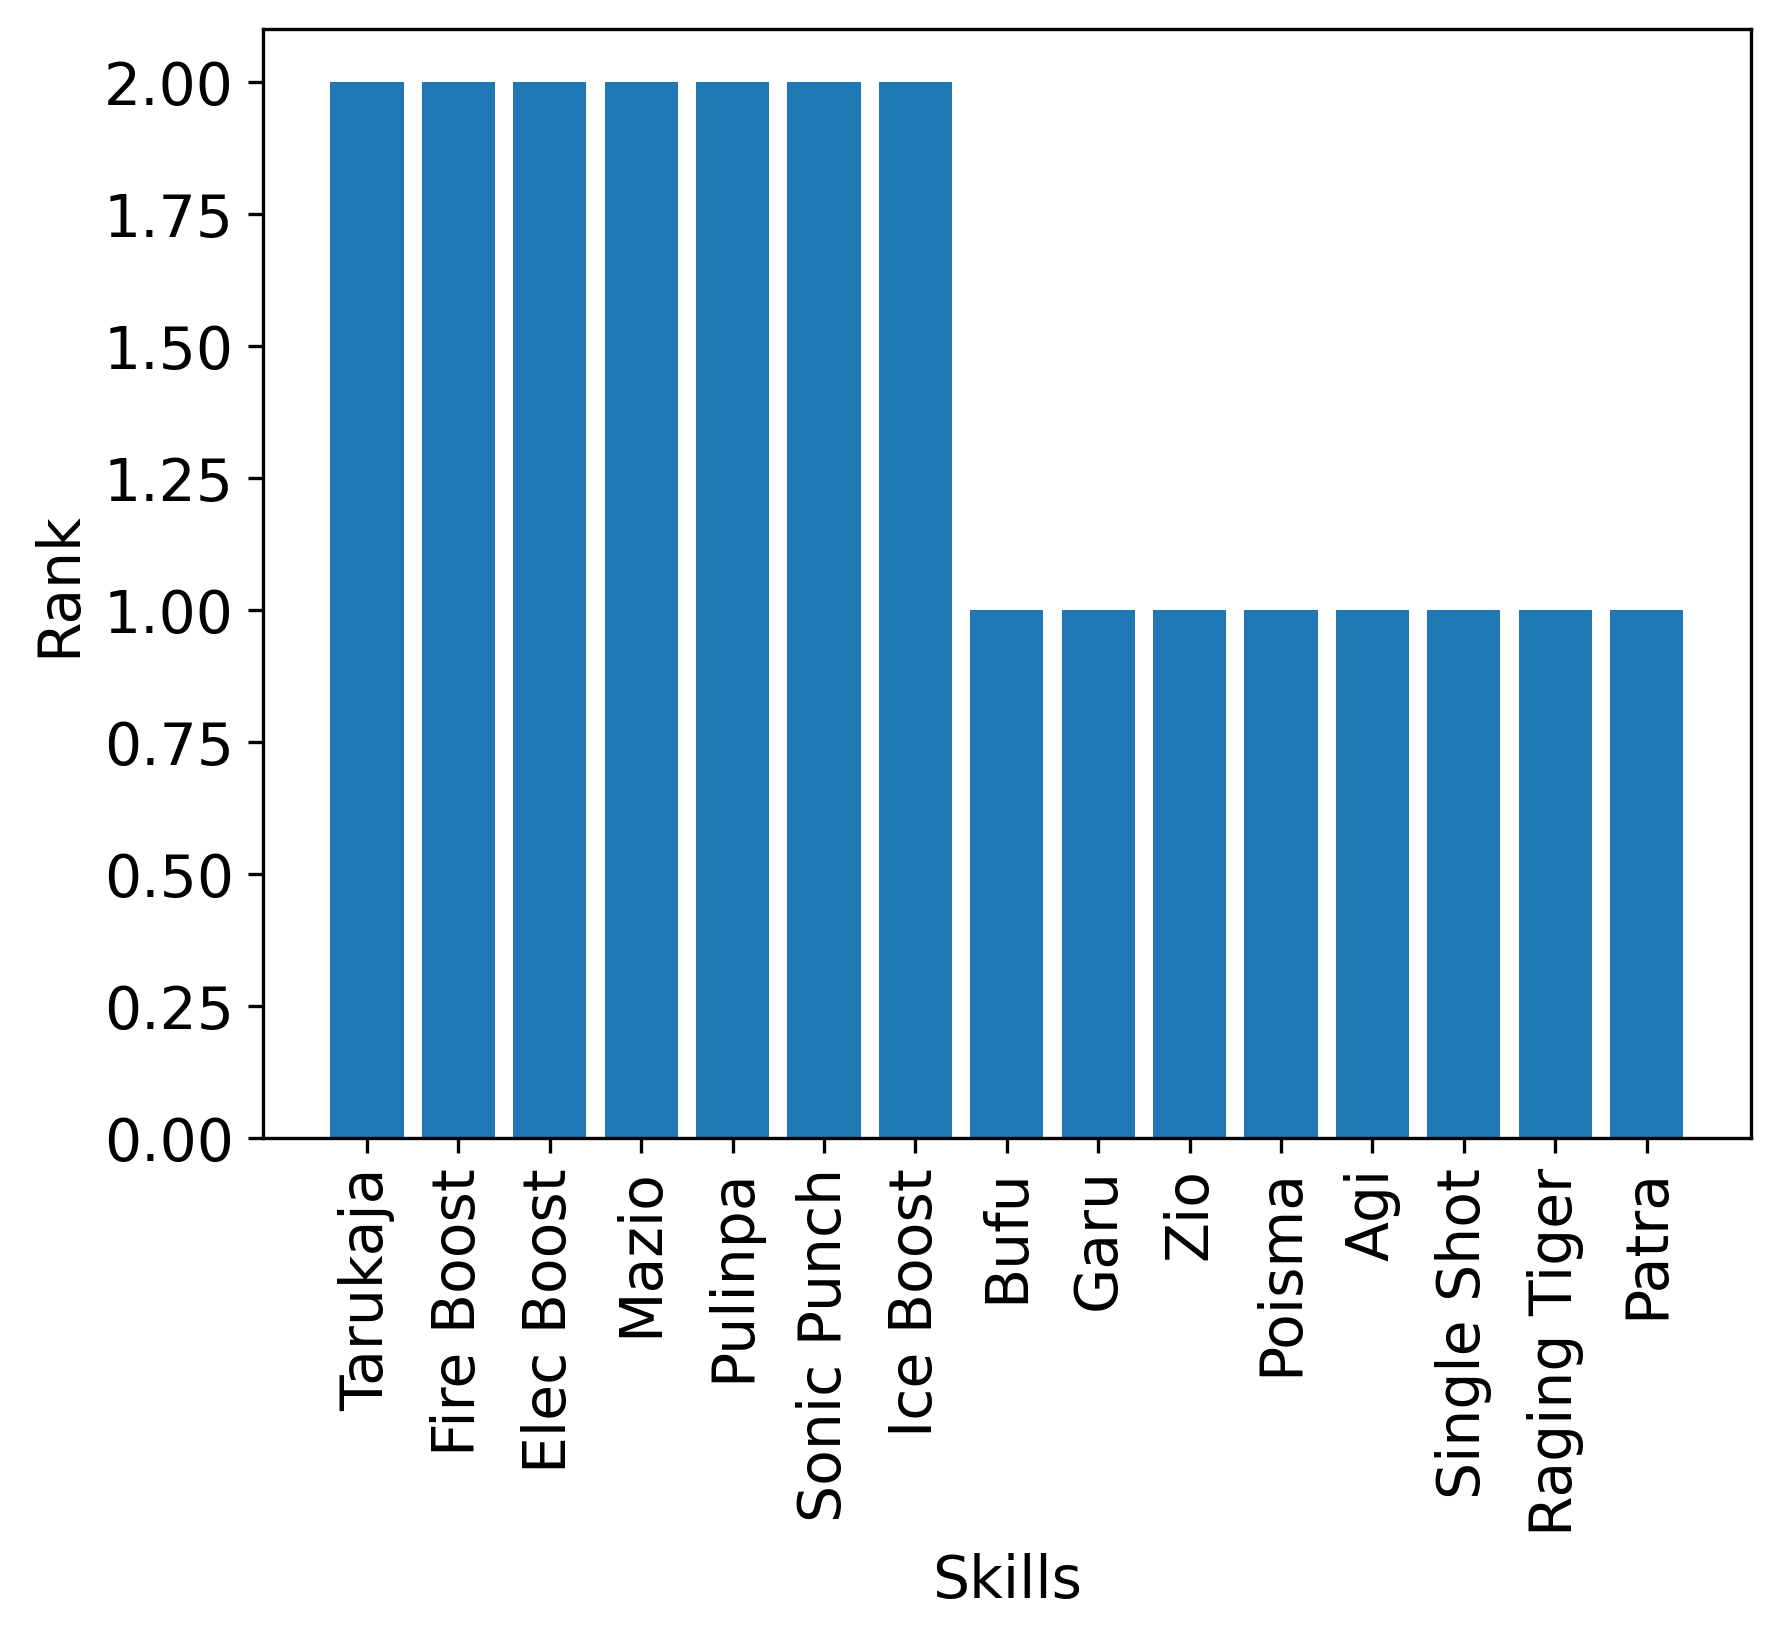

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the avg_prob_per_skill_dict dictionary by value
sorted_keys = dict(sorted(avg_prob_per_skill_dict.items(), key=lambda item: item[1])).keys()

# Get the values from dict_skill_to_rank in the same order
values_in_order = [dict_skill_to_rank[key] for key in sorted_keys]

# Split the keys and values into 10 smaller lists
split_keys = np.array_split(list(sorted_keys), 10)
split_values = np.array_split(values_in_order, 10)

# Plot each smaller dictionary
for i, (k, v) in enumerate(zip(split_keys, split_values)):
    plt.figure(i, dpi=300)
    plt.bar(k, v)
    plt.xlabel('Skills')
    plt.ylabel('Rank')
    plt.xticks(rotation=90)
    plt.rc('font', size=14)# cinclusion### dsasadsdadsasad
    plt.savefig(f'skill_to_rank_{i}.png')
    plt.show()

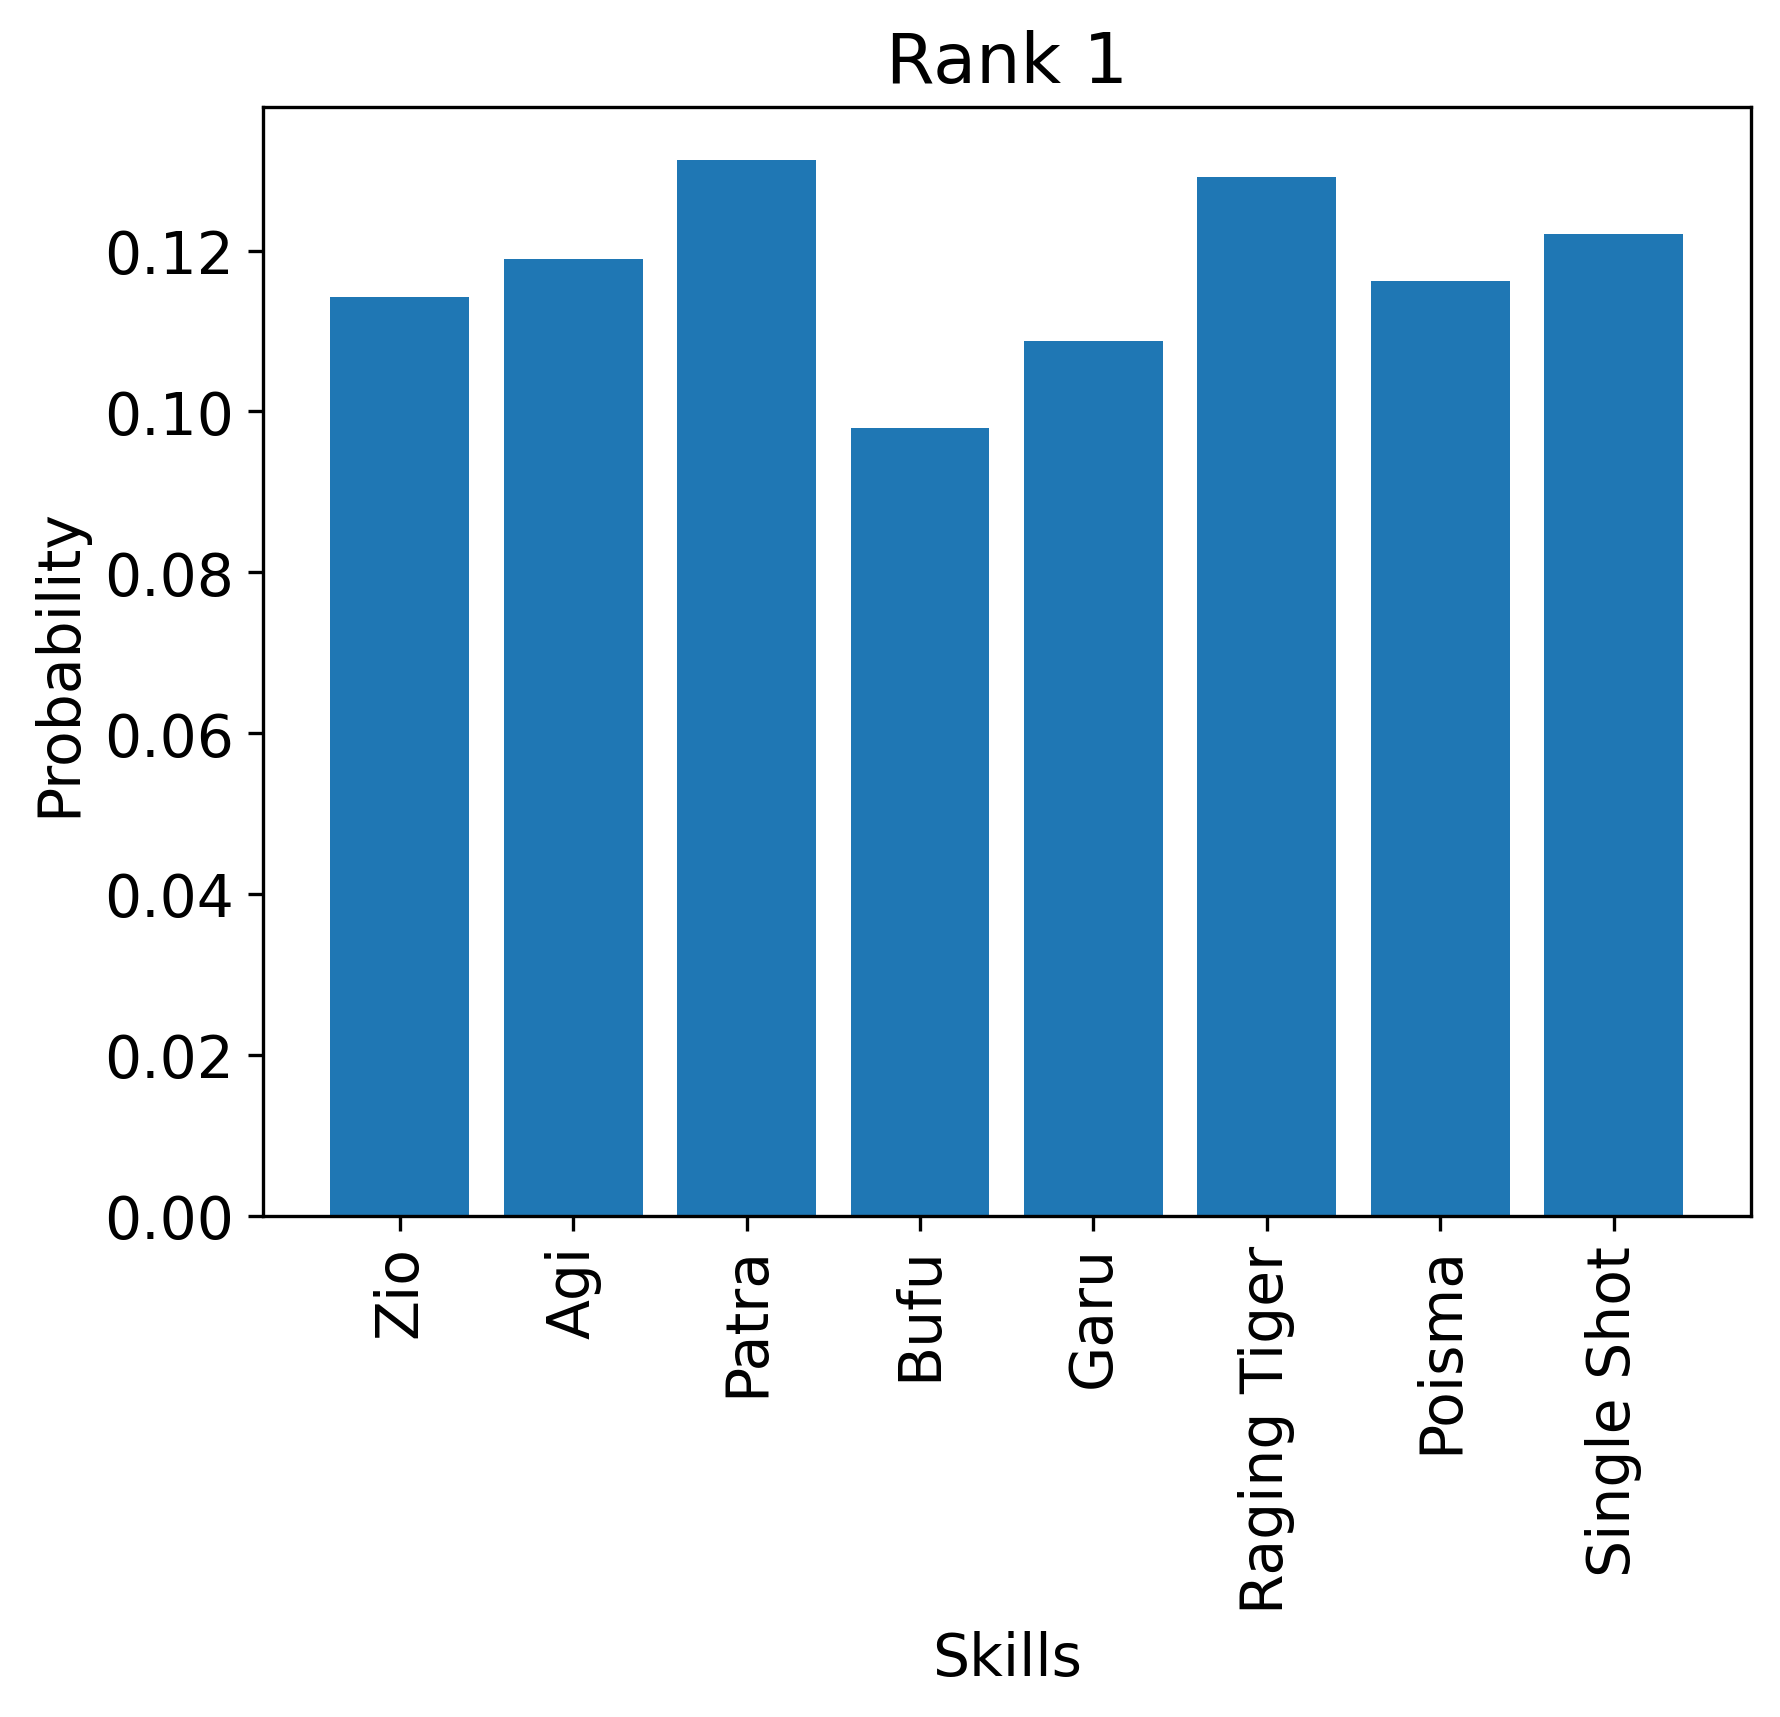

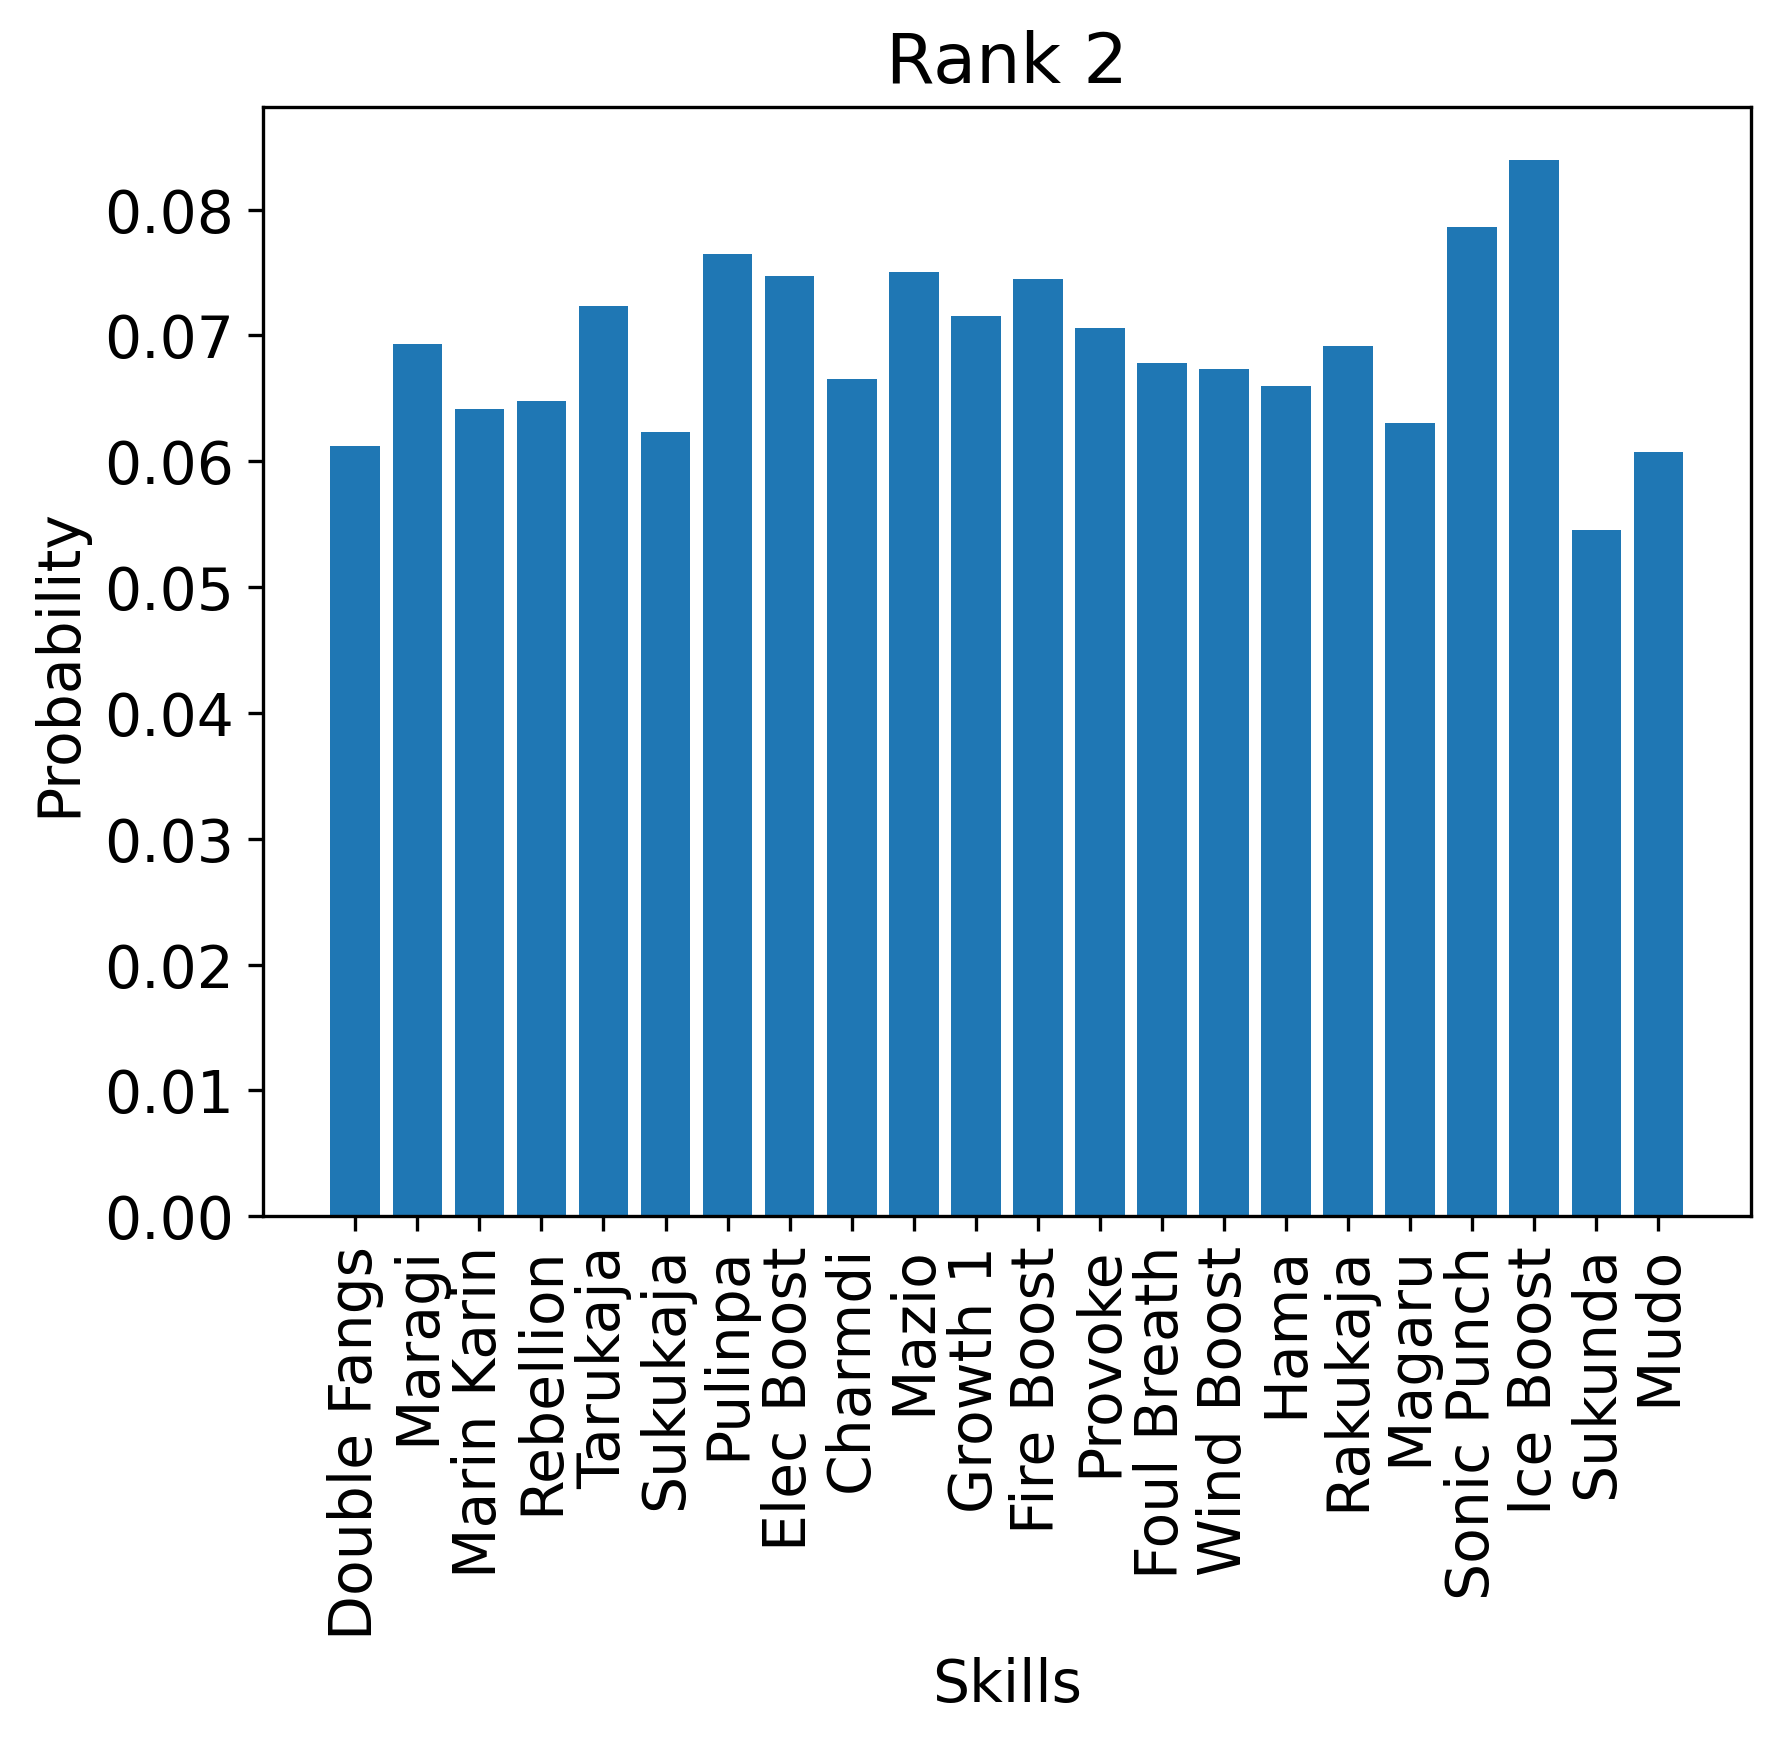

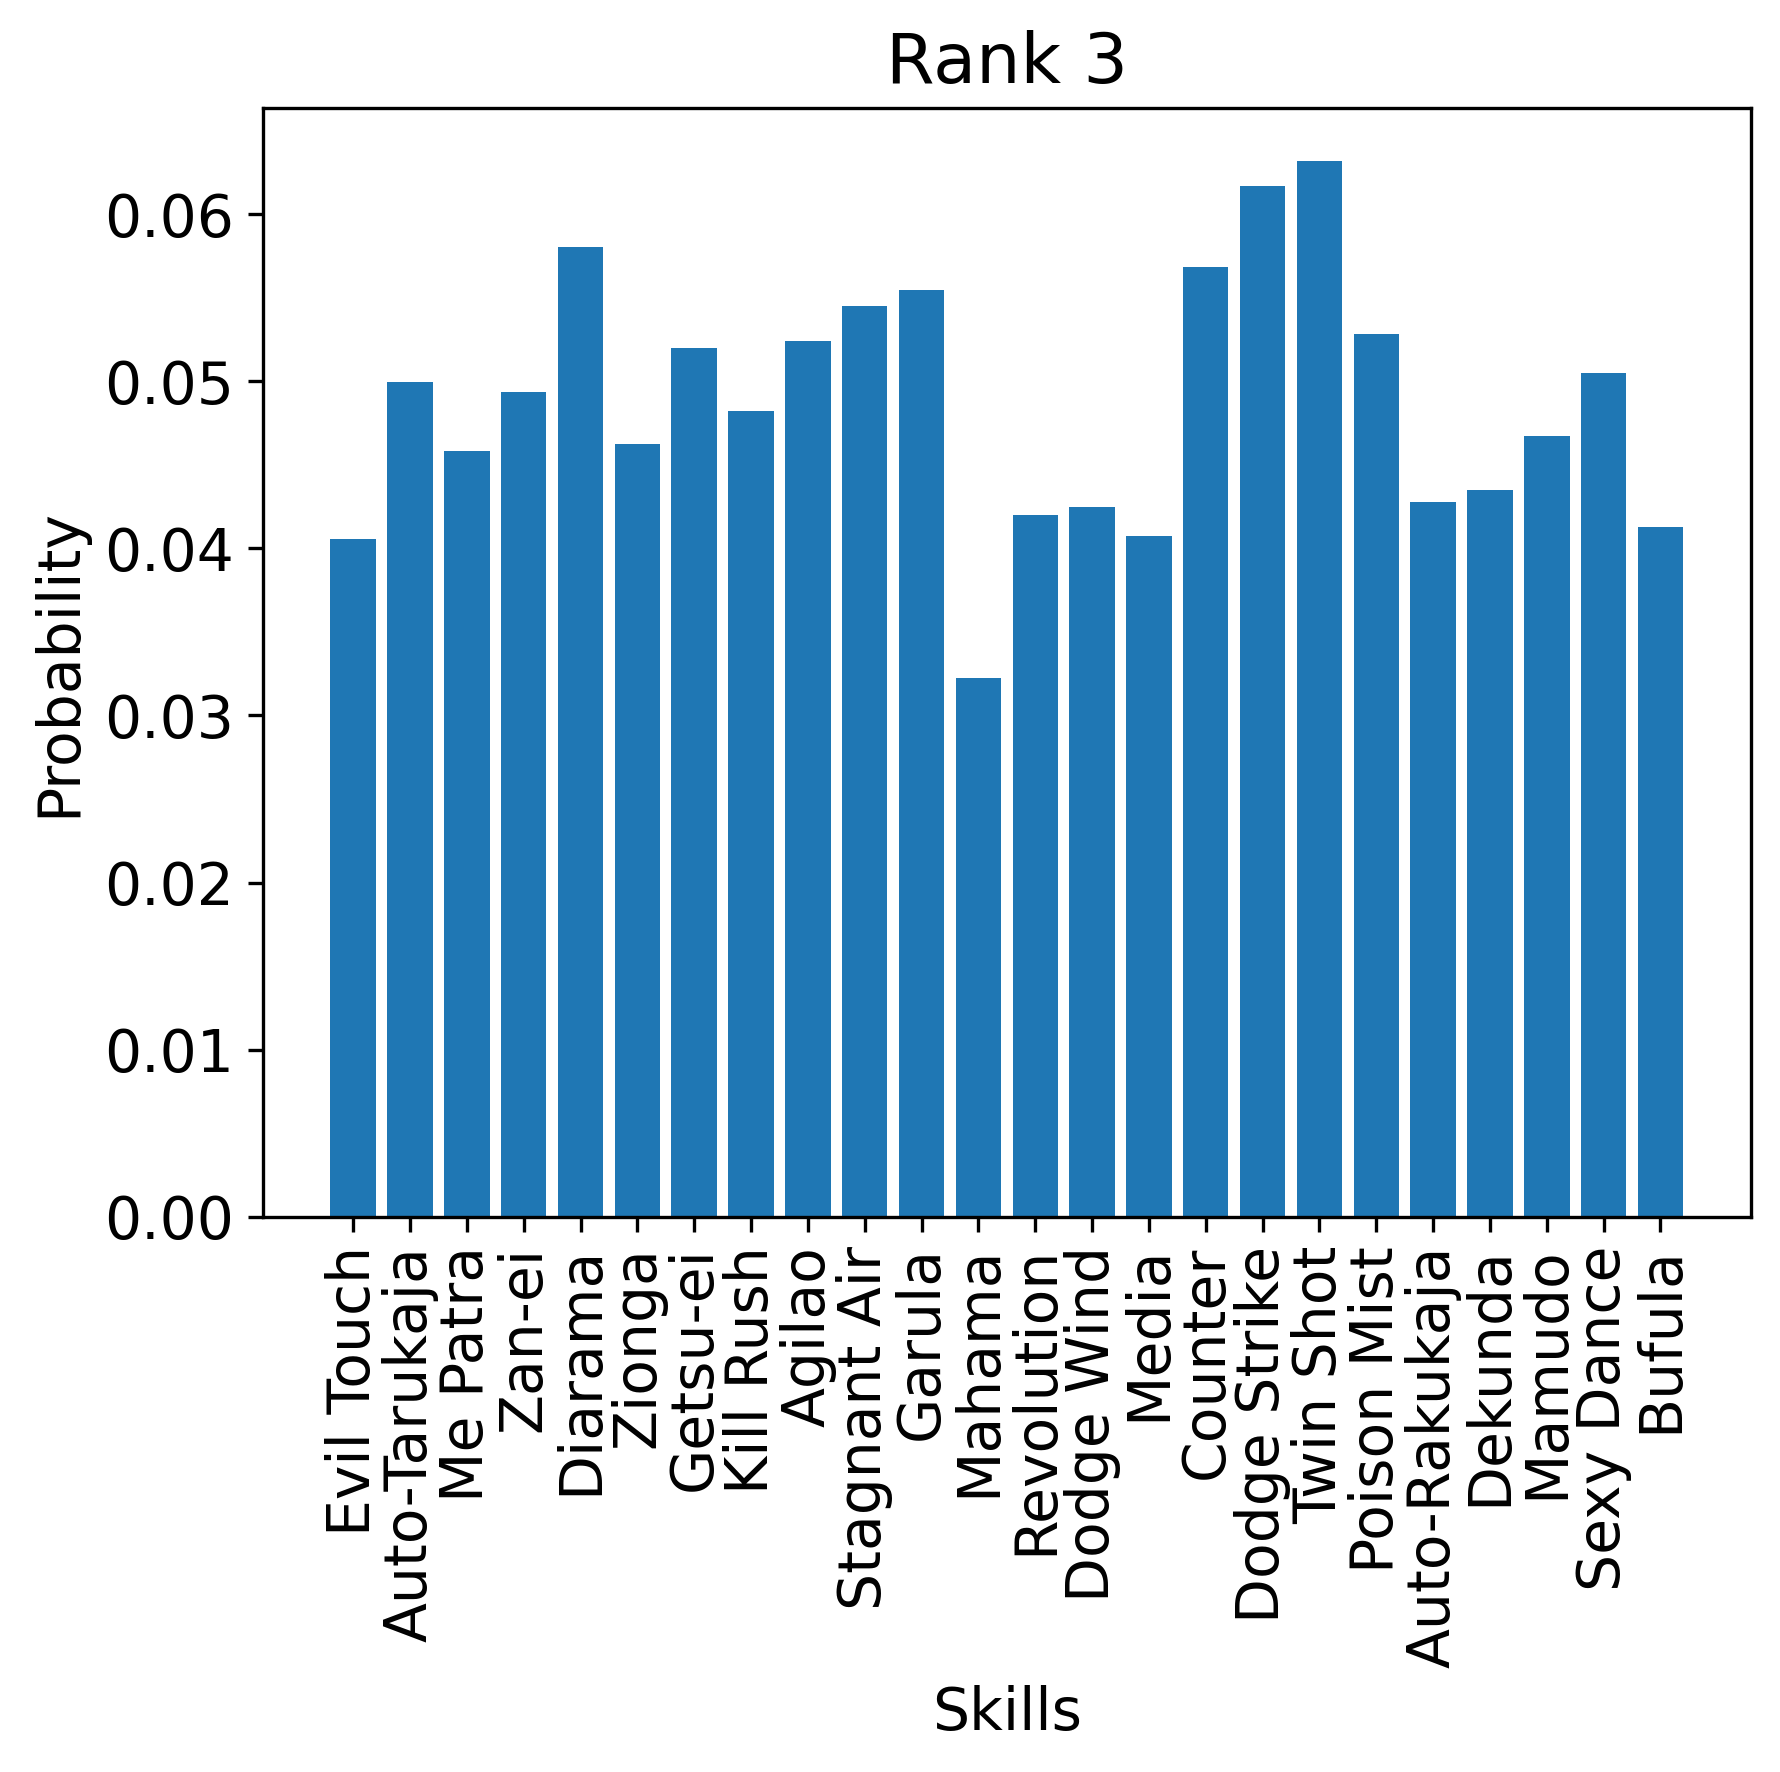

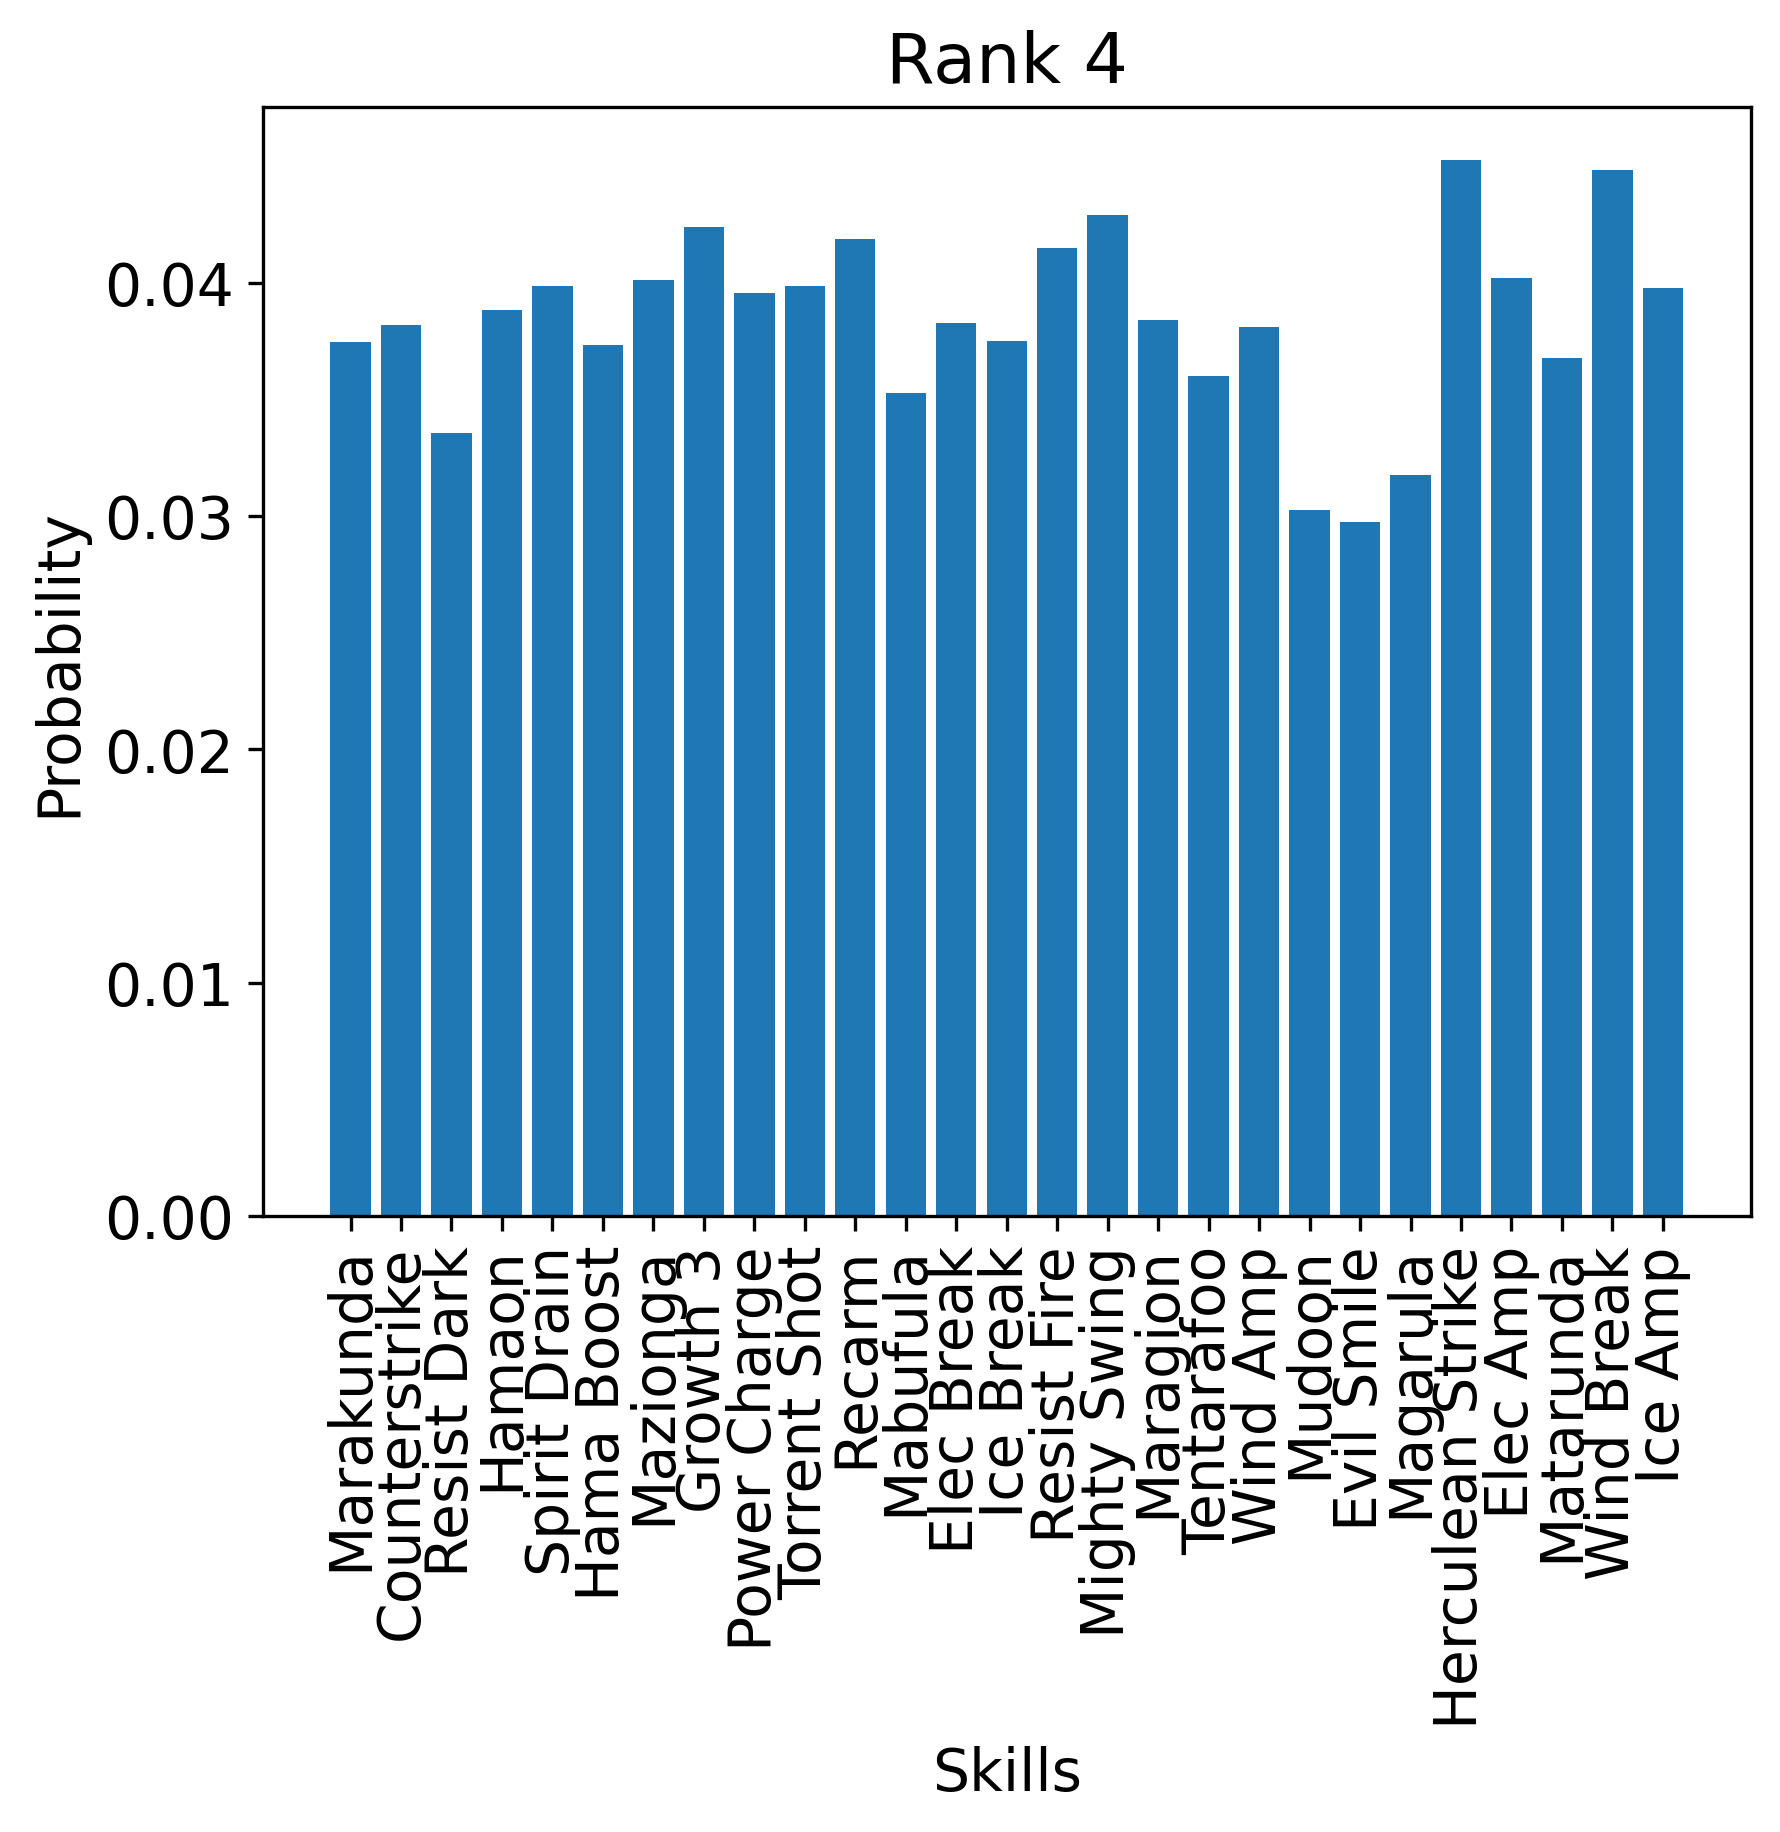

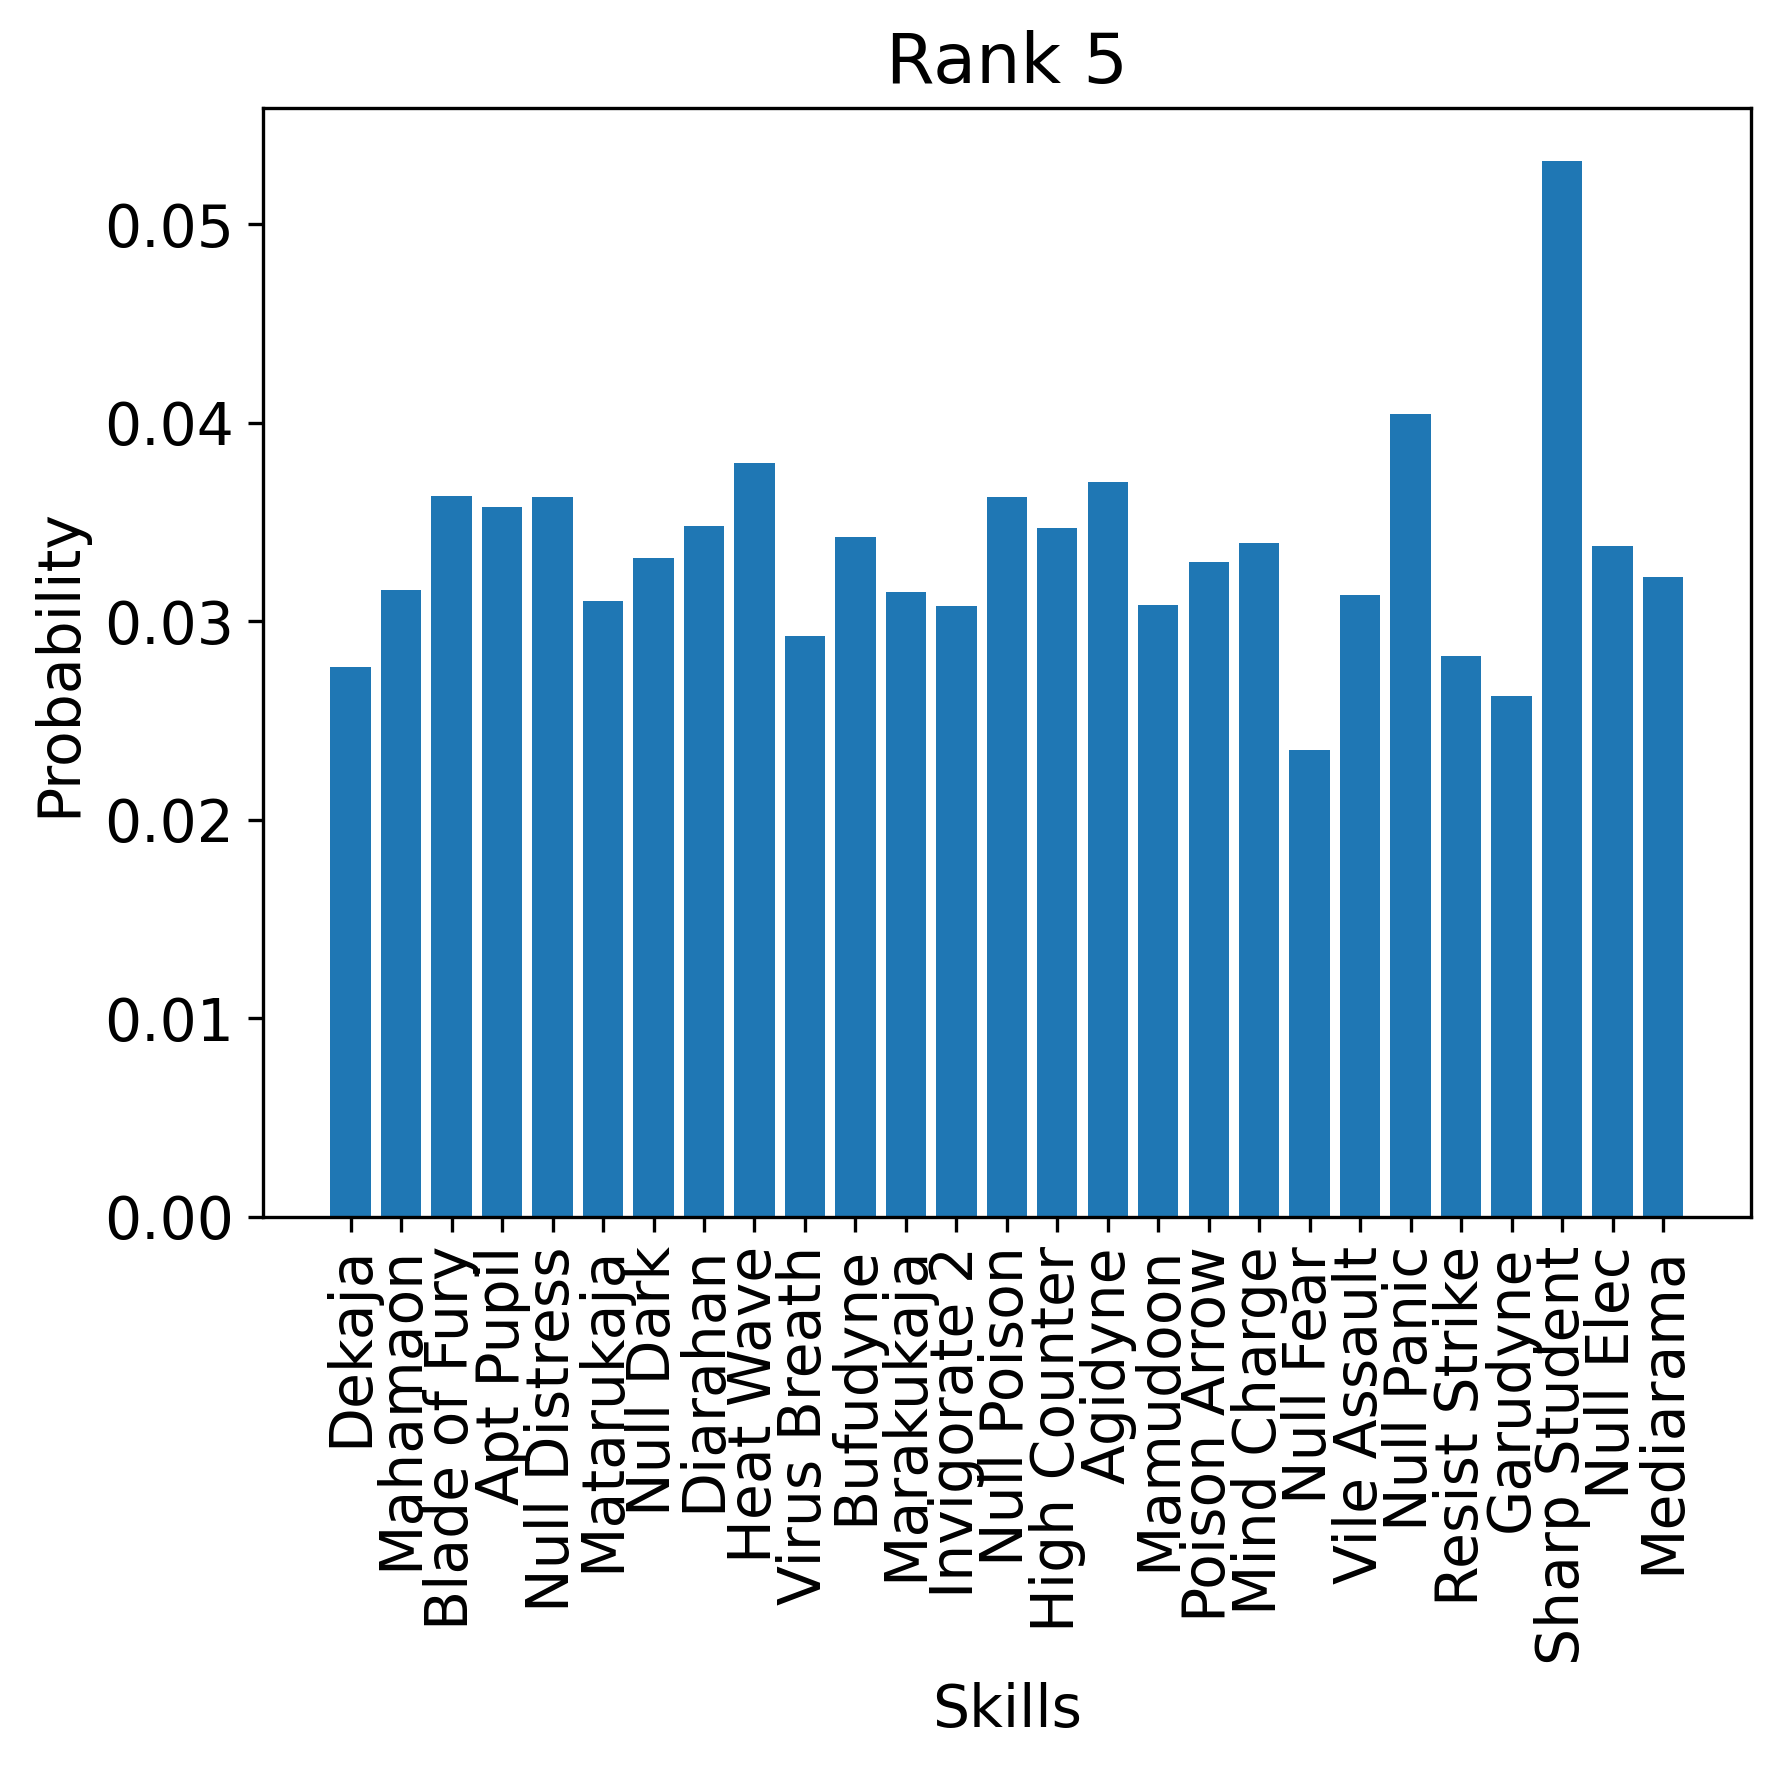

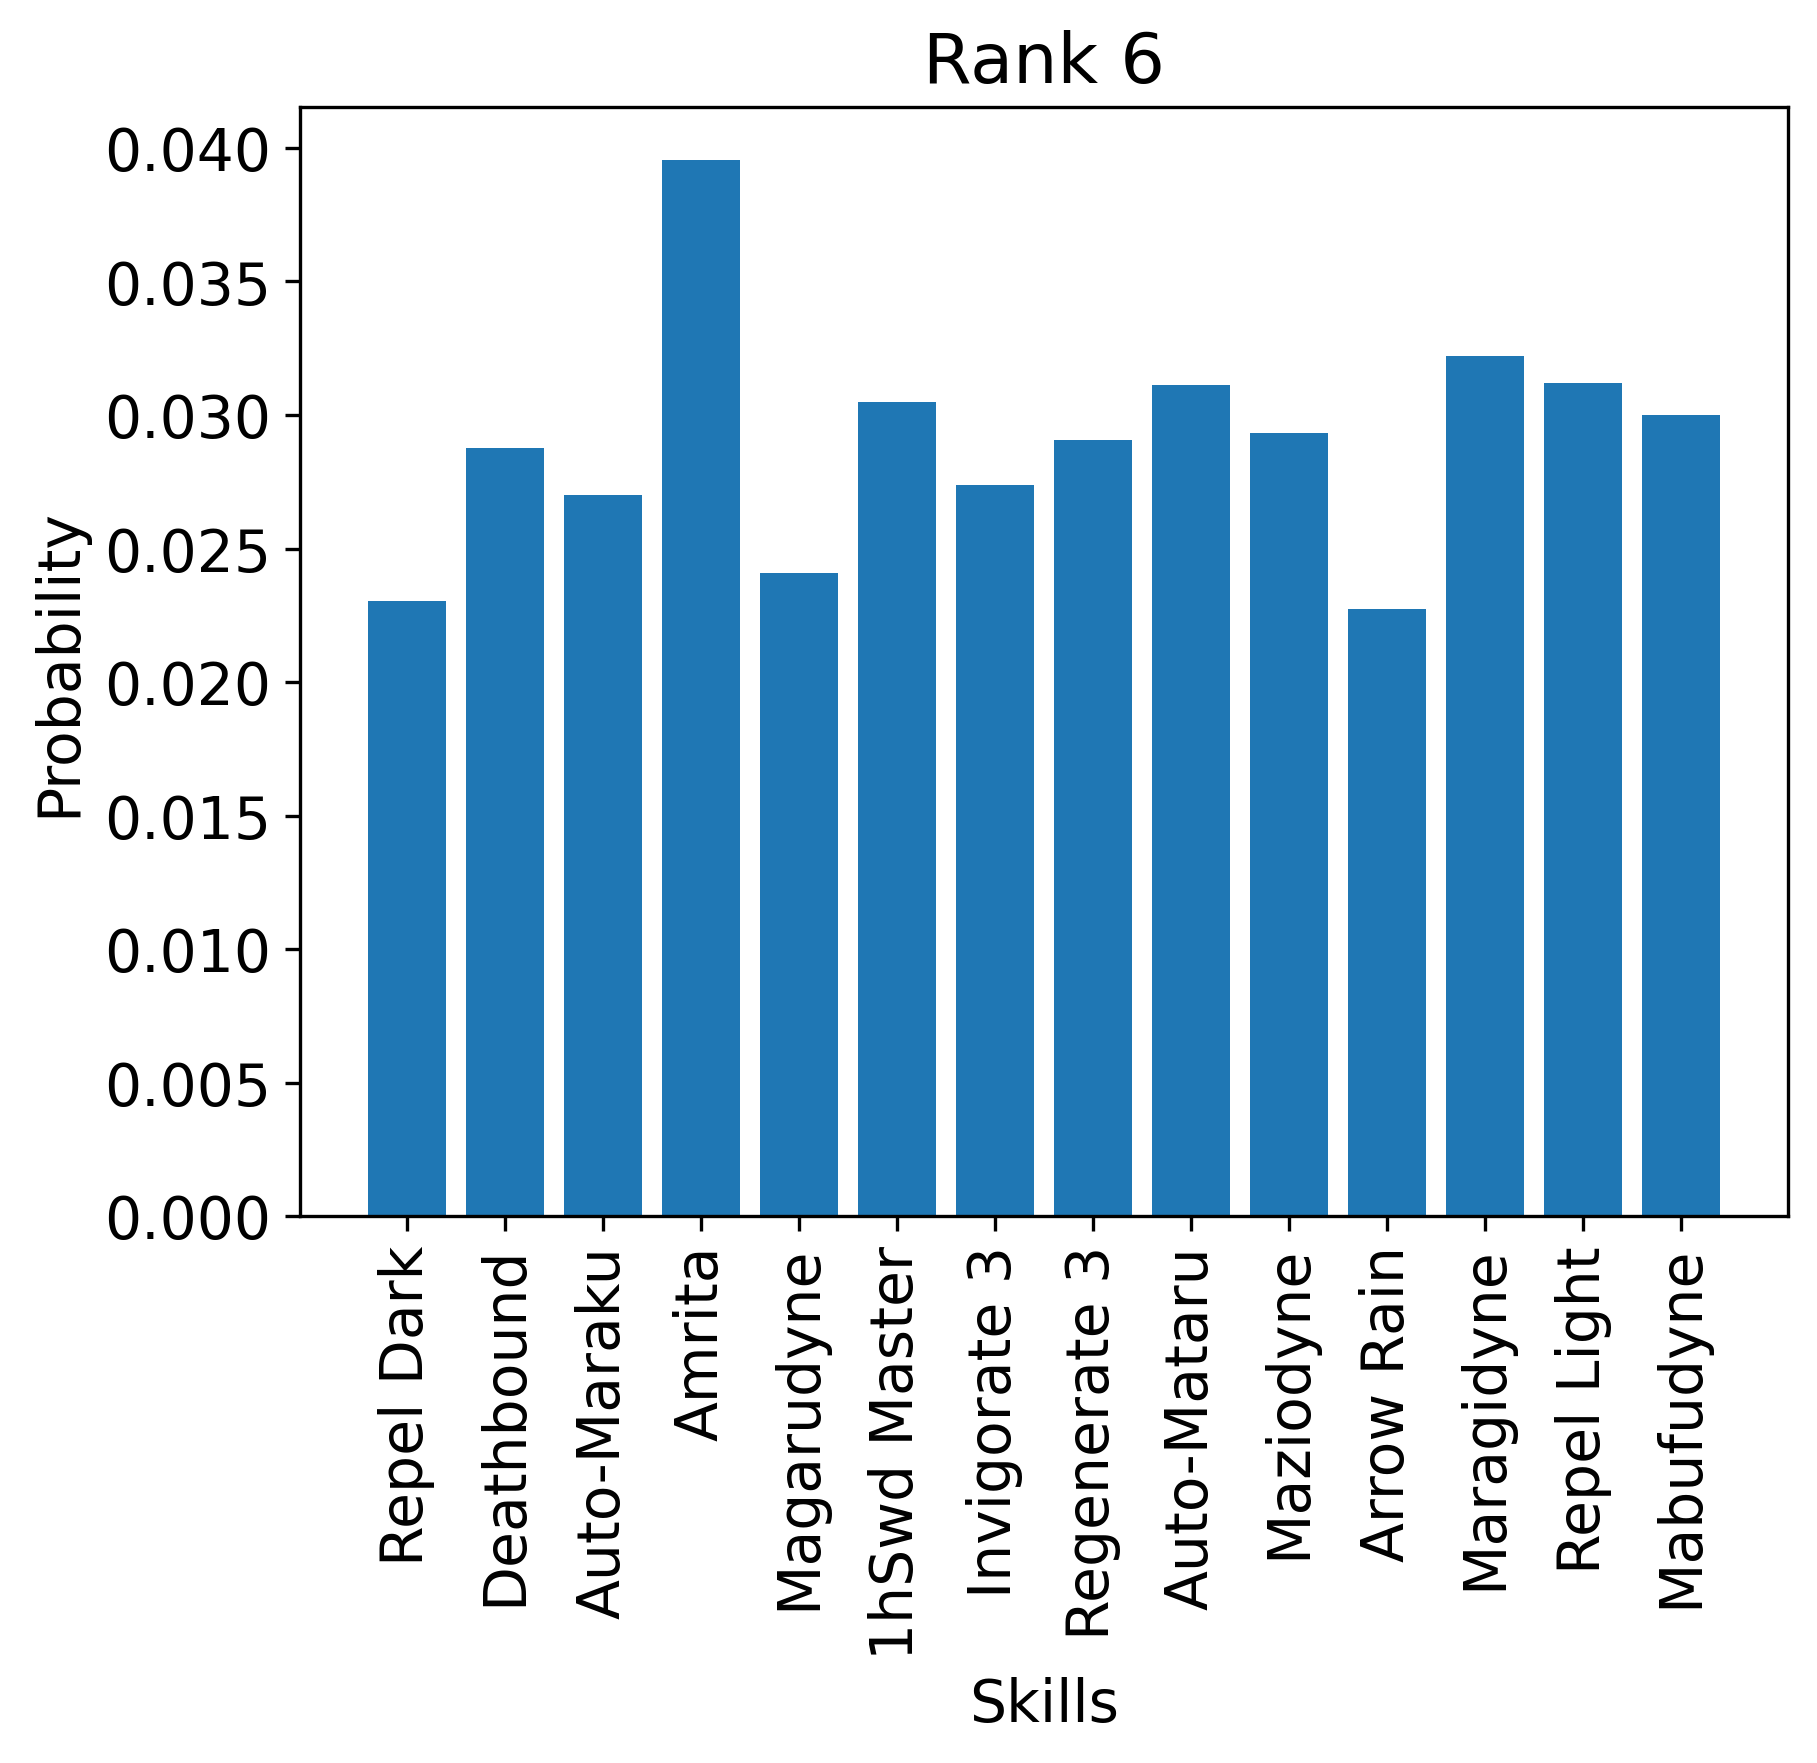

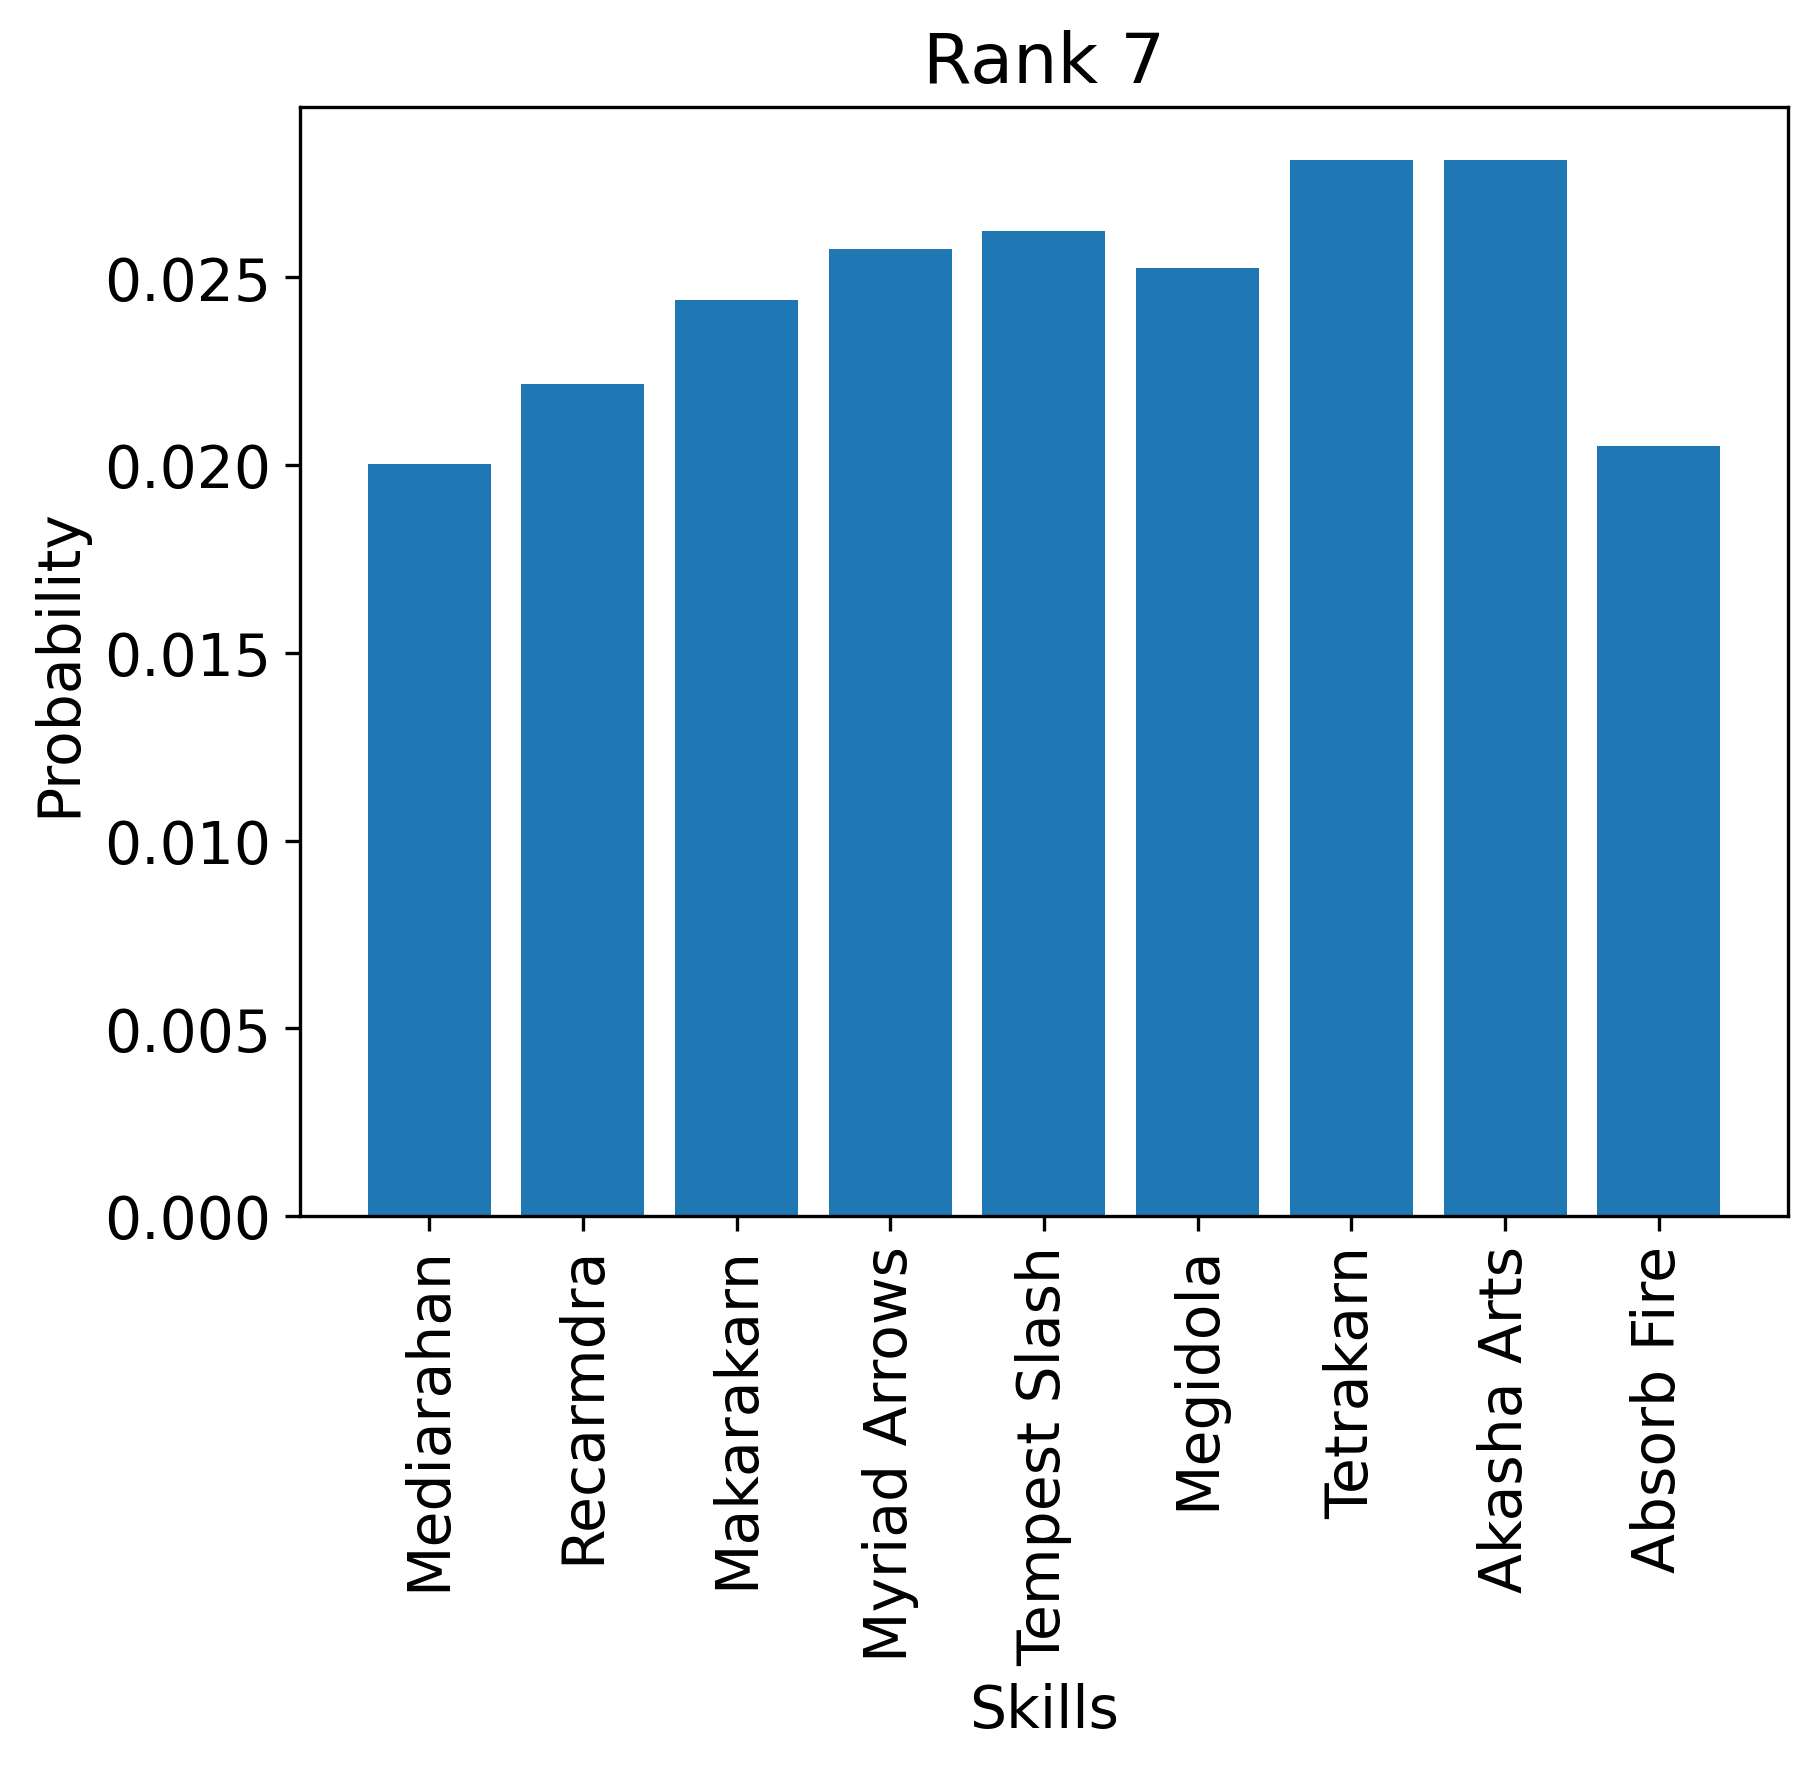

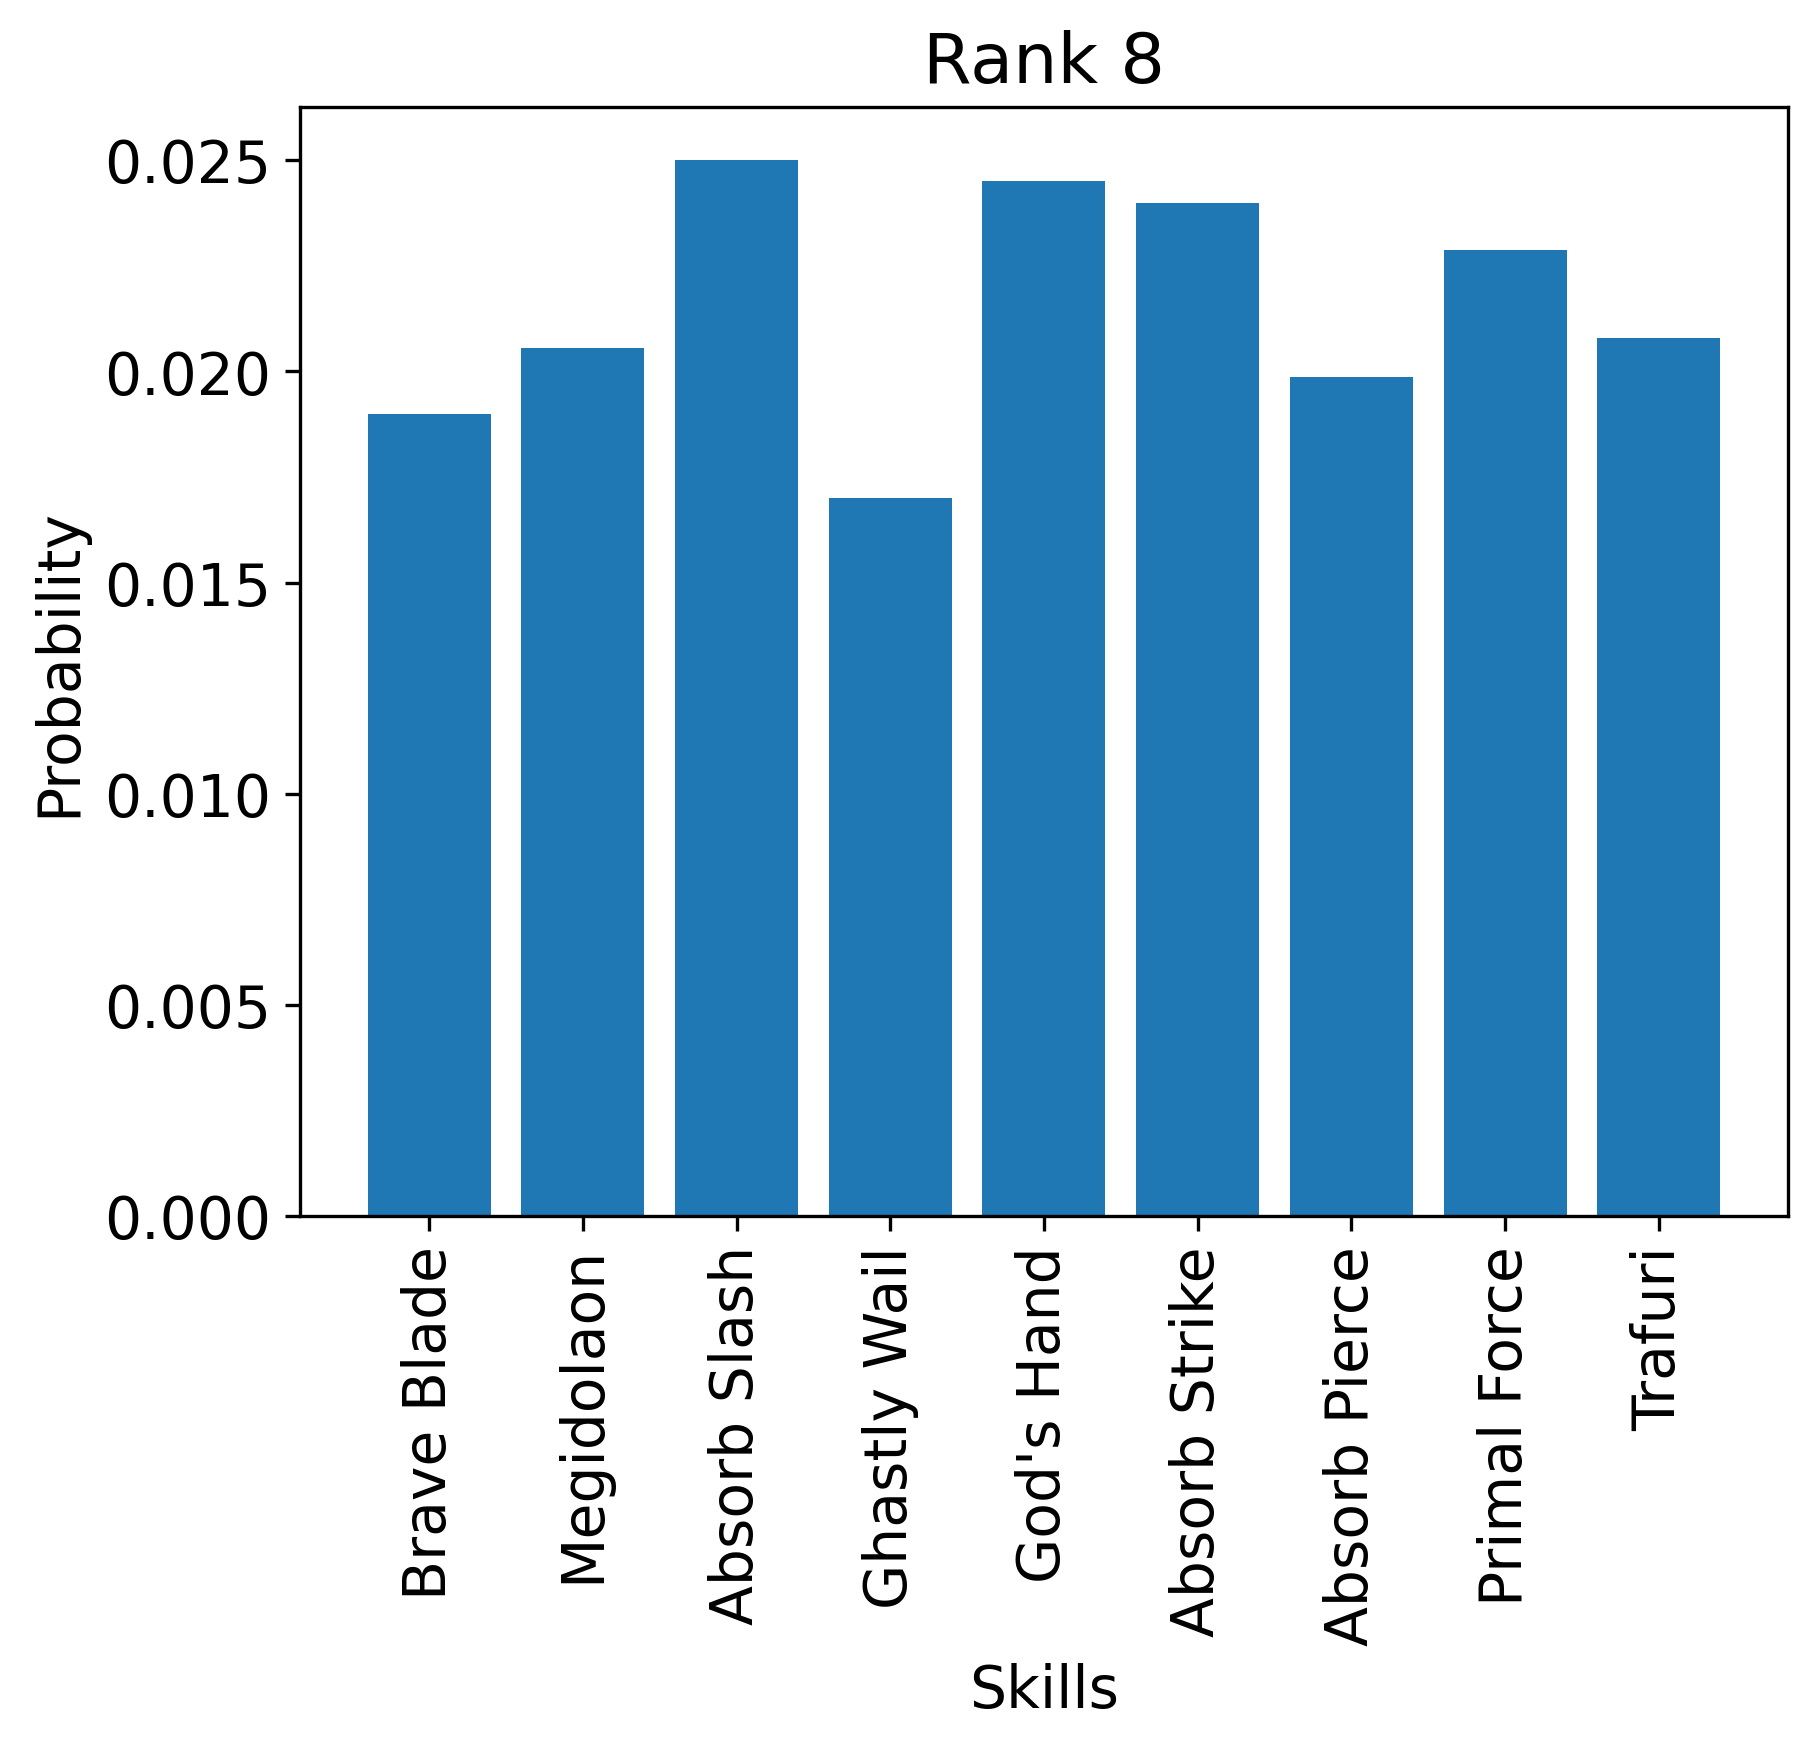

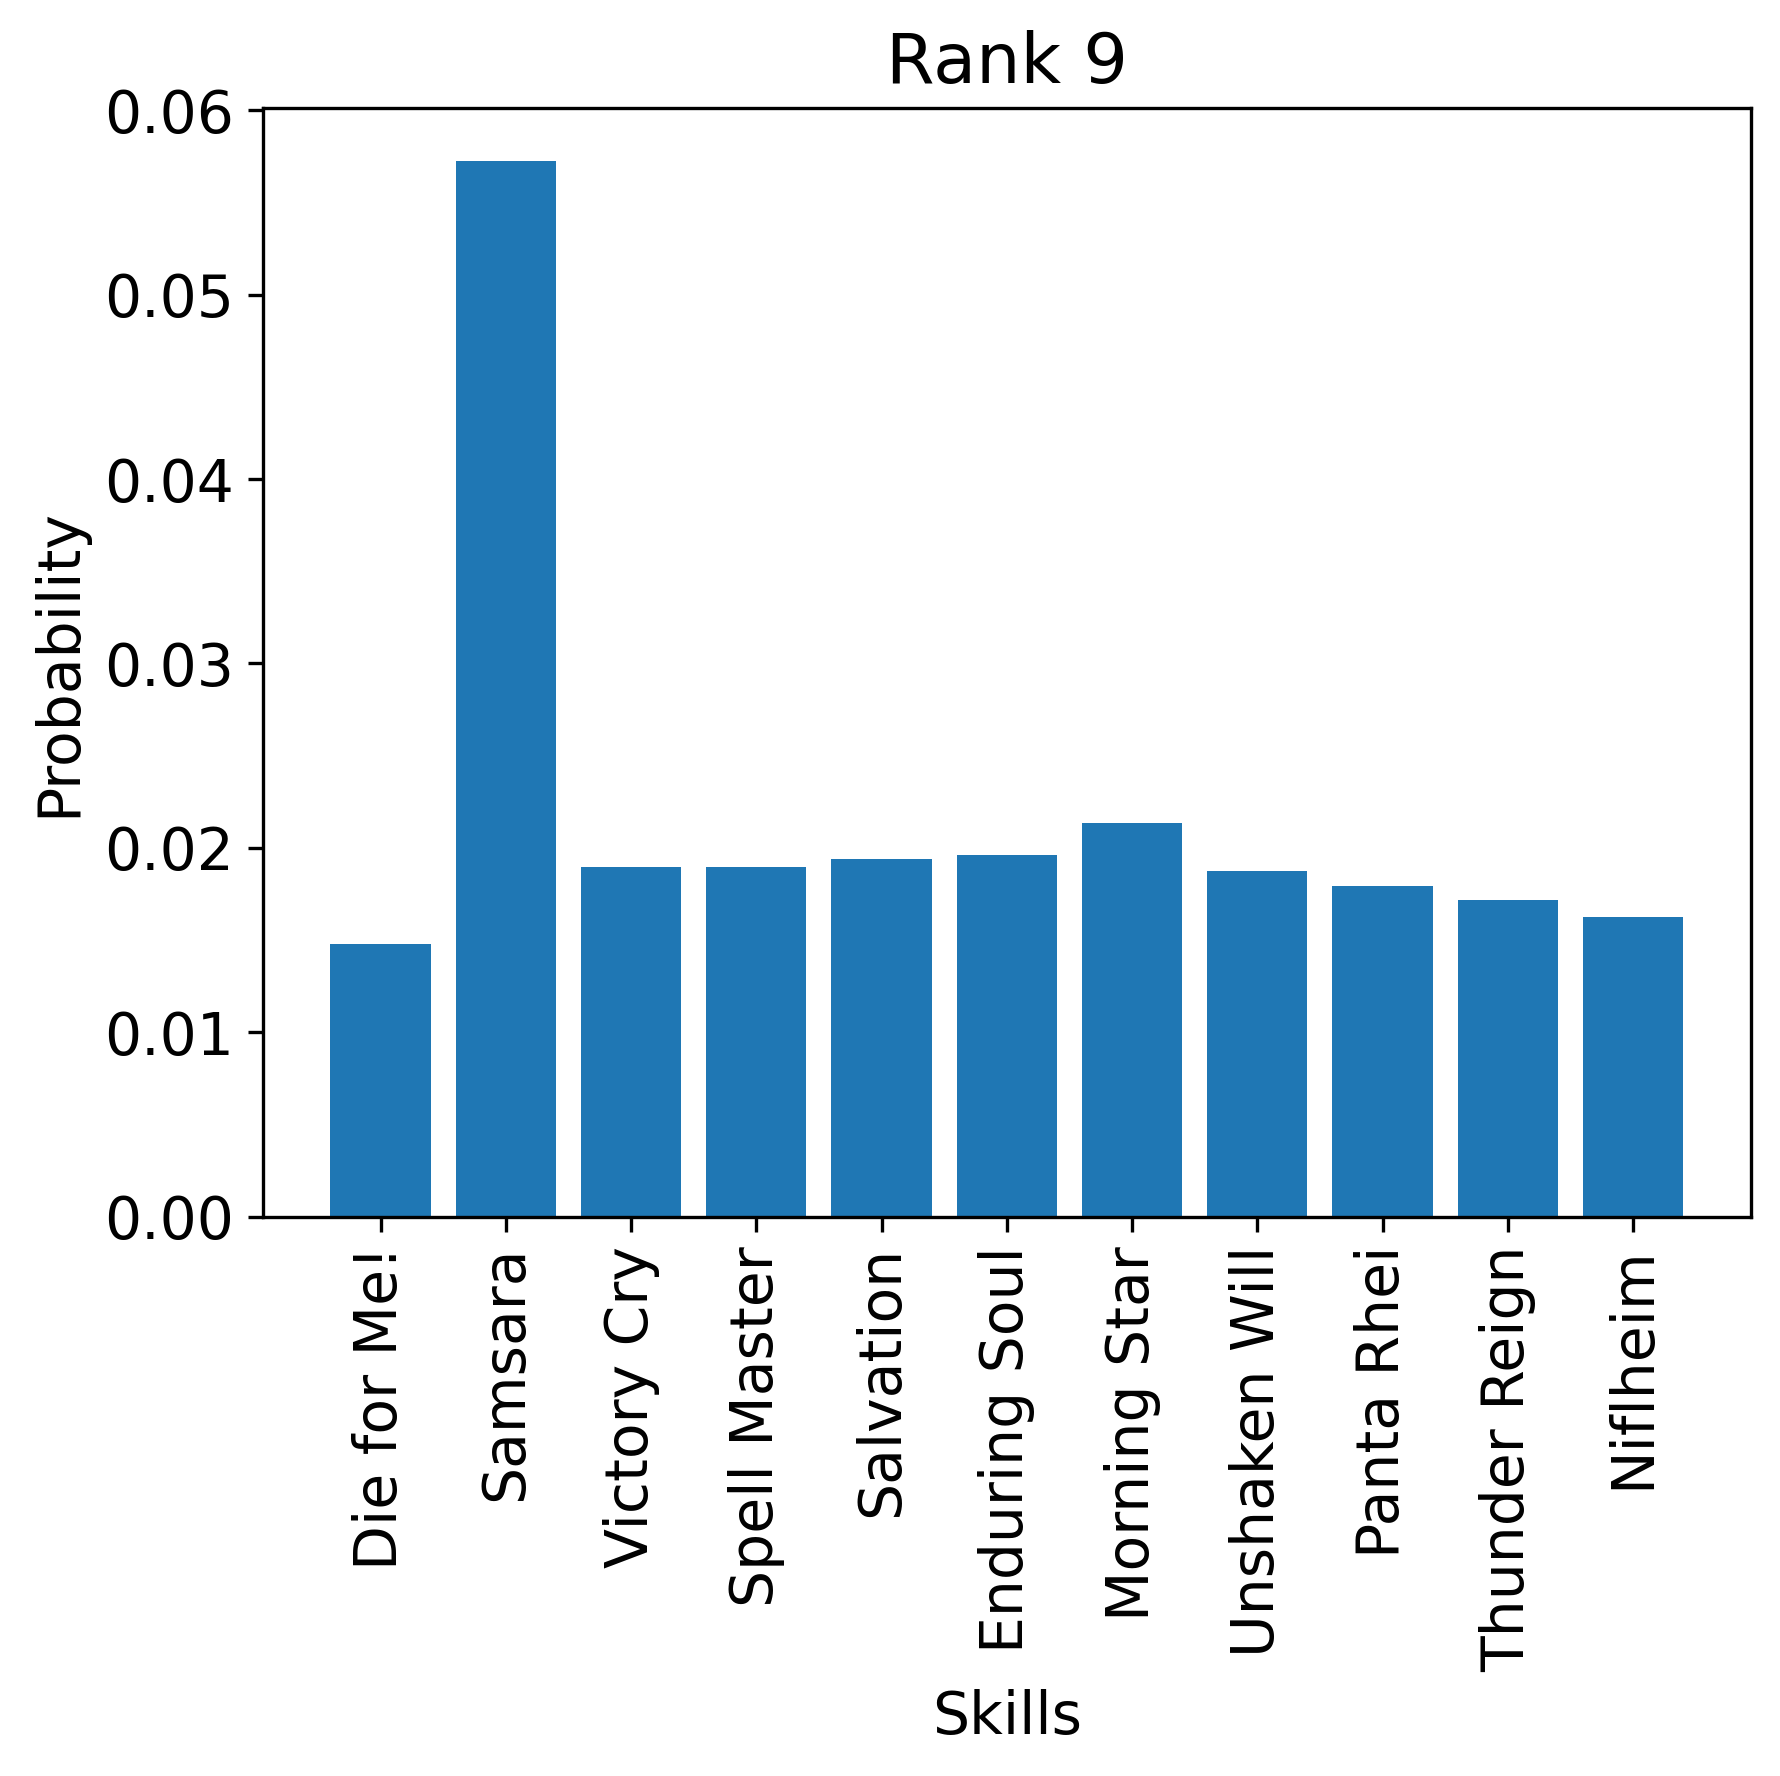

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Create a dictionary where the keys are the ranks and the values are lists of (skill, probability) tuples
rank_to_skill_probs = defaultdict(list)
for skill, rank in dict_skill_to_rank.items():
    prob = avg_prob_per_skill_dict.get(skill)
    if prob is not None:
        rank_to_skill_probs[rank].append((skill, prob))

# Sort the dictionary by rank
sorted_dict = dict(sorted(rank_to_skill_probs.items(), key=lambda item: item[0]))

# Create a separate plot for each rank
for i, (rank, skill_probs) in enumerate(sorted_dict.items()):
    plt.figure(i, dpi=300)
    skills, probs = zip(*skill_probs)
    x_coords = np.arange(len(probs))
    plt.bar(x_coords, probs, tick_label=skills)
    plt.xlabel('Skills')
    plt.ylabel('Probability')
    plt.title(f'Rank {rank}')
    plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
    plt.savefig(f'rank_{rank}.png')
    plt.show()

all probabilities seem to be alright. With the exception of a few outliers. Probably should run more iterations than a 1000 but that would consume too much time